In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from pathlib import Path

import sys
sys.path.append('../../')

import phys_ml.visualization.vertex_visualization as vertvis
from phys_ml.analysis.vertex import *
from phys_ml.evaluation import vertex as verteval
from phys_ml.load_data.vertex import *
from phys_ml.trainer.vertex import *
from phys_ml.util import slurm_generate

In [ ]:
# back_up existing info_files
info_fn = 'eval_info_test.pkl'
verteval.backup_info(info_fn)

## dev

In [3]:
!pip show lightning

Name: lightning
Version: 2.4.0
Summary: The Deep Learning framework to train, deploy, and ship AI products Lightning fast.
Home-page: https://github.com/Lightning-AI/lightning
Author: Lightning AI et al.
Author-email: pytorch@lightning.ai
License: Apache-2.0
Location: C:\Users\Sebastian\venv\ml24_1\Lib\site-packages
Requires: fsspec, lightning-utilities, packaging, pytorch-lightning, PyYAML, torch, torchmetrics, tqdm, typing-extensions
Required-by: 


In [4]:
!pip show torch

Name: torch
Version: 2.4.0+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: C:\Users\Sebastian\venv\ml24_1\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: lightning, pytorch-lightning, torchaudio, torchmetrics, torchvision


In [ ]:
###############    TEST RUN    ################
info_fn = 'eval_info_test.pkl'
info_test = verteval.load_info_dict(info_fn)
trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                            subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                            config_kwargs={'path_train': '../../../frgs_6d', 'hidden_dims': [128, 64, 32],
                                    	   'sample_count_per_vertex': 2000, 'test_ratio': 0.33, 'epochs': 5,
                                           'subset': 3, 'subset_shuffle': False})

In [ ]:
verteval.eval_train(trainer, info_test, info_fn, [128, 64, 32])

## slurm

In [ ]:
# config
base_dir = '/gpfs/data/fs71925/shepp123/'
sample_count = int((2000 * 576 * 3) / (24 * 6))
hidden_dims = [128, 64, 32]
trainer_kwargs = {
    'config_name': 'confmod_auto_encoder.json', 
    'subconfig_name': 'AUTO_ENCODER_VERTEX_24X6', 
    'config_kwargs': {
        'path_train': base_dir + 'frgs_6d',
        'hidden_dims': hidden_dims,
        'epochs': 100,
        'sample_count_per_vertex': sample_count, 
        'test_ratio': 0.2, 
        'subset': -1, 
        'subset_shuffle': False, 
        'devices': 'auto', 
        'device_type': 'gpu', 
        'num_dataloader_workers': 8, 
        'batch_size': 2048,
    }
}
slurm_options = slurm_generate.SlurmOptions(qos='zen3_0512_a100x2', time='00:10:00')
slurm_kwargs = {'project_name': 'vertex_24x6', 'pyenv_dir': base_dir + 'pyenv', 
                'trainer': 'vertex.VertexTrainer24x6', 'slurm_options': slurm_options, 'trainer_kwargs': trainer_kwargs}

In [ ]:
# test run
slurm_options_dev = slurm_generate.SlurmOptions(qos='zen3_0512_a100x2_devel', time='00:10:00')
slurm_generate.create(project_name='vertex_24x6', script_name='vsc_test', 
                      pyenv_dir= base_dir + 'PhysML/.venv', slurm_options=slurm_options_dev, 
                      trainer='vertex.VertexTrainer24x6', trainer_kwargs=trainer_kwargs)

In [ ]:
# 02: high samples, high epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = sample_count
trainer_kwargs['config_kwargs']['batch_size'] = 8192
trainer_kwargs['config_kwargs']['epochs'] = 1000
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = 15
slurm_options.time = '01:30:00'
slurm_generate.create(script_name='s24000_e1000', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 02: high samples, low epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = sample_count
trainer_kwargs['config_kwargs']['batch_size'] = 8192
trainer_kwargs['config_kwargs']['epochs'] = 100
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = 15
slurm_options.time = '00:15:00'
slurm_generate.create(script_name='s24000_e100', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 02: low samples, high epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = 2000
trainer_kwargs['config_kwargs']['batch_size'] = 4096
trainer_kwargs['config_kwargs']['epochs'] = 1000
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = 8
slurm_options.time = '00:10:00'
slurm_generate.create(script_name='s2000_e1000', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 02: low samples, low epochs
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = 2000
trainer_kwargs['config_kwargs']['batch_size'] = 4096
trainer_kwargs['config_kwargs']['epochs'] = 100
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = 8
slurm_options.time = '00:05:00'
slurm_generate.create(script_name='s2000_e100', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32]
trainer_kwargs['config_kwargs']['sample_count_per_vertex'] = ?
trainer_kwargs['config_kwargs']['batch_size'] = ?
trainer_kwargs['config_kwargs']['epochs'] = ?
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32]
trainer_kwargs['config_kwargs']['num_dataloader_workers'] = ?
slurm_options.time = ?
slurm_generate.create(script_name='128_64_32', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32, 16]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32, 16]
slurm_options.time = ?
slurm_generate.create(script_name='128_64_32_16', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 64, 32, 8]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 64, 32, 8]
slurm_generate.create(script_name='128_64_32_8', **slurm_kwargs)
# job-id:
# dir:

In [ ]:
# 03: [128, 32, 16, 4]
trainer_kwargs['config_kwargs']['hidden_dims'] = [128, 32, 16, 4]
slurm_generate.create(script_name='128_32_16_4', **slurm_kwargs)
# job-id:
# dir:

# 01 Full training

* training on all vertices
* 24,000 samples -> with smaller sample-vectors (size=144) of the 24^6-vertex this results in same amount of data points as training on 576^3-vertex with 2000 samples

In [ ]:
info_fn = 'eval_info_test.pkl'
info = verteval.load_info_dict(info_fn)
sample_count = int((2000 * 576 * 3) / (24 * 6))
config_kwargs={'path_train': '../../../frgs_6d', 
               'hidden_dims': [128, 64, 32],
               'epochs': 100,
               'sample_count_per_vertex': sample_count, 
               'test_ratio': 0.2, 
               'subset': None, 
               'subset_shuffle': False, 
               'devices': 'auto', 
               'num_dataloader_workers': 4, 
               'strategy': 'auto', 
               'batch_size': 2048}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 29: 'val_loss' reached 13.74825 (best 13.74825), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=0-step=29.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 58: 'val_loss' reached 11.67639 (best 11.67639), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=1-step=58.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 87: 'val_loss' reached 7.13894 (best 7.13894), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=2-step=87.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 116: 'val_loss' reached 4.15709 (best 4.15709), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=3-step=116.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 145: 'val_loss' reached 2.68964 (best 2.68964), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=4-step=145.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 174: 'val_loss' reached 2.31783 (best 2.31783), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=5-step=174.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 203: 'val_loss' reached 2.22252 (best 2.22252), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=6-step=203.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 232: 'val_loss' reached 2.16130 (best 2.16130), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=7-step=232.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 261: 'val_loss' reached 2.09565 (best 2.09565), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=8-step=261.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 290: 'val_loss' reached 2.03088 (best 2.03088), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=9-step=290.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 319: 'val_loss' reached 1.96282 (best 1.96282), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=10-step=319.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 348: 'val_loss' reached 1.89854 (best 1.89854), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=11-step=348.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 377: 'val_loss' reached 1.83941 (best 1.83941), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=12-step=377.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 406: 'val_loss' reached 1.78653 (best 1.78653), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=13-step=406.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 435: 'val_loss' reached 1.73885 (best 1.73885), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=14-step=435.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 464: 'val_loss' reached 1.68694 (best 1.68694), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=15-step=464.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 493: 'val_loss' reached 1.62233 (best 1.62233), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=16-step=493.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 522: 'val_loss' reached 1.54905 (best 1.54905), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=17-step=522.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 551: 'val_loss' reached 1.47411 (best 1.47411), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=18-step=551.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 580: 'val_loss' reached 1.40645 (best 1.40645), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=19-step=580.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 609: 'val_loss' reached 1.35231 (best 1.35231), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=20-step=609.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 638: 'val_loss' reached 1.31162 (best 1.31162), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=21-step=638.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 667: 'val_loss' reached 1.27897 (best 1.27897), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=22-step=667.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 696: 'val_loss' reached 1.25003 (best 1.25003), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=23-step=696.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 725: 'val_loss' reached 1.21995 (best 1.21995), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=24-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 754: 'val_loss' reached 1.18455 (best 1.18455), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=25-step=754.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 783: 'val_loss' reached 1.14037 (best 1.14037), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=26-step=783.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 812: 'val_loss' reached 1.08422 (best 1.08422), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=27-step=812.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 841: 'val_loss' reached 1.01651 (best 1.01651), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=28-step=841.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 870: 'val_loss' reached 0.94011 (best 0.94011), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=29-step=870.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 899: 'val_loss' reached 0.86379 (best 0.86379), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=30-step=899.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 928: 'val_loss' reached 0.79990 (best 0.79990), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=31-step=928.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 957: 'val_loss' reached 0.75499 (best 0.75499), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=32-step=957.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 986: 'val_loss' reached 0.72394 (best 0.72394), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=33-step=986.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1015: 'val_loss' reached 0.70099 (best 0.70099), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=34-step=1015.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1044: 'val_loss' reached 0.68239 (best 0.68239), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=35-step=1044.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1073: 'val_loss' reached 0.66553 (best 0.66553), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=36-step=1073.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1102: 'val_loss' reached 0.64982 (best 0.64982), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=37-step=1102.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1131: 'val_loss' reached 0.63379 (best 0.63379), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=38-step=1131.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1160: 'val_loss' reached 0.61782 (best 0.61782), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=39-step=1160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1189: 'val_loss' reached 0.60126 (best 0.60126), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=40-step=1189.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1218: 'val_loss' reached 0.58336 (best 0.58336), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=41-step=1218.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1247: 'val_loss' reached 0.56387 (best 0.56387), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=42-step=1247.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1276: 'val_loss' reached 0.54472 (best 0.54472), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=43-step=1276.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1305: 'val_loss' reached 0.52503 (best 0.52503), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=44-step=1305.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1334: 'val_loss' reached 0.50591 (best 0.50591), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=45-step=1334.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1363: 'val_loss' reached 0.48705 (best 0.48705), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=46-step=1363.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1392: 'val_loss' reached 0.46857 (best 0.46857), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=47-step=1392.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1421: 'val_loss' reached 0.45142 (best 0.45142), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=48-step=1421.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1450: 'val_loss' reached 0.43521 (best 0.43521), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=49-step=1450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1479: 'val_loss' reached 0.42038 (best 0.42038), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=50-step=1479.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1508: 'val_loss' reached 0.40652 (best 0.40652), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=51-step=1508.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1537: 'val_loss' reached 0.39351 (best 0.39351), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=52-step=1537.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1566: 'val_loss' reached 0.38081 (best 0.38081), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=53-step=1566.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1595: 'val_loss' reached 0.36948 (best 0.36948), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=54-step=1595.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1624: 'val_loss' reached 0.35914 (best 0.35914), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=55-step=1624.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1653: 'val_loss' reached 0.34988 (best 0.34988), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=56-step=1653.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1682: 'val_loss' reached 0.34171 (best 0.34171), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=57-step=1682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1711: 'val_loss' reached 0.33397 (best 0.33397), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=58-step=1711.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1740: 'val_loss' reached 0.32642 (best 0.32642), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=59-step=1740.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1769: 'val_loss' reached 0.31952 (best 0.31952), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=60-step=1769.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1798: 'val_loss' reached 0.31322 (best 0.31322), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=61-step=1798.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1827: 'val_loss' reached 0.30763 (best 0.30763), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=62-step=1827.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1856: 'val_loss' reached 0.30183 (best 0.30183), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=63-step=1856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1885: 'val_loss' reached 0.29645 (best 0.29645), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=64-step=1885.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1914: 'val_loss' reached 0.29153 (best 0.29153), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=65-step=1914.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1943: 'val_loss' reached 0.28596 (best 0.28596), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=66-step=1943.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1972: 'val_loss' reached 0.28108 (best 0.28108), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=67-step=1972.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2001: 'val_loss' reached 0.27664 (best 0.27664), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=68-step=2001.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2030: 'val_loss' reached 0.27155 (best 0.27155), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=69-step=2030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2059: 'val_loss' reached 0.26694 (best 0.26694), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=70-step=2059.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2088: 'val_loss' reached 0.26269 (best 0.26269), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=71-step=2088.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2117: 'val_loss' reached 0.25845 (best 0.25845), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=72-step=2117.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 2146: 'val_loss' reached 0.25461 (best 0.25461), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=73-step=2146.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 2175: 'val_loss' reached 0.25016 (best 0.25016), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=74-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 2204: 'val_loss' reached 0.24554 (best 0.24554), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=75-step=2204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 2233: 'val_loss' reached 0.24138 (best 0.24138), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=76-step=2233.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 2262: 'val_loss' reached 0.23725 (best 0.23725), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=77-step=2262.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 2291: 'val_loss' reached 0.23286 (best 0.23286), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=78-step=2291.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2320: 'val_loss' reached 0.22915 (best 0.22915), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=79-step=2320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2349: 'val_loss' reached 0.22531 (best 0.22531), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=80-step=2349.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2378: 'val_loss' reached 0.22184 (best 0.22184), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=81-step=2378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2407: 'val_loss' reached 0.21824 (best 0.21824), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=82-step=2407.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2436: 'val_loss' reached 0.21472 (best 0.21472), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=83-step=2436.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2465: 'val_loss' reached 0.21140 (best 0.21140), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=84-step=2465.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2494: 'val_loss' reached 0.20568 (best 0.20568), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=85-step=2494.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2523: 'val_loss' reached 0.20175 (best 0.20175), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=86-step=2523.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2552: 'val_loss' reached 0.19782 (best 0.19782), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=87-step=2552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2581: 'val_loss' reached 0.19454 (best 0.19454), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=88-step=2581.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2610: 'val_loss' reached 0.19098 (best 0.19098), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=89-step=2610.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2639: 'val_loss' reached 0.18741 (best 0.18741), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=90-step=2639.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2668: 'val_loss' reached 0.18422 (best 0.18422), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=91-step=2668.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2697: 'val_loss' reached 0.18121 (best 0.18121), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=92-step=2697.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2726: 'val_loss' reached 0.17850 (best 0.17850), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=93-step=2726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2755: 'val_loss' reached 0.17590 (best 0.17590), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=94-step=2755.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2784: 'val_loss' reached 0.17317 (best 0.17317), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=95-step=2784.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2813: 'val_loss' reached 0.17086 (best 0.17086), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=96-step=2813.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2842: 'val_loss' reached 0.16856 (best 0.16856), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=97-step=2842.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2871: 'val_loss' reached 0.16609 (best 0.16609), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=98-step=2871.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2900: 'val_loss' reached 0.16412 (best 0.16412), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_0\\checkpoints\\epoch=99-step=2900.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_0'


In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 16])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.6 K    Trainable params
0         Non-trainable params
33.6 K    Total params
0.135     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 29: 'val_loss' reached 13.91295 (best 13.91295), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=0-step=29.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 58: 'val_loss' reached 13.30188 (best 13.30188), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=1-step=58.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 87: 'val_loss' reached 10.39672 (best 10.39672), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=2-step=87.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 116: 'val_loss' reached 5.17612 (best 5.17612), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=3-step=116.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 145: 'val_loss' reached 3.20446 (best 3.20446), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=4-step=145.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 174: 'val_loss' reached 2.50807 (best 2.50807), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=5-step=174.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 203: 'val_loss' reached 2.31582 (best 2.31582), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=6-step=203.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 232: 'val_loss' reached 2.23564 (best 2.23564), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=7-step=232.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 261: 'val_loss' reached 2.17304 (best 2.17304), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=8-step=261.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 290: 'val_loss' reached 2.10729 (best 2.10729), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=9-step=290.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 319: 'val_loss' reached 2.04015 (best 2.04015), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=10-step=319.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 348: 'val_loss' reached 1.97293 (best 1.97293), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=11-step=348.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 377: 'val_loss' reached 1.91392 (best 1.91392), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=12-step=377.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 406: 'val_loss' reached 1.87259 (best 1.87259), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=13-step=406.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 435: 'val_loss' reached 1.85110 (best 1.85110), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=14-step=435.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 464: 'val_loss' reached 1.84223 (best 1.84223), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=15-step=464.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 493: 'val_loss' reached 1.83827 (best 1.83827), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=16-step=493.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 522: 'val_loss' reached 1.83512 (best 1.83512), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=17-step=522.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 551: 'val_loss' reached 1.83161 (best 1.83161), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=18-step=551.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 580: 'val_loss' reached 1.82711 (best 1.82711), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=19-step=580.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 609: 'val_loss' reached 1.82107 (best 1.82107), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=20-step=609.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 638: 'val_loss' reached 1.81216 (best 1.81216), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=21-step=638.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 667: 'val_loss' reached 1.79884 (best 1.79884), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=22-step=667.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 696: 'val_loss' reached 1.77846 (best 1.77846), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=23-step=696.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 725: 'val_loss' reached 1.74805 (best 1.74805), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=24-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 754: 'val_loss' reached 1.70319 (best 1.70319), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=25-step=754.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 783: 'val_loss' reached 1.62725 (best 1.62725), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=26-step=783.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 812: 'val_loss' reached 1.53124 (best 1.53124), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=27-step=812.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 841: 'val_loss' reached 1.43244 (best 1.43244), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=28-step=841.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 870: 'val_loss' reached 1.36904 (best 1.36904), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=29-step=870.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 899: 'val_loss' reached 1.33164 (best 1.33164), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=30-step=899.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 928: 'val_loss' reached 1.30696 (best 1.30696), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=31-step=928.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 957: 'val_loss' reached 1.28982 (best 1.28982), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=32-step=957.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 986: 'val_loss' reached 1.27655 (best 1.27655), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=33-step=986.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1015: 'val_loss' reached 1.26554 (best 1.26554), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=34-step=1015.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1044: 'val_loss' reached 1.25605 (best 1.25605), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=35-step=1044.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1073: 'val_loss' reached 1.24727 (best 1.24727), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=36-step=1073.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1102: 'val_loss' reached 1.23952 (best 1.23952), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=37-step=1102.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1131: 'val_loss' reached 1.23119 (best 1.23119), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=38-step=1131.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1160: 'val_loss' reached 1.22348 (best 1.22348), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=39-step=1160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1189: 'val_loss' reached 1.21585 (best 1.21585), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=40-step=1189.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1218: 'val_loss' reached 1.20811 (best 1.20811), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=41-step=1218.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1247: 'val_loss' reached 1.19934 (best 1.19934), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=42-step=1247.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1276: 'val_loss' reached 1.19007 (best 1.19007), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=43-step=1276.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1305: 'val_loss' reached 1.17901 (best 1.17901), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=44-step=1305.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1334: 'val_loss' reached 1.16418 (best 1.16418), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=45-step=1334.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1363: 'val_loss' reached 1.14262 (best 1.14262), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=46-step=1363.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1392: 'val_loss' reached 1.10853 (best 1.10853), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=47-step=1392.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1421: 'val_loss' reached 1.05313 (best 1.05313), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=48-step=1421.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1450: 'val_loss' reached 0.94444 (best 0.94444), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=49-step=1450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1479: 'val_loss' reached 0.81687 (best 0.81687), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=50-step=1479.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1508: 'val_loss' reached 0.71326 (best 0.71326), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=51-step=1508.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1537: 'val_loss' reached 0.64848 (best 0.64848), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=52-step=1537.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1566: 'val_loss' reached 0.60406 (best 0.60406), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=53-step=1566.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1595: 'val_loss' reached 0.56995 (best 0.56995), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=54-step=1595.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1624: 'val_loss' reached 0.53848 (best 0.53848), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=55-step=1624.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1653: 'val_loss' reached 0.51241 (best 0.51241), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=56-step=1653.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1682: 'val_loss' reached 0.48985 (best 0.48985), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=57-step=1682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1711: 'val_loss' reached 0.46932 (best 0.46932), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=58-step=1711.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1740: 'val_loss' reached 0.45151 (best 0.45151), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=59-step=1740.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1769: 'val_loss' reached 0.43407 (best 0.43407), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=60-step=1769.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1798: 'val_loss' reached 0.41821 (best 0.41821), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=61-step=1798.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1827: 'val_loss' reached 0.40303 (best 0.40303), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=62-step=1827.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1856: 'val_loss' reached 0.38894 (best 0.38894), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=63-step=1856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1885: 'val_loss' reached 0.37717 (best 0.37717), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=64-step=1885.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1914: 'val_loss' reached 0.36644 (best 0.36644), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=65-step=1914.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1943: 'val_loss' reached 0.35693 (best 0.35693), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=66-step=1943.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1972: 'val_loss' reached 0.34790 (best 0.34790), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=67-step=1972.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2001: 'val_loss' reached 0.33994 (best 0.33994), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=68-step=2001.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2030: 'val_loss' reached 0.33297 (best 0.33297), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=69-step=2030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2059: 'val_loss' reached 0.32586 (best 0.32586), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=70-step=2059.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2088: 'val_loss' reached 0.31905 (best 0.31905), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=71-step=2088.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2117: 'val_loss' reached 0.31213 (best 0.31213), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=72-step=2117.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 2146: 'val_loss' reached 0.30634 (best 0.30634), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=73-step=2146.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 2175: 'val_loss' reached 0.29993 (best 0.29993), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=74-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 2204: 'val_loss' reached 0.29373 (best 0.29373), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=75-step=2204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 2233: 'val_loss' reached 0.28949 (best 0.28949), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=76-step=2233.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 2262: 'val_loss' reached 0.28326 (best 0.28326), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=77-step=2262.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 2291: 'val_loss' reached 0.27814 (best 0.27814), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=78-step=2291.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2320: 'val_loss' reached 0.27363 (best 0.27363), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=79-step=2320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2349: 'val_loss' reached 0.27074 (best 0.27074), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=80-step=2349.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2378: 'val_loss' reached 0.26477 (best 0.26477), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=81-step=2378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2407: 'val_loss' reached 0.26089 (best 0.26089), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=82-step=2407.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2436: 'val_loss' reached 0.25638 (best 0.25638), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=83-step=2436.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2465: 'val_loss' reached 0.25275 (best 0.25275), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=84-step=2465.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2494: 'val_loss' reached 0.24948 (best 0.24948), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=85-step=2494.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2523: 'val_loss' reached 0.24735 (best 0.24735), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=86-step=2523.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2552: 'val_loss' reached 0.24348 (best 0.24348), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=87-step=2552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2581: 'val_loss' reached 0.24091 (best 0.24091), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=88-step=2581.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2610: 'val_loss' reached 0.23767 (best 0.23767), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=89-step=2610.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2639: 'val_loss' reached 0.23458 (best 0.23458), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=90-step=2639.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2668: 'val_loss' reached 0.23150 (best 0.23150), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=91-step=2668.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2697: 'val_loss' reached 0.22888 (best 0.22888), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=92-step=2697.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2726: 'val_loss' reached 0.22660 (best 0.22660), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=93-step=2726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2755: 'val_loss' reached 0.22479 (best 0.22479), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=94-step=2755.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2784: 'val_loss' reached 0.22059 (best 0.22059), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=95-step=2784.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2813: 'val_loss' reached 0.21840 (best 0.21840), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=96-step=2813.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2842: 'val_loss' reached 0.21619 (best 0.21619), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=97-step=2842.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2871: 'val_loss' reached 0.21480 (best 0.21480), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=98-step=2871.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2900: 'val_loss' reached 0.21218 (best 0.21218), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_1\\checkpoints\\epoch=99-step=2900.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 16
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_1'


In [36]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 8])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.1 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.1 K    Trainable params
0         Non-trainable params
33.1 K    Total params
0.132     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (29) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 29: 'val_loss' reached 13.87122 (best 13.87122), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=0-step=29.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 58: 'val_loss' reached 12.92313 (best 12.92313), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=1-step=58.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 87: 'val_loss' reached 8.83358 (best 8.83358), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=2-step=87.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 116: 'val_loss' reached 3.38634 (best 3.38634), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=3-step=116.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 145: 'val_loss' reached 2.50304 (best 2.50304), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=4-step=145.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 174: 'val_loss' reached 2.33711 (best 2.33711), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=5-step=174.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 203: 'val_loss' reached 2.29006 (best 2.29006), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=6-step=203.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 232: 'val_loss' reached 2.24941 (best 2.24941), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=7-step=232.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 261: 'val_loss' reached 2.19820 (best 2.19820), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=8-step=261.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 290: 'val_loss' reached 2.13563 (best 2.13563), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=9-step=290.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 319: 'val_loss' reached 2.07087 (best 2.07087), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=10-step=319.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 348: 'val_loss' reached 2.00781 (best 2.00781), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=11-step=348.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 377: 'val_loss' reached 1.95128 (best 1.95128), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=12-step=377.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 406: 'val_loss' reached 1.90559 (best 1.90559), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=13-step=406.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 435: 'val_loss' reached 1.87367 (best 1.87367), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=14-step=435.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 464: 'val_loss' reached 1.85483 (best 1.85483), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=15-step=464.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 493: 'val_loss' reached 1.84595 (best 1.84595), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=16-step=493.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 522: 'val_loss' reached 1.84254 (best 1.84254), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=17-step=522.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 551: 'val_loss' reached 1.84112 (best 1.84112), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=18-step=551.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 580: 'val_loss' reached 1.84005 (best 1.84005), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=19-step=580.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 609: 'val_loss' reached 1.83900 (best 1.83900), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=20-step=609.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 638: 'val_loss' reached 1.83752 (best 1.83752), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=21-step=638.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 667: 'val_loss' reached 1.83559 (best 1.83559), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=22-step=667.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 696: 'val_loss' reached 1.83283 (best 1.83283), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=23-step=696.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 725: 'val_loss' reached 1.82881 (best 1.82881), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=24-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 754: 'val_loss' reached 1.82241 (best 1.82241), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=25-step=754.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 783: 'val_loss' reached 1.81064 (best 1.81064), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=26-step=783.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 812: 'val_loss' reached 1.78748 (best 1.78748), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=27-step=812.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 841: 'val_loss' reached 1.74656 (best 1.74656), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=28-step=841.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 870: 'val_loss' reached 1.67202 (best 1.67202), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=29-step=870.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 899: 'val_loss' reached 1.55047 (best 1.55047), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=30-step=899.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 928: 'val_loss' reached 1.41380 (best 1.41380), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=31-step=928.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 957: 'val_loss' reached 1.32575 (best 1.32575), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=32-step=957.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 986: 'val_loss' reached 1.28935 (best 1.28935), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=33-step=986.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1015: 'val_loss' reached 1.26486 (best 1.26486), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=34-step=1015.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1044: 'val_loss' reached 1.24706 (best 1.24706), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=35-step=1044.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1073: 'val_loss' reached 1.22862 (best 1.22862), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=36-step=1073.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1102: 'val_loss' reached 1.20250 (best 1.20250), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=37-step=1102.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1131: 'val_loss' reached 1.15740 (best 1.15740), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=38-step=1131.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1160: 'val_loss' reached 1.07835 (best 1.07835), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=39-step=1160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1189: 'val_loss' reached 0.95480 (best 0.95480), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=40-step=1189.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1218: 'val_loss' reached 0.82487 (best 0.82487), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=41-step=1218.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1247: 'val_loss' reached 0.73903 (best 0.73903), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=42-step=1247.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1276: 'val_loss' reached 0.69629 (best 0.69629), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=43-step=1276.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1305: 'val_loss' reached 0.66829 (best 0.66829), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=44-step=1305.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1334: 'val_loss' reached 0.64643 (best 0.64643), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=45-step=1334.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1363: 'val_loss' reached 0.62682 (best 0.62682), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=46-step=1363.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1392: 'val_loss' reached 0.60750 (best 0.60750), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=47-step=1392.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1421: 'val_loss' reached 0.58671 (best 0.58671), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=48-step=1421.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1450: 'val_loss' reached 0.56737 (best 0.56737), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=49-step=1450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1479: 'val_loss' reached 0.54936 (best 0.54936), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=50-step=1479.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1508: 'val_loss' reached 0.53165 (best 0.53165), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=51-step=1508.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1537: 'val_loss' reached 0.51545 (best 0.51545), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=52-step=1537.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1566: 'val_loss' reached 0.49855 (best 0.49855), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=53-step=1566.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1595: 'val_loss' reached 0.48254 (best 0.48254), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=54-step=1595.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1624: 'val_loss' reached 0.46718 (best 0.46718), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=55-step=1624.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1653: 'val_loss' reached 0.45410 (best 0.45410), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=56-step=1653.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1682: 'val_loss' reached 0.44291 (best 0.44291), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=57-step=1682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1711: 'val_loss' reached 0.43153 (best 0.43153), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=58-step=1711.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1740: 'val_loss' reached 0.42164 (best 0.42164), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=59-step=1740.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1769: 'val_loss' reached 0.41318 (best 0.41318), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=60-step=1769.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1798: 'val_loss' reached 0.40498 (best 0.40498), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=61-step=1798.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1827: 'val_loss' reached 0.39780 (best 0.39780), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=62-step=1827.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1856: 'val_loss' reached 0.39109 (best 0.39109), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=63-step=1856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1885: 'val_loss' reached 0.38622 (best 0.38622), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=64-step=1885.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1914: 'val_loss' reached 0.37990 (best 0.37990), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=65-step=1914.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1943: 'val_loss' reached 0.37450 (best 0.37450), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=66-step=1943.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1972: 'val_loss' reached 0.36990 (best 0.36990), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=67-step=1972.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2001: 'val_loss' reached 0.36560 (best 0.36560), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=68-step=2001.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2030: 'val_loss' reached 0.36167 (best 0.36167), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=69-step=2030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2059: 'val_loss' reached 0.35664 (best 0.35664), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=70-step=2059.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2088: 'val_loss' reached 0.35298 (best 0.35298), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=71-step=2088.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2117: 'val_loss' reached 0.34916 (best 0.34916), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=72-step=2117.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 2146: 'val_loss' reached 0.34494 (best 0.34494), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=73-step=2146.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 2175: 'val_loss' reached 0.34099 (best 0.34099), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=74-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 2204: 'val_loss' reached 0.33789 (best 0.33789), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=75-step=2204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 2233: 'val_loss' reached 0.33403 (best 0.33403), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=76-step=2233.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 2262: 'val_loss' reached 0.33070 (best 0.33070), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=77-step=2262.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 2291: 'val_loss' reached 0.32703 (best 0.32703), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=78-step=2291.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2320: 'val_loss' reached 0.32392 (best 0.32392), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=79-step=2320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2349: 'val_loss' reached 0.32088 (best 0.32088), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=80-step=2349.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2378: 'val_loss' reached 0.31815 (best 0.31815), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=81-step=2378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2407: 'val_loss' reached 0.31573 (best 0.31573), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=82-step=2407.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2436: 'val_loss' reached 0.31175 (best 0.31175), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=83-step=2436.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2465: 'val_loss' reached 0.30861 (best 0.30861), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=84-step=2465.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2494: 'val_loss' reached 0.30598 (best 0.30598), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=85-step=2494.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2523: 'val_loss' reached 0.30283 (best 0.30283), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=86-step=2523.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2552: 'val_loss' reached 0.30048 (best 0.30048), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=87-step=2552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2581: 'val_loss' reached 0.29808 (best 0.29808), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=88-step=2581.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2610: 'val_loss' reached 0.29547 (best 0.29547), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=89-step=2610.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2639: 'val_loss' reached 0.29319 (best 0.29319), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=90-step=2639.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2668: 'val_loss' reached 0.29074 (best 0.29074), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=91-step=2668.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2697: 'val_loss' reached 0.28790 (best 0.28790), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=92-step=2697.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2726: 'val_loss' reached 0.28579 (best 0.28579), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=93-step=2726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2755: 'val_loss' reached 0.28430 (best 0.28430), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=94-step=2755.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2784: 'val_loss' reached 0.28142 (best 0.28142), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=95-step=2784.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2813: 'val_loss' reached 0.27959 (best 0.27959), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=96-step=2813.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2842: 'val_loss' reached 0.27755 (best 0.27755), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=97-step=2842.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2871: 'val_loss' reached 0.27435 (best 0.27435), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=98-step=2871.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2900: 'val_loss' reached 0.27167 (best 0.27167), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_2\\checkpoints\\epoch=99-step=2900.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 8
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_2'


In [39]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 32, 16, 4])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 24.7 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 29: 'val_loss' reached 13.71904 (best 13.71904), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=0-step=29.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 58: 'val_loss' reached 13.63891 (best 13.63891), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=1-step=58.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 87: 'val_loss' reached 13.55500 (best 13.55500), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=2-step=87.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 116: 'val_loss' reached 13.46611 (best 13.46611), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=3-step=116.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 145: 'val_loss' reached 13.37090 (best 13.37090), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=4-step=145.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 174: 'val_loss' reached 13.26853 (best 13.26853), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=5-step=174.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 203: 'val_loss' reached 13.15832 (best 13.15832), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=6-step=203.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 232: 'val_loss' reached 13.03929 (best 13.03929), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=7-step=232.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 261: 'val_loss' reached 12.91094 (best 12.91094), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=8-step=261.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 290: 'val_loss' reached 12.77258 (best 12.77258), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=9-step=290.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 319: 'val_loss' reached 12.62357 (best 12.62357), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=10-step=319.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 348: 'val_loss' reached 12.46348 (best 12.46348), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=11-step=348.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 377: 'val_loss' reached 12.29182 (best 12.29182), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=12-step=377.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 406: 'val_loss' reached 12.10840 (best 12.10840), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=13-step=406.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 435: 'val_loss' reached 11.91279 (best 11.91279), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=14-step=435.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 464: 'val_loss' reached 11.70505 (best 11.70505), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=15-step=464.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 493: 'val_loss' reached 11.47845 (best 11.47845), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=16-step=493.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 522: 'val_loss' reached 11.23631 (best 11.23631), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=17-step=522.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 551: 'val_loss' reached 10.98062 (best 10.98062), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=18-step=551.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 580: 'val_loss' reached 10.71308 (best 10.71308), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=19-step=580.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 609: 'val_loss' reached 10.43501 (best 10.43501), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=20-step=609.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 638: 'val_loss' reached 10.14684 (best 10.14684), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=21-step=638.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 667: 'val_loss' reached 9.85033 (best 9.85033), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=22-step=667.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 696: 'val_loss' reached 9.54638 (best 9.54638), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=23-step=696.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 725: 'val_loss' reached 9.23655 (best 9.23655), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=24-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 754: 'val_loss' reached 8.92146 (best 8.92146), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=25-step=754.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 783: 'val_loss' reached 8.60317 (best 8.60317), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=26-step=783.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 812: 'val_loss' reached 8.28337 (best 8.28337), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=27-step=812.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 841: 'val_loss' reached 7.96359 (best 7.96359), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=28-step=841.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 870: 'val_loss' reached 7.64461 (best 7.64461), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=29-step=870.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 899: 'val_loss' reached 7.32863 (best 7.32863), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=30-step=899.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 928: 'val_loss' reached 7.01661 (best 7.01661), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=31-step=928.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 957: 'val_loss' reached 6.71041 (best 6.71041), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=32-step=957.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 986: 'val_loss' reached 6.41098 (best 6.41098), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=33-step=986.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 1015: 'val_loss' reached 6.12009 (best 6.12009), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=34-step=1015.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 1044: 'val_loss' reached 5.83821 (best 5.83821), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=35-step=1044.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 1073: 'val_loss' reached 5.56727 (best 5.56727), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=36-step=1073.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 1102: 'val_loss' reached 5.30813 (best 5.30813), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=37-step=1102.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 1131: 'val_loss' reached 5.06158 (best 5.06158), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=38-step=1131.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1160: 'val_loss' reached 4.82815 (best 4.82815), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=39-step=1160.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1189: 'val_loss' reached 4.60788 (best 4.60788), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=40-step=1189.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1218: 'val_loss' reached 4.40210 (best 4.40210), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=41-step=1218.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1247: 'val_loss' reached 4.21090 (best 4.21090), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=42-step=1247.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1276: 'val_loss' reached 4.03422 (best 4.03422), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=43-step=1276.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1305: 'val_loss' reached 3.87230 (best 3.87230), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=44-step=1305.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1334: 'val_loss' reached 3.72463 (best 3.72463), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=45-step=1334.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1363: 'val_loss' reached 3.59018 (best 3.59018), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=46-step=1363.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1392: 'val_loss' reached 3.46898 (best 3.46898), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=47-step=1392.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1421: 'val_loss' reached 3.36042 (best 3.36042), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=48-step=1421.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1450: 'val_loss' reached 3.26377 (best 3.26377), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=49-step=1450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1479: 'val_loss' reached 3.17841 (best 3.17841), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=50-step=1479.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1508: 'val_loss' reached 3.10379 (best 3.10379), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=51-step=1508.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1537: 'val_loss' reached 3.03798 (best 3.03798), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=52-step=1537.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1566: 'val_loss' reached 2.98104 (best 2.98104), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=53-step=1566.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1595: 'val_loss' reached 2.93176 (best 2.93176), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=54-step=1595.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1624: 'val_loss' reached 2.88948 (best 2.88948), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=55-step=1624.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1653: 'val_loss' reached 2.85311 (best 2.85311), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=56-step=1653.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1682: 'val_loss' reached 2.82219 (best 2.82219), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=57-step=1682.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1711: 'val_loss' reached 2.79548 (best 2.79548), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=58-step=1711.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1740: 'val_loss' reached 2.77281 (best 2.77281), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=59-step=1740.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1769: 'val_loss' reached 2.75369 (best 2.75369), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=60-step=1769.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1798: 'val_loss' reached 2.73729 (best 2.73729), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=61-step=1798.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1827: 'val_loss' reached 2.72345 (best 2.72345), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=62-step=1827.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1856: 'val_loss' reached 2.71163 (best 2.71163), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=63-step=1856.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1885: 'val_loss' reached 2.70160 (best 2.70160), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=64-step=1885.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1914: 'val_loss' reached 2.69301 (best 2.69301), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=65-step=1914.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1943: 'val_loss' reached 2.68567 (best 2.68567), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=66-step=1943.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1972: 'val_loss' reached 2.67928 (best 2.67928), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=67-step=1972.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 2001: 'val_loss' reached 2.67382 (best 2.67382), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=68-step=2001.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 2030: 'val_loss' reached 2.66907 (best 2.66907), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=69-step=2030.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 2059: 'val_loss' reached 2.66494 (best 2.66494), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=70-step=2059.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 2088: 'val_loss' reached 2.66134 (best 2.66134), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=71-step=2088.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 2117: 'val_loss' reached 2.65821 (best 2.65821), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=72-step=2117.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 2146: 'val_loss' reached 2.65544 (best 2.65544), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=73-step=2146.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 2175: 'val_loss' reached 2.65303 (best 2.65303), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=74-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 2204: 'val_loss' reached 2.65090 (best 2.65090), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=75-step=2204.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 2233: 'val_loss' reached 2.64903 (best 2.64903), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=76-step=2233.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 2262: 'val_loss' reached 2.64738 (best 2.64738), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=77-step=2262.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 2291: 'val_loss' reached 2.64588 (best 2.64588), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=78-step=2291.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2320: 'val_loss' reached 2.64459 (best 2.64459), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=79-step=2320.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2349: 'val_loss' reached 2.64345 (best 2.64345), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=80-step=2349.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2378: 'val_loss' reached 2.64244 (best 2.64244), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=81-step=2378.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2407: 'val_loss' reached 2.64154 (best 2.64154), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=82-step=2407.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2436: 'val_loss' reached 2.64074 (best 2.64074), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=83-step=2436.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2465: 'val_loss' reached 2.64003 (best 2.64003), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=84-step=2465.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2494: 'val_loss' reached 2.63942 (best 2.63942), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=85-step=2494.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2523: 'val_loss' reached 2.63886 (best 2.63886), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=86-step=2523.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2552: 'val_loss' reached 2.63838 (best 2.63838), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=87-step=2552.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2581: 'val_loss' reached 2.63795 (best 2.63795), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=88-step=2581.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2610: 'val_loss' reached 2.63757 (best 2.63757), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=89-step=2610.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2639: 'val_loss' reached 2.63724 (best 2.63724), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=90-step=2639.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2668: 'val_loss' reached 2.63696 (best 2.63696), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=91-step=2668.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2697: 'val_loss' reached 2.63671 (best 2.63671), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=92-step=2697.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2726: 'val_loss' reached 2.63648 (best 2.63648), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=93-step=2726.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2755: 'val_loss' reached 2.63629 (best 2.63629), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=94-step=2755.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2784: 'val_loss' reached 2.63612 (best 2.63612), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=95-step=2784.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2813: 'val_loss' reached 2.63598 (best 2.63598), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=96-step=2813.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2842: 'val_loss' reached 2.63585 (best 2.63585), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=97-step=2842.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2871: 'val_loss' reached 2.63575 (best 2.63575), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=98-step=2871.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2900: 'val_loss' reached 2.63565 (best 2.63565), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_3\\checkpoints\\epoch=99-step=2900.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 4
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_3'


## evaluate prediction

In [ ]:
test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = [f'n={x['latent_dim']}' for x in info]
trainer = init_trainer(device_type='cpu')

i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

### predict 24x24 slice

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_0/checkpoints\last.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_0/checkpoints\last.ckpt
c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\loops\prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_1/checkpoints\last.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_1/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_2/checkpoints\last.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_2/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_3/checkpoints\last.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_3/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.4388
   latent_dim=16: RMSE=0.4827
   latent_dim=8: RMSE=0.4984
   latent_dim=4: RMSE=1.2742


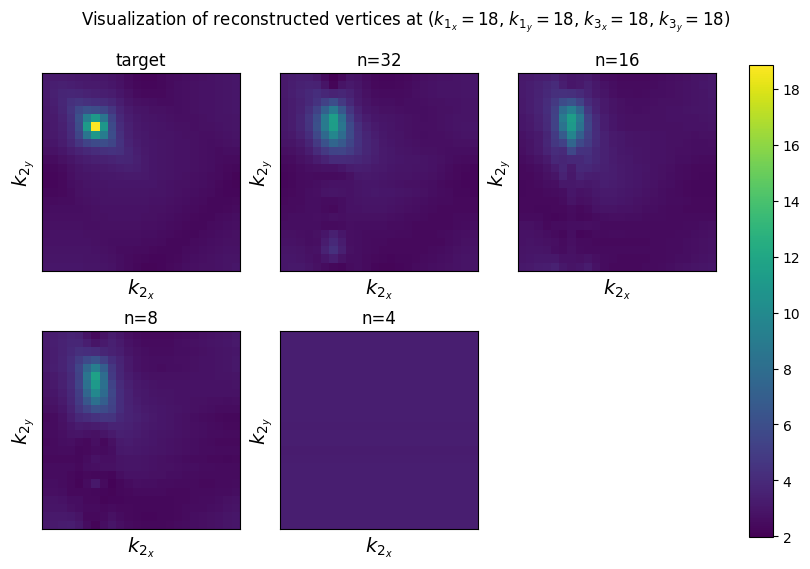

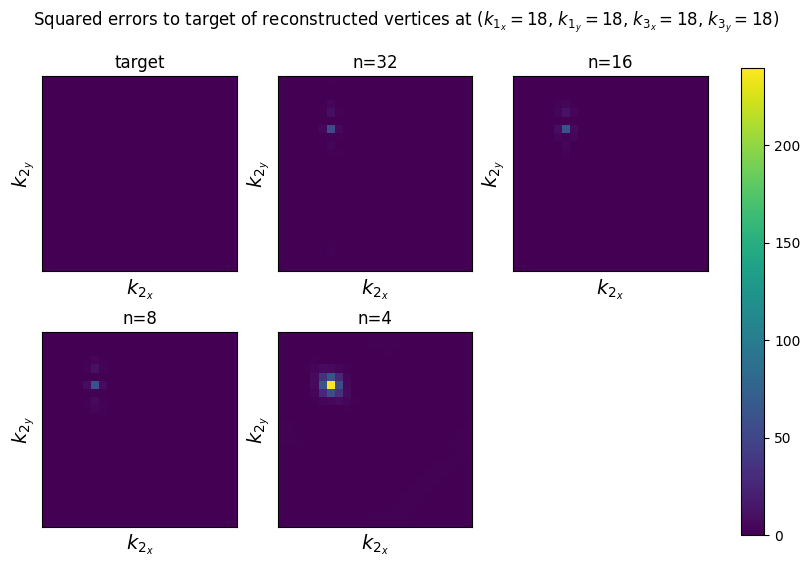

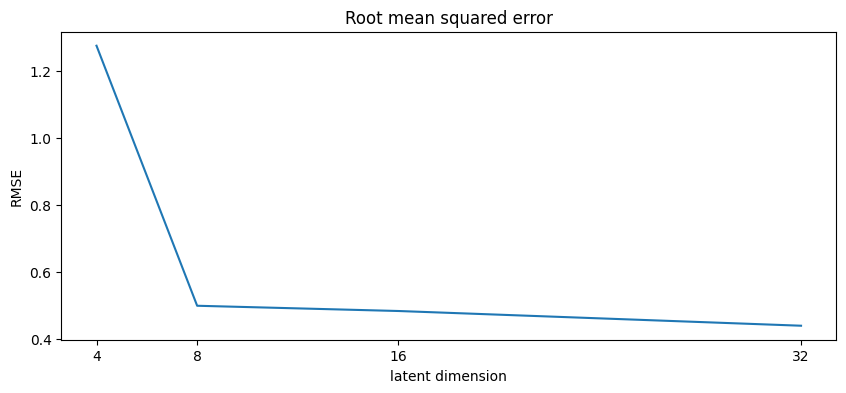

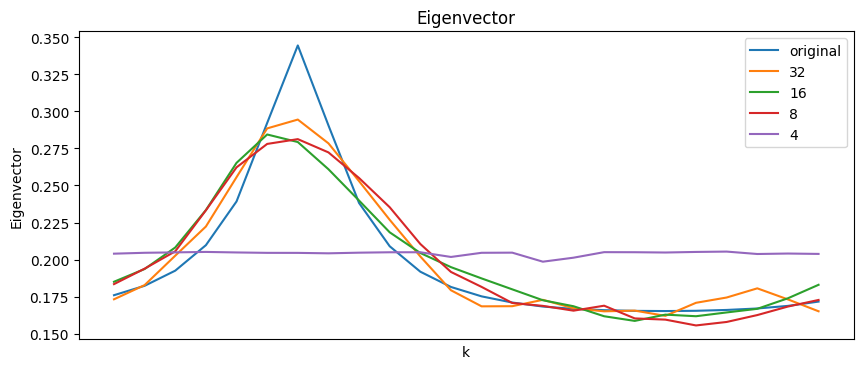

In [ ]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_0/checkpoints\last.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_0/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_1/checkpoints\last.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_1/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_2/checkpoints\last.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_2/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_3/checkpoints\last.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_3/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.4710
   latent_dim=16: RMSE=0.5280
   latent_dim=8: RMSE=0.5295
   latent_dim=4: RMSE=1.6256


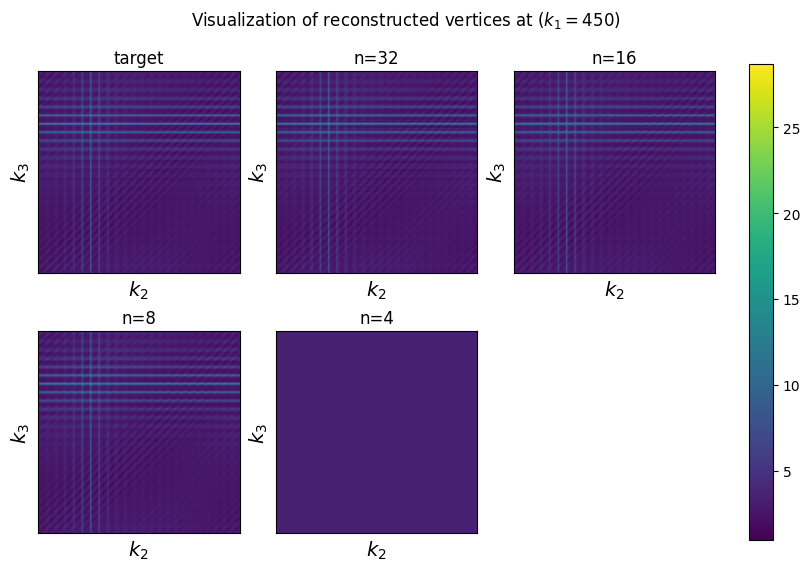

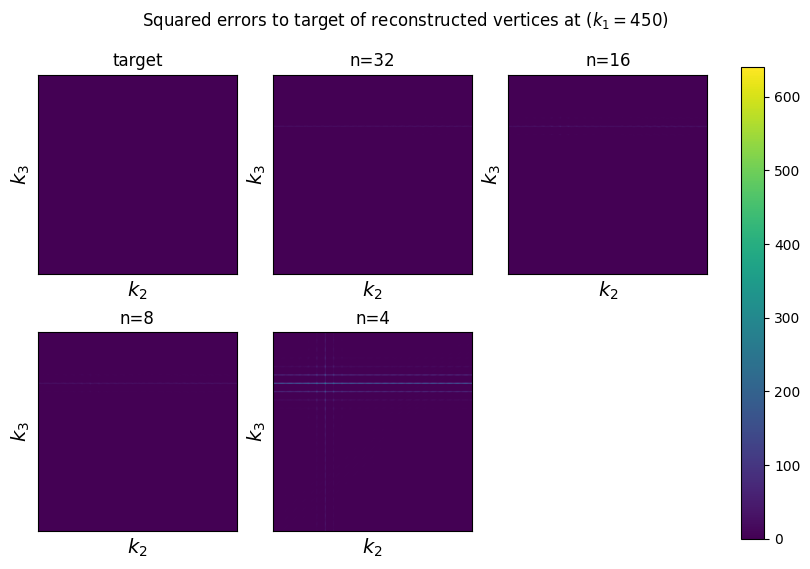

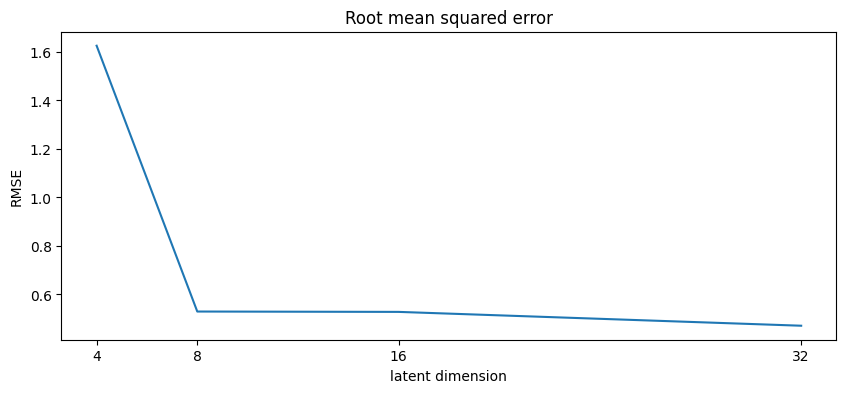

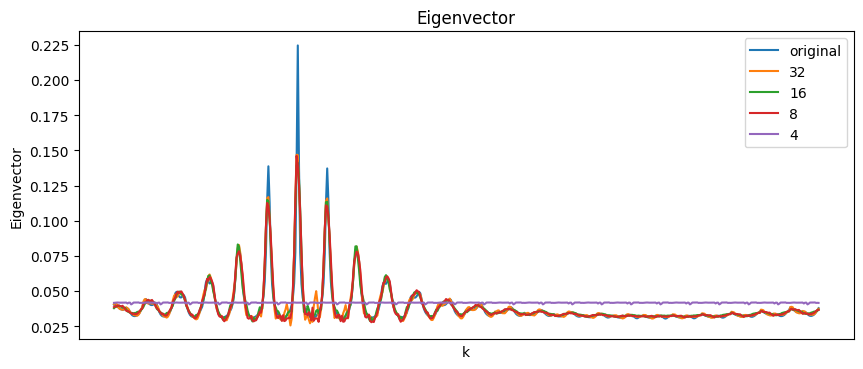

In [ ]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

In [44]:
sample_count = int((2000 * 576 * 3) / (24 * 6))
trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                            subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                            config_kwargs={'path_train': '../../../frgs_6d', 
                                        'hidden_dims': [128, 64, 32],
                                        'epochs': 100,
                                        'sample_count_per_vertex': sample_count, 
                                        'test_ratio': 0.2, 
                                        'subset': None, 
                                        'subset_shuffle': False, 
                                        'devices': 'auto', 
                                        'device_type': 'cpu', 
                                        'num_dataloader_workers': 4, 
                                        'strategy': 'auto', 
                                        'batch_size': 2048})

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\trainer\setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_0/checkpoints\last.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_0/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_1/checkpoints\last.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_1/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_2/checkpoints\last.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_2/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_3/checkpoints\last.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_3/checkpoints\last.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=32: RMSE=0.4167
   latent_dim=16: RMSE=0.4703
   latent_dim=8: RMSE=0.5316
   latent_dim=4: RMSE=1.6466


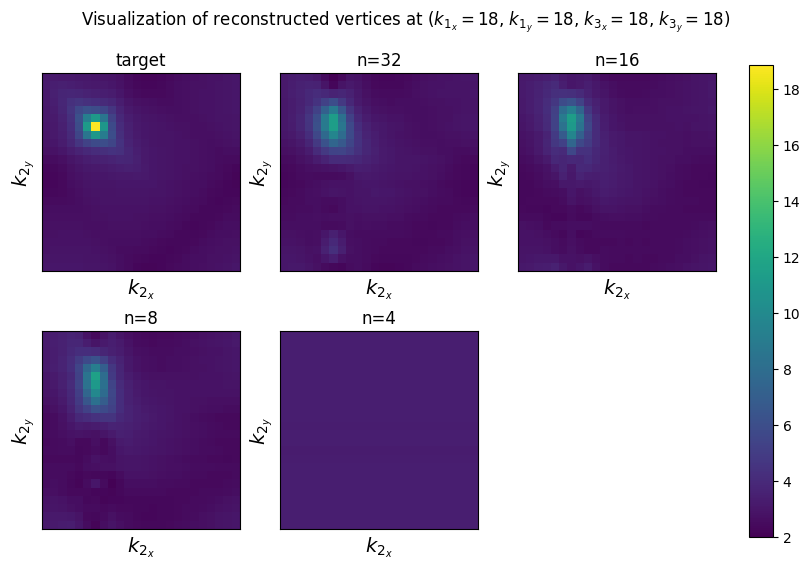

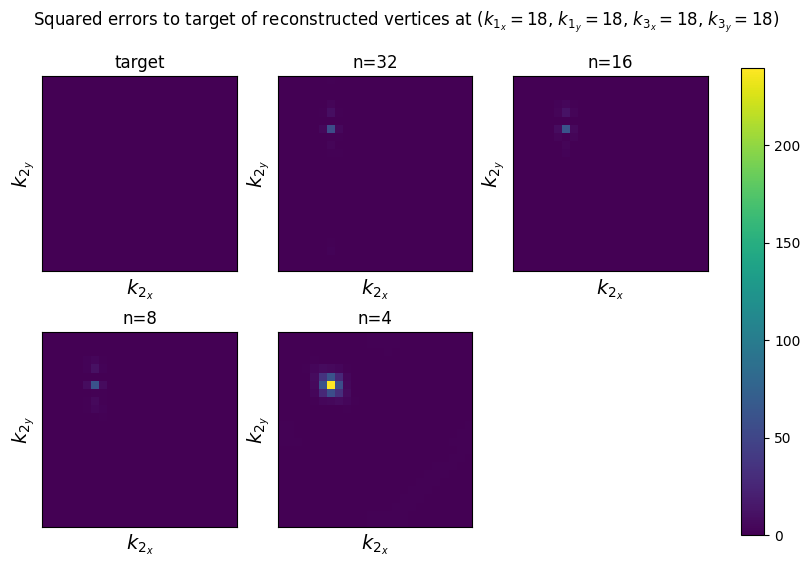

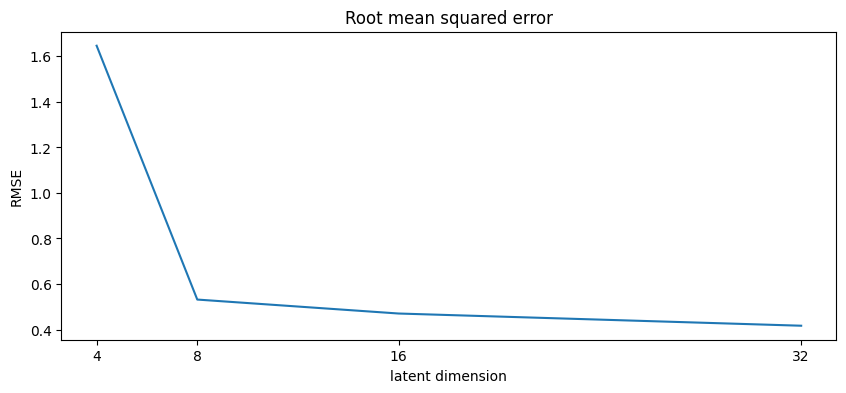

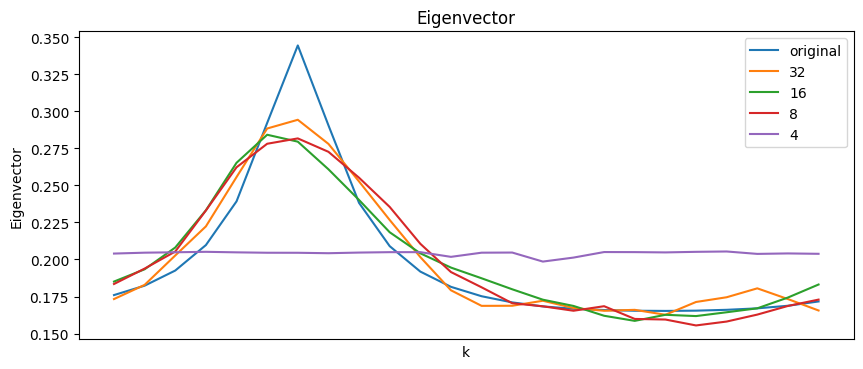

In [ ]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

RESULTS:
   latent_dim=32: RMSE=0.4167
   latent_dim=16: RMSE=0.4703
   latent_dim=8: RMSE=0.5316
   latent_dim=4: RMSE=1.6466


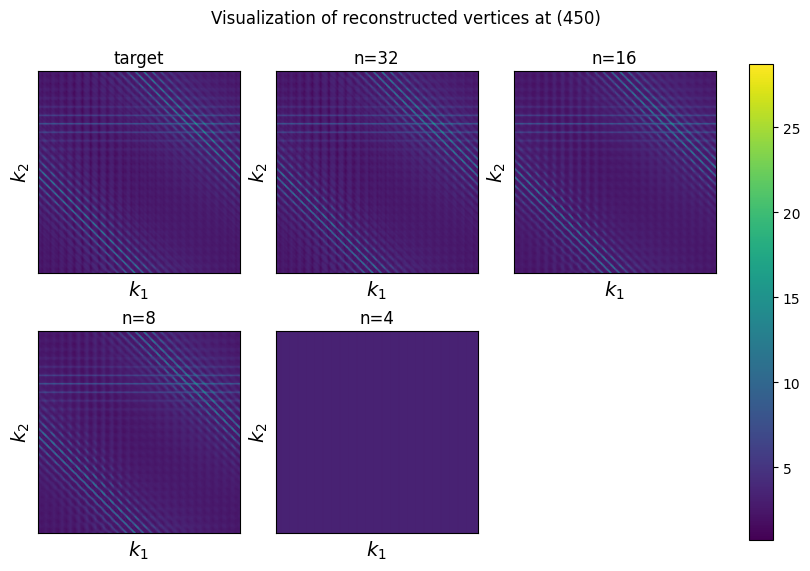

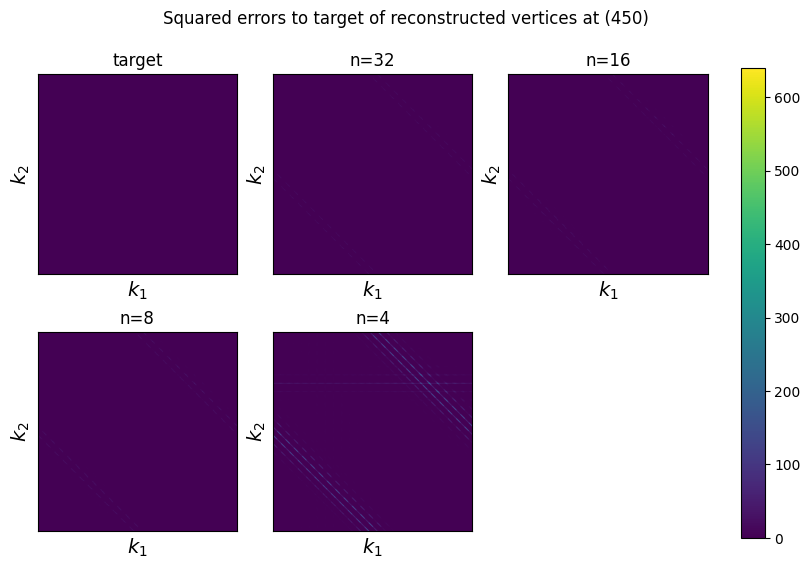

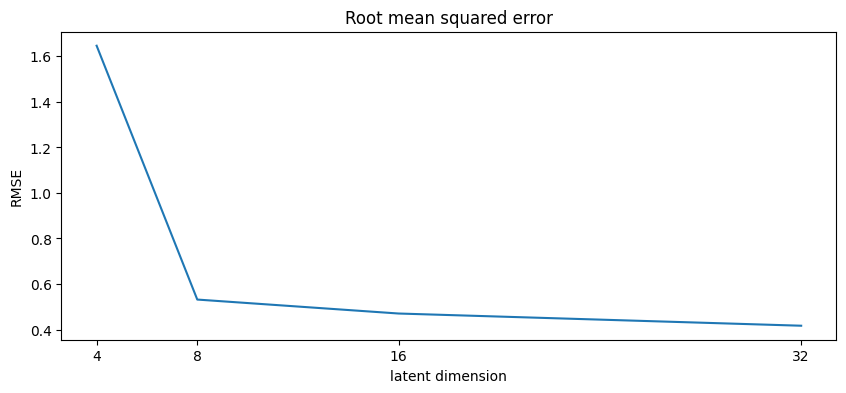

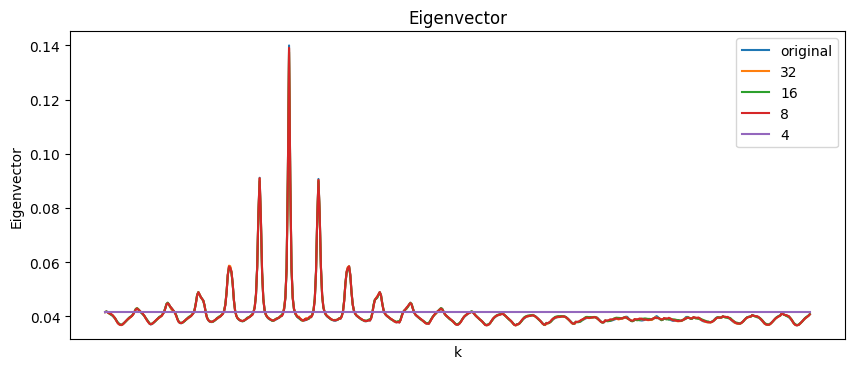

In [ ]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

## correlation analysis

load files:   0%|          | 0/51 [00:00<?, ?it/s]

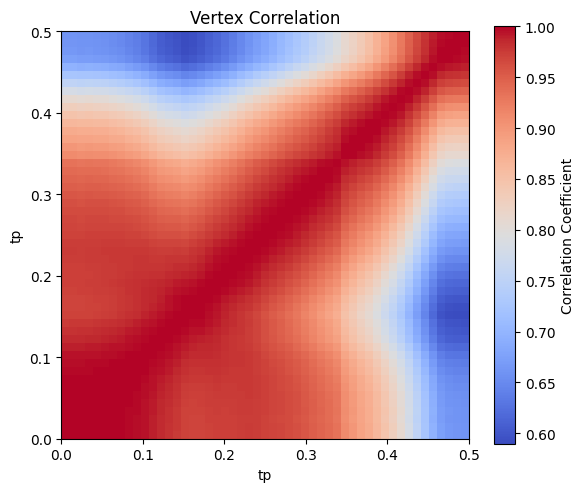

In [ ]:
cor_mat = verteval.vertex_correlation('../../../frgs_6d', pre_load_vertices=True)
vertvis.plot_correlation(cor_mat, "Vertex Correlation")

## phase classification

In [3]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)

In [5]:
pc = PhaseClassification('../../../frgs_6d', info[1]['save_path'], samples_per_vertex=2000, test_size=0.1)
pc.train()

Load data:   0%|          | 0/45 [00:00<?, ?it/s]

Fit models:   0%|          | 0/2 [00:00<?, ?it/s]

[LibSVM]...........................
*..*.
*
optimization finished, #iter = 30072
obj = -42421.853805, rho = 2.930341
nSV = 46968, nBSV = 46628
......................
*...*
optimization finished, #iter = 25221
obj = -32915.630153, rho = 2.875136
nSV = 37873, nBSV = 37573
.............................
*..*.*
optimization finished, #iter = 32032
obj = -45679.913812, rho = -0.182601
nSV = 48421, nBSV = 48043
Total nSV = 79517


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 128 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of 100 | elapsed:    1.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


In [20]:
pc = PhaseClassification('../../../frgs_6d', info[1]['save_path'], samples_per_vertex=2000, test_size=0.1)

Load data:   0%|          | 0/45 [00:00<?, ?it/s]

Predict with sampling from known vertices:   0%|          | 0/2 [00:00<?, ?it/s]

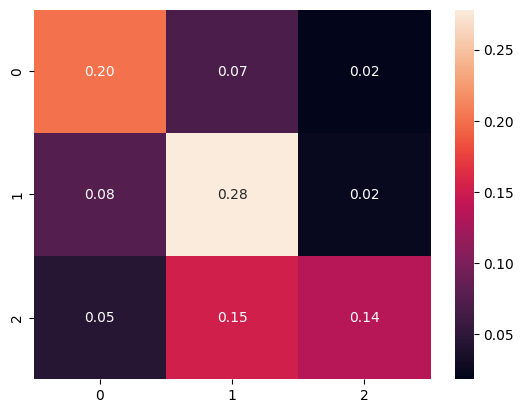

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.0s finished


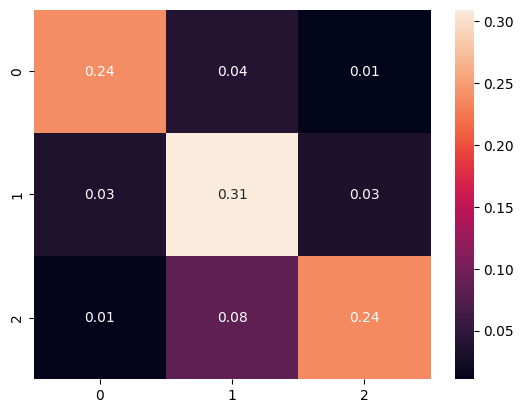

Predict with sampling from new vertices:   0%|          | 0/2 [00:00<?, ?it/s]

Load data:   0%|          | 0/6 [00:00<?, ?it/s]

/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-llm-training-v4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


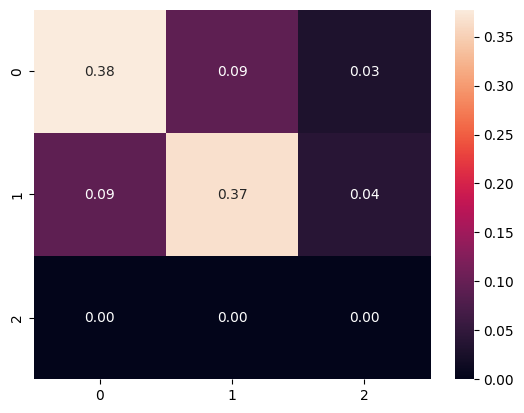

Load data:   0%|          | 0/6 [00:00<?, ?it/s]

[Parallel(n_jobs=100)]: Using backend ThreadingBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   2 out of 100 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=100)]: Done 100 out of 100 | elapsed:    0.0s finished
/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-llm-training-v4/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


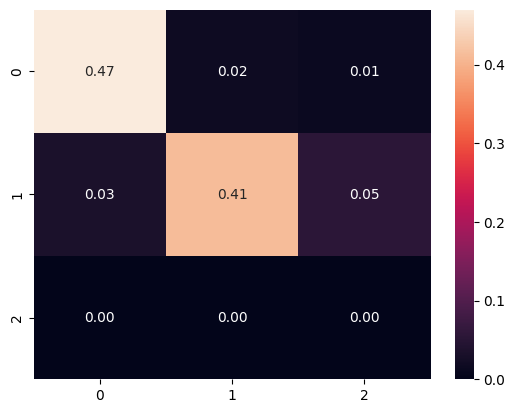

{'sampling from new vertices': {'SVC': ({'acc': np.float64(0.7446666666666666),
    'prec': 0.7446666666666667,
    'rec': 0.7446666666666667,
    'f1': 0.7446666666666667},
   array([[0.3775    , 0.09175   , 0.03075   ],
          [0.09241667, 0.36716667, 0.04041667],
          [0.        , 0.        , 0.        ]])),
  'RandomForestClassifier': ({'acc': np.float64(0.8819166666666667),
    'prec': 0.8819166666666667,
    'rec': 0.8819166666666667,
    'f1': 0.8819166666666667},
   array([[0.46966667, 0.01741667, 0.01291667],
          [0.03441667, 0.41225   , 0.05333333],
          [0.        , 0.        , 0.        ]]))},
 'sampling from known vertices': {'SVC': ({'acc': np.float64(0.6128227775286599),
    'prec': 0.6146146146146146,
    'rec': 0.6146146146146146,
    'f1': 0.6146146146146146},
   array([[0.201001  , 0.06936937, 0.01851852],
          [0.07537538, 0.27807808, 0.02432432],
          [0.04504505, 0.15275275, 0.13553554]])),
  'RandomForestClassifier': ({'acc': np.float

In [21]:
model_scores = pc.evaluate_classifiers(print_conf_mat=True)
model_scores

In [22]:
with open(f'phase_classification_results.pkl','wb') as f:
    pickle.dump(model_scores, f)

# 02 Training extent comparison

* excluding last vertex for testing
* compare different sample sizes and number of epochs

In [3]:
info_fn = 'eval_info_test.pkl'
info = verteval.load_info_dict(info_fn)
hidden_dims = [128, 64, 32]
sample_count = int((2000 * 576 * 3) / (24 * 6))
config_kwargs = {'path_train': '../../../frgs_6d', 
                 'hidden_dims': hidden_dims,
                 'epochs': 100,
                 'sample_count_per_vertex': sample_count, 
                 'test_ratio': 0.2, 
                 'subset': -1, 
                 'subset_shuffle': False, 
                 'devices': 'auto', 
                 'num_dataloader_workers': 4, 
                 'strategy': 'auto', 
                 'batch_size': 2048}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [4]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, hidden_dims)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (19) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 19: 'val_loss' reached 13.76022 (best 13.76022), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=0-step=19.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 38: 'val_loss' reached 13.22995 (best 13.22995), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=1-step=38.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 57: 'val_loss' reached 12.05774 (best 12.05774), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=2-step=57.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 76: 'val_loss' reached 9.77566 (best 9.77566), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=3-step=76.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 95: 'val_loss' reached 6.72918 (best 6.72918), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=4-step=95.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 114: 'val_loss' reached 4.75172 (best 4.75172), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=5-step=114.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 133: 'val_loss' reached 3.72541 (best 3.72541), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=6-step=133.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 152: 'val_loss' reached 3.06084 (best 3.06084), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=7-step=152.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 171: 'val_loss' reached 2.64783 (best 2.64783), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=8-step=171.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 190: 'val_loss' reached 2.40431 (best 2.40431), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=9-step=190.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 209: 'val_loss' reached 2.27323 (best 2.27323), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=10-step=209.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 228: 'val_loss' reached 2.20378 (best 2.20378), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=11-step=228.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 247: 'val_loss' reached 2.16125 (best 2.16125), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=12-step=247.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 266: 'val_loss' reached 2.12118 (best 2.12118), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=13-step=266.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 285: 'val_loss' reached 2.07743 (best 2.07743), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=14-step=285.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 304: 'val_loss' reached 2.03227 (best 2.03227), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=15-step=304.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 323: 'val_loss' reached 1.98690 (best 1.98690), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=16-step=323.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 342: 'val_loss' reached 1.94206 (best 1.94206), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=17-step=342.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 361: 'val_loss' reached 1.89769 (best 1.89769), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=18-step=361.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 380: 'val_loss' reached 1.85999 (best 1.85999), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=19-step=380.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 399: 'val_loss' reached 1.82939 (best 1.82939), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=20-step=399.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 418: 'val_loss' reached 1.80542 (best 1.80542), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=21-step=418.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 437: 'val_loss' reached 1.78600 (best 1.78600), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=22-step=437.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 456: 'val_loss' reached 1.77051 (best 1.77051), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=23-step=456.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 475: 'val_loss' reached 1.75633 (best 1.75633), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=24-step=475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 494: 'val_loss' reached 1.74114 (best 1.74114), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=25-step=494.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 513: 'val_loss' reached 1.72314 (best 1.72314), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=26-step=513.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 532: 'val_loss' reached 1.69986 (best 1.69986), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=27-step=532.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 551: 'val_loss' reached 1.66722 (best 1.66722), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=28-step=551.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 570: 'val_loss' reached 1.62708 (best 1.62708), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=29-step=570.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 589: 'val_loss' reached 1.57610 (best 1.57610), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=30-step=589.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 608: 'val_loss' reached 1.51636 (best 1.51636), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=31-step=608.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 627: 'val_loss' reached 1.44274 (best 1.44274), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=32-step=627.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 646: 'val_loss' reached 1.37363 (best 1.37363), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=33-step=646.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 665: 'val_loss' reached 1.31597 (best 1.31597), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=34-step=665.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 684: 'val_loss' reached 1.27006 (best 1.27006), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=35-step=684.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 703: 'val_loss' reached 1.23236 (best 1.23236), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=36-step=703.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 722: 'val_loss' reached 1.19342 (best 1.19342), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=37-step=722.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 741: 'val_loss' reached 1.15356 (best 1.15356), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=38-step=741.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 760: 'val_loss' reached 1.10981 (best 1.10981), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=39-step=760.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 779: 'val_loss' reached 1.05546 (best 1.05546), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=40-step=779.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 798: 'val_loss' reached 0.98699 (best 0.98699), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=41-step=798.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 817: 'val_loss' reached 0.90943 (best 0.90943), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=42-step=817.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 836: 'val_loss' reached 0.83474 (best 0.83474), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=43-step=836.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 855: 'val_loss' reached 0.77517 (best 0.77517), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=44-step=855.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 874: 'val_loss' reached 0.73683 (best 0.73683), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=45-step=874.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 893: 'val_loss' reached 0.71340 (best 0.71340), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=46-step=893.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 912: 'val_loss' reached 0.69762 (best 0.69762), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=47-step=912.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 931: 'val_loss' reached 0.68587 (best 0.68587), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=48-step=931.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 950: 'val_loss' reached 0.67651 (best 0.67651), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=49-step=950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 969: 'val_loss' reached 0.66781 (best 0.66781), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=50-step=969.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 988: 'val_loss' reached 0.65971 (best 0.65971), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=51-step=988.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1007: 'val_loss' reached 0.65206 (best 0.65206), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=52-step=1007.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1026: 'val_loss' reached 0.64493 (best 0.64493), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=53-step=1026.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1045: 'val_loss' reached 0.63777 (best 0.63777), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=54-step=1045.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1064: 'val_loss' reached 0.63088 (best 0.63088), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=55-step=1064.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1083: 'val_loss' reached 0.62373 (best 0.62373), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=56-step=1083.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1102: 'val_loss' reached 0.61669 (best 0.61669), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=57-step=1102.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1121: 'val_loss' reached 0.60956 (best 0.60956), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=58-step=1121.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1140: 'val_loss' reached 0.60252 (best 0.60252), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=59-step=1140.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1159: 'val_loss' reached 0.59537 (best 0.59537), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=60-step=1159.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1178: 'val_loss' reached 0.58800 (best 0.58800), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=61-step=1178.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1197: 'val_loss' reached 0.58039 (best 0.58039), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=62-step=1197.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1216: 'val_loss' reached 0.57263 (best 0.57263), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=63-step=1216.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1235: 'val_loss' reached 0.56490 (best 0.56490), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=64-step=1235.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1254: 'val_loss' reached 0.55690 (best 0.55690), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=65-step=1254.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1273: 'val_loss' reached 0.54884 (best 0.54884), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=66-step=1273.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1292: 'val_loss' reached 0.54101 (best 0.54101), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=67-step=1292.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 1311: 'val_loss' reached 0.53328 (best 0.53328), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=68-step=1311.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 1330: 'val_loss' reached 0.52526 (best 0.52526), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=69-step=1330.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 1349: 'val_loss' reached 0.51746 (best 0.51746), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=70-step=1349.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 1368: 'val_loss' reached 0.50959 (best 0.50959), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=71-step=1368.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 1387: 'val_loss' reached 0.50191 (best 0.50191), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=72-step=1387.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 1406: 'val_loss' reached 0.49468 (best 0.49468), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=73-step=1406.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 1425: 'val_loss' reached 0.48673 (best 0.48673), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=74-step=1425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 1444: 'val_loss' reached 0.47936 (best 0.47936), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=75-step=1444.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 1463: 'val_loss' reached 0.47207 (best 0.47207), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=76-step=1463.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 1482: 'val_loss' reached 0.46471 (best 0.46471), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=77-step=1482.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 1501: 'val_loss' reached 0.45674 (best 0.45674), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=78-step=1501.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 1520: 'val_loss' reached 0.44913 (best 0.44913), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=79-step=1520.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 1539: 'val_loss' reached 0.44168 (best 0.44168), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=80-step=1539.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 1558: 'val_loss' reached 0.43406 (best 0.43406), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=81-step=1558.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 1577: 'val_loss' reached 0.42660 (best 0.42660), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=82-step=1577.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 1596: 'val_loss' reached 0.41925 (best 0.41925), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=83-step=1596.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 1615: 'val_loss' reached 0.41216 (best 0.41216), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=84-step=1615.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 1634: 'val_loss' reached 0.40548 (best 0.40548), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=85-step=1634.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 1653: 'val_loss' reached 0.39782 (best 0.39782), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=86-step=1653.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 1672: 'val_loss' reached 0.39058 (best 0.39058), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=87-step=1672.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 1691: 'val_loss' reached 0.38337 (best 0.38337), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=88-step=1691.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 1710: 'val_loss' reached 0.37649 (best 0.37649), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=89-step=1710.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 1729: 'val_loss' reached 0.36987 (best 0.36987), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=90-step=1729.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 1748: 'val_loss' reached 0.36343 (best 0.36343), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=91-step=1748.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 1767: 'val_loss' reached 0.35747 (best 0.35747), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=92-step=1767.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 1786: 'val_loss' reached 0.35169 (best 0.35169), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=93-step=1786.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 1805: 'val_loss' reached 0.34635 (best 0.34635), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=94-step=1805.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 1824: 'val_loss' reached 0.34091 (best 0.34091), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=95-step=1824.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 1843: 'val_loss' reached 0.33577 (best 0.33577), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=96-step=1843.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 1862: 'val_loss' reached 0.33096 (best 0.33096), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=97-step=1862.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 1881: 'val_loss' reached 0.32625 (best 0.32625), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=98-step=1881.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 1900: 'val_loss' reached 0.32186 (best 0.32186), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07\\version_4\\checkpoints\\epoch=99-step=1900.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_4'


In [5]:
trainer = init_trainer(sample_count_per_vertex=2000, batch_size=128, epochs=1000)
verteval.eval_train(trainer, info, info_fn, hidden_dims)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (25) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 25: 'val_loss' reached 13.94829 (best 13.94829), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=0-step=25.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 50: 'val_loss' reached 12.55211 (best 12.55211), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=1-step=50.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 75: 'val_loss' reached 9.07770 (best 9.07770), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=2-step=75.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 100: 'val_loss' reached 5.25204 (best 5.25204), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=3-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 125: 'val_loss' reached 3.39389 (best 3.39389), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=4-step=125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 150: 'val_loss' reached 2.61028 (best 2.61028), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=5-step=150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 175: 'val_loss' reached 2.31408 (best 2.31408), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=6-step=175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 200: 'val_loss' reached 2.20366 (best 2.20366), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=7-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 225: 'val_loss' reached 2.15338 (best 2.15338), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=8-step=225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 250: 'val_loss' reached 2.10371 (best 2.10371), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=9-step=250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 275: 'val_loss' reached 2.06080 (best 2.06080), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=10-step=275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 300: 'val_loss' reached 2.01526 (best 2.01526), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=11-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 325: 'val_loss' reached 1.96621 (best 1.96621), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=12-step=325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 350: 'val_loss' reached 1.91222 (best 1.91222), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=13-step=350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 375: 'val_loss' reached 1.86087 (best 1.86087), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=14-step=375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 400: 'val_loss' reached 1.81478 (best 1.81478), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=15-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 425: 'val_loss' reached 1.77277 (best 1.77277), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=16-step=425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 450: 'val_loss' reached 1.73693 (best 1.73693), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=17-step=450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 475: 'val_loss' reached 1.70925 (best 1.70925), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=18-step=475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 500: 'val_loss' reached 1.68551 (best 1.68551), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=19-step=500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 525: 'val_loss' reached 1.66541 (best 1.66541), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=20-step=525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 550: 'val_loss' reached 1.64288 (best 1.64288), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=21-step=550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 575: 'val_loss' reached 1.62243 (best 1.62243), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=22-step=575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 600: 'val_loss' reached 1.59285 (best 1.59285), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=23-step=600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 625: 'val_loss' reached 1.55832 (best 1.55832), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=24-step=625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 650: 'val_loss' reached 1.52322 (best 1.52322), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=25-step=650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 675: 'val_loss' reached 1.47416 (best 1.47416), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=26-step=675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 700: 'val_loss' reached 1.41234 (best 1.41234), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=27-step=700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 725: 'val_loss' reached 1.33283 (best 1.33283), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=28-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 750: 'val_loss' reached 1.24530 (best 1.24530), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=29-step=750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 775: 'val_loss' reached 1.14795 (best 1.14795), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=30-step=775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 800: 'val_loss' reached 1.03976 (best 1.03976), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=31-step=800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 825: 'val_loss' reached 0.94348 (best 0.94348), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=32-step=825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 850: 'val_loss' reached 0.86059 (best 0.86059), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=33-step=850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 875: 'val_loss' reached 0.79447 (best 0.79447), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=34-step=875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 900: 'val_loss' reached 0.74800 (best 0.74800), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=35-step=900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 925: 'val_loss' reached 0.71686 (best 0.71686), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=36-step=925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 950: 'val_loss' reached 0.69372 (best 0.69372), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=37-step=950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 975: 'val_loss' reached 0.67531 (best 0.67531), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=38-step=975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1000: 'val_loss' reached 0.66368 (best 0.66368), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=39-step=1000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1025: 'val_loss' reached 0.65498 (best 0.65498), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=40-step=1025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1050: 'val_loss' reached 0.64481 (best 0.64481), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=41-step=1050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1075: 'val_loss' reached 0.63777 (best 0.63777), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=42-step=1075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1100: 'val_loss' reached 0.63195 (best 0.63195), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=43-step=1100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1125: 'val_loss' reached 0.62570 (best 0.62570), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=44-step=1125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1150: 'val_loss' reached 0.61803 (best 0.61803), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=45-step=1150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1175: 'val_loss' reached 0.61065 (best 0.61065), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=46-step=1175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1200: 'val_loss' reached 0.60556 (best 0.60556), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=47-step=1200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1225: 'val_loss' reached 0.59598 (best 0.59598), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=48-step=1225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1250: 'val_loss' reached 0.58578 (best 0.58578), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=49-step=1250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1275: 'val_loss' reached 0.57776 (best 0.57776), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=50-step=1275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1300: 'val_loss' reached 0.57093 (best 0.57093), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=51-step=1300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1325: 'val_loss' reached 0.56297 (best 0.56297), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=52-step=1325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1350: 'val_loss' reached 0.55340 (best 0.55340), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=53-step=1350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1375: 'val_loss' reached 0.54716 (best 0.54716), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=54-step=1375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1400: 'val_loss' reached 0.53841 (best 0.53841), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=55-step=1400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1425: 'val_loss' reached 0.53110 (best 0.53110), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=56-step=1425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1450: 'val_loss' reached 0.52241 (best 0.52241), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=57-step=1450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1475: 'val_loss' reached 0.51524 (best 0.51524), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=58-step=1475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1500: 'val_loss' reached 0.50926 (best 0.50926), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=59-step=1500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1525: 'val_loss' reached 0.50142 (best 0.50142), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=60-step=1525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1550: 'val_loss' reached 0.49624 (best 0.49624), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=61-step=1550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1575: 'val_loss' reached 0.48654 (best 0.48654), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=62-step=1575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1600: 'val_loss' reached 0.48046 (best 0.48046), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=63-step=1600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1625: 'val_loss' reached 0.47424 (best 0.47424), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=64-step=1625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1650: 'val_loss' reached 0.46783 (best 0.46783), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=65-step=1650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1675: 'val_loss' reached 0.46051 (best 0.46051), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=66-step=1675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1700: 'val_loss' reached 0.45408 (best 0.45408), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=67-step=1700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 1725: 'val_loss' reached 0.44858 (best 0.44858), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=68-step=1725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 1750: 'val_loss' reached 0.44482 (best 0.44482), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=69-step=1750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 1775: 'val_loss' reached 0.43729 (best 0.43729), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=70-step=1775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 1800: 'val_loss' reached 0.43178 (best 0.43178), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=71-step=1800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 1825: 'val_loss' reached 0.42660 (best 0.42660), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=72-step=1825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 1850: 'val_loss' reached 0.42146 (best 0.42146), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=73-step=1850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 1875: 'val_loss' reached 0.41534 (best 0.41534), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=74-step=1875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 1900: 'val_loss' reached 0.41253 (best 0.41253), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=75-step=1900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 1925: 'val_loss' reached 0.40532 (best 0.40532), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=76-step=1925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 1950: 'val_loss' reached 0.40101 (best 0.40101), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=77-step=1950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 1975: 'val_loss' reached 0.39634 (best 0.39634), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=78-step=1975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2000: 'val_loss' reached 0.39083 (best 0.39083), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=79-step=2000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2025: 'val_loss' reached 0.38667 (best 0.38667), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=80-step=2025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2050: 'val_loss' reached 0.38156 (best 0.38156), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=81-step=2050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2075: 'val_loss' reached 0.37729 (best 0.37729), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=82-step=2075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2100: 'val_loss' reached 0.37373 (best 0.37373), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=83-step=2100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2125: 'val_loss' reached 0.36808 (best 0.36808), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=84-step=2125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2150: 'val_loss' reached 0.36435 (best 0.36435), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=85-step=2150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2175: 'val_loss' reached 0.35971 (best 0.35971), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=86-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2200: 'val_loss' reached 0.35699 (best 0.35699), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=87-step=2200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2225: 'val_loss' reached 0.35192 (best 0.35192), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=88-step=2225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2250: 'val_loss' reached 0.34698 (best 0.34698), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=89-step=2250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2275: 'val_loss' reached 0.34455 (best 0.34455), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=90-step=2275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2300: 'val_loss' reached 0.34079 (best 0.34079), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=91-step=2300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2325: 'val_loss' reached 0.33679 (best 0.33679), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=92-step=2325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2350: 'val_loss' reached 0.33327 (best 0.33327), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=93-step=2350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2375: 'val_loss' reached 0.33043 (best 0.33043), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=94-step=2375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2400: 'val_loss' reached 0.32604 (best 0.32604), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=95-step=2400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2425: 'val_loss' reached 0.32336 (best 0.32336), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=96-step=2425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2450: 'val_loss' reached 0.32036 (best 0.32036), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=97-step=2450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2475: 'val_loss' reached 0.31601 (best 0.31601), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=98-step=2475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2500: 'val_loss' reached 0.31093 (best 0.31093), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=99-step=2500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 100, global step 2525: 'val_loss' reached 0.31020 (best 0.31020), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=100-step=2525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 101, global step 2550: 'val_loss' reached 0.30472 (best 0.30472), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=101-step=2550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 102, global step 2575: 'val_loss' reached 0.30061 (best 0.30061), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=102-step=2575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 103, global step 2600: 'val_loss' reached 0.29726 (best 0.29726), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=103-step=2600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 104, global step 2625: 'val_loss' reached 0.29464 (best 0.29464), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=104-step=2625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 105, global step 2650: 'val_loss' reached 0.29187 (best 0.29187), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=105-step=2650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 106, global step 2675: 'val_loss' reached 0.28821 (best 0.28821), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=106-step=2675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 107, global step 2700: 'val_loss' reached 0.28387 (best 0.28387), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=107-step=2700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 108, global step 2725: 'val_loss' reached 0.28101 (best 0.28101), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=108-step=2725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 109, global step 2750: 'val_loss' reached 0.27709 (best 0.27709), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=109-step=2750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 110, global step 2775: 'val_loss' reached 0.27541 (best 0.27541), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=110-step=2775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 111, global step 2800: 'val_loss' reached 0.27169 (best 0.27169), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=111-step=2800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 112, global step 2825: 'val_loss' reached 0.26792 (best 0.26792), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=112-step=2825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 113, global step 2850: 'val_loss' reached 0.26540 (best 0.26540), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=113-step=2850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 114, global step 2875: 'val_loss' reached 0.26318 (best 0.26318), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=114-step=2875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 115, global step 2900: 'val_loss' reached 0.25887 (best 0.25887), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=115-step=2900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 116, global step 2925: 'val_loss' reached 0.25818 (best 0.25818), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=116-step=2925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 117, global step 2950: 'val_loss' reached 0.25345 (best 0.25345), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=117-step=2950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 118, global step 2975: 'val_loss' reached 0.25072 (best 0.25072), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=118-step=2975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 119, global step 3000: 'val_loss' reached 0.24865 (best 0.24865), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=119-step=3000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 120, global step 3025: 'val_loss' reached 0.24562 (best 0.24562), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=120-step=3025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 121, global step 3050: 'val_loss' reached 0.24412 (best 0.24412), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=121-step=3050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 122, global step 3075: 'val_loss' reached 0.24046 (best 0.24046), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=122-step=3075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 123, global step 3100: 'val_loss' reached 0.23897 (best 0.23897), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=123-step=3100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 124, global step 3125: 'val_loss' reached 0.23723 (best 0.23723), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=124-step=3125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 125, global step 3150: 'val_loss' reached 0.23374 (best 0.23374), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=125-step=3150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 126, global step 3175: 'val_loss' reached 0.23165 (best 0.23165), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=126-step=3175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 127, global step 3200: 'val_loss' reached 0.22988 (best 0.22988), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=127-step=3200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 128, global step 3225: 'val_loss' reached 0.22758 (best 0.22758), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=128-step=3225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 129, global step 3250: 'val_loss' reached 0.22540 (best 0.22540), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=129-step=3250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 130, global step 3275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 131, global step 3300: 'val_loss' reached 0.22107 (best 0.22107), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=131-step=3300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 132, global step 3325: 'val_loss' reached 0.22036 (best 0.22036), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=132-step=3325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 133, global step 3350: 'val_loss' reached 0.21722 (best 0.21722), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=133-step=3350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 134, global step 3375: 'val_loss' reached 0.21555 (best 0.21555), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=134-step=3375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 135, global step 3400: 'val_loss' reached 0.21367 (best 0.21367), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=135-step=3400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 136, global step 3425: 'val_loss' reached 0.21244 (best 0.21244), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=136-step=3425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 137, global step 3450: 'val_loss' reached 0.21145 (best 0.21145), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=137-step=3450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 138, global step 3475: 'val_loss' reached 0.20846 (best 0.20846), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=138-step=3475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 139, global step 3500: 'val_loss' reached 0.20726 (best 0.20726), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=139-step=3500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 140, global step 3525: 'val_loss' reached 0.20536 (best 0.20536), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=140-step=3525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 141, global step 3550: 'val_loss' reached 0.20331 (best 0.20331), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=141-step=3550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 142, global step 3575: 'val_loss' reached 0.20224 (best 0.20224), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=142-step=3575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 143, global step 3600: 'val_loss' reached 0.19966 (best 0.19966), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=143-step=3600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 144, global step 3625: 'val_loss' reached 0.19823 (best 0.19823), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=144-step=3625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 145, global step 3650: 'val_loss' reached 0.19586 (best 0.19586), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=145-step=3650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 146, global step 3675: 'val_loss' reached 0.19416 (best 0.19416), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=146-step=3675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 147, global step 3700: 'val_loss' reached 0.19225 (best 0.19225), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=147-step=3700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 148, global step 3725: 'val_loss' reached 0.19155 (best 0.19155), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=148-step=3725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 149, global step 3750: 'val_loss' reached 0.18937 (best 0.18937), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=149-step=3750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 150, global step 3775: 'val_loss' reached 0.18808 (best 0.18808), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=150-step=3775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 151, global step 3800: 'val_loss' reached 0.18744 (best 0.18744), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=151-step=3800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 152, global step 3825: 'val_loss' reached 0.18487 (best 0.18487), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=152-step=3825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 153, global step 3850: 'val_loss' reached 0.18345 (best 0.18345), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=153-step=3850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 154, global step 3875: 'val_loss' reached 0.18307 (best 0.18307), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=154-step=3875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 155, global step 3900: 'val_loss' reached 0.18035 (best 0.18035), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=155-step=3900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 156, global step 3925: 'val_loss' reached 0.17824 (best 0.17824), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=156-step=3925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 157, global step 3950: 'val_loss' reached 0.17691 (best 0.17691), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=157-step=3950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 158, global step 3975: 'val_loss' reached 0.17547 (best 0.17547), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=158-step=3975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 159, global step 4000: 'val_loss' reached 0.17447 (best 0.17447), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=159-step=4000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 160, global step 4025: 'val_loss' reached 0.17220 (best 0.17220), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=160-step=4025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 161, global step 4050: 'val_loss' reached 0.17098 (best 0.17098), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=161-step=4050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 162, global step 4075: 'val_loss' reached 0.16950 (best 0.16950), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=162-step=4075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 163, global step 4100: 'val_loss' reached 0.16854 (best 0.16854), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=163-step=4100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 164, global step 4125: 'val_loss' reached 0.16684 (best 0.16684), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=164-step=4125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 165, global step 4150: 'val_loss' reached 0.16583 (best 0.16583), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=165-step=4150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 166, global step 4175: 'val_loss' reached 0.16495 (best 0.16495), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=166-step=4175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 167, global step 4200: 'val_loss' reached 0.16333 (best 0.16333), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=167-step=4200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 168, global step 4225: 'val_loss' reached 0.16293 (best 0.16293), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=168-step=4225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 169, global step 4250: 'val_loss' reached 0.16127 (best 0.16127), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=169-step=4250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 170, global step 4275: 'val_loss' reached 0.15993 (best 0.15993), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=170-step=4275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 171, global step 4300: 'val_loss' reached 0.15874 (best 0.15874), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=171-step=4300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 172, global step 4325: 'val_loss' reached 0.15824 (best 0.15824), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=172-step=4325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 173, global step 4350: 'val_loss' reached 0.15779 (best 0.15779), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=173-step=4350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 174, global step 4375: 'val_loss' reached 0.15562 (best 0.15562), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=174-step=4375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 175, global step 4400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 176, global step 4425: 'val_loss' reached 0.15351 (best 0.15351), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=176-step=4425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 177, global step 4450: 'val_loss' reached 0.15216 (best 0.15216), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=177-step=4450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 178, global step 4475: 'val_loss' reached 0.15183 (best 0.15183), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=178-step=4475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 179, global step 4500: 'val_loss' reached 0.15092 (best 0.15092), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=179-step=4500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 180, global step 4525: 'val_loss' reached 0.15010 (best 0.15010), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=180-step=4525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 181, global step 4550: 'val_loss' reached 0.14872 (best 0.14872), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=181-step=4550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 182, global step 4575: 'val_loss' reached 0.14679 (best 0.14679), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=182-step=4575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 183, global step 4600: 'val_loss' reached 0.14600 (best 0.14600), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=183-step=4600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 184, global step 4625: 'val_loss' reached 0.14532 (best 0.14532), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=184-step=4625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 185, global step 4650: 'val_loss' reached 0.14483 (best 0.14483), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=185-step=4650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 186, global step 4675: 'val_loss' reached 0.14339 (best 0.14339), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=186-step=4675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 187, global step 4700: 'val_loss' reached 0.14269 (best 0.14269), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=187-step=4700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 188, global step 4725: 'val_loss' reached 0.14105 (best 0.14105), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=188-step=4725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 189, global step 4750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 190, global step 4775: 'val_loss' reached 0.14016 (best 0.14016), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=190-step=4775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 191, global step 4800: 'val_loss' reached 0.13901 (best 0.13901), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=191-step=4800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 192, global step 4825: 'val_loss' reached 0.13812 (best 0.13812), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=192-step=4825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 193, global step 4850: 'val_loss' reached 0.13791 (best 0.13791), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=193-step=4850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 194, global step 4875: 'val_loss' reached 0.13618 (best 0.13618), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=194-step=4875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 195, global step 4900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 196, global step 4925: 'val_loss' reached 0.13523 (best 0.13523), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=196-step=4925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 197, global step 4950: 'val_loss' reached 0.13424 (best 0.13424), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=197-step=4950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 198, global step 4975: 'val_loss' reached 0.13271 (best 0.13271), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=198-step=4975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 199, global step 5000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 200, global step 5025: 'val_loss' reached 0.13125 (best 0.13125), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=200-step=5025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 201, global step 5050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 202, global step 5075: 'val_loss' reached 0.12943 (best 0.12943), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=202-step=5075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 203, global step 5100: 'val_loss' reached 0.12920 (best 0.12920), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=203-step=5100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 204, global step 5125: 'val_loss' reached 0.12804 (best 0.12804), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=204-step=5125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 205, global step 5150: 'val_loss' reached 0.12739 (best 0.12739), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=205-step=5150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 206, global step 5175: 'val_loss' reached 0.12690 (best 0.12690), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=206-step=5175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 207, global step 5200: 'val_loss' reached 0.12589 (best 0.12589), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=207-step=5200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 208, global step 5225: 'val_loss' reached 0.12500 (best 0.12500), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=208-step=5225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 209, global step 5250: 'val_loss' reached 0.12460 (best 0.12460), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=209-step=5250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 210, global step 5275: 'val_loss' reached 0.12348 (best 0.12348), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=210-step=5275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 211, global step 5300: 'val_loss' reached 0.12274 (best 0.12274), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=211-step=5300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 212, global step 5325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 213, global step 5350: 'val_loss' reached 0.12225 (best 0.12225), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=213-step=5350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 214, global step 5375: 'val_loss' reached 0.12186 (best 0.12186), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=214-step=5375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 215, global step 5400: 'val_loss' reached 0.12077 (best 0.12077), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=215-step=5400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 216, global step 5425: 'val_loss' reached 0.11994 (best 0.11994), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=216-step=5425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 217, global step 5450: 'val_loss' reached 0.11970 (best 0.11970), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=217-step=5450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 218, global step 5475: 'val_loss' reached 0.11868 (best 0.11868), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=218-step=5475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 219, global step 5500: 'val_loss' reached 0.11762 (best 0.11762), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=219-step=5500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 220, global step 5525: 'val_loss' reached 0.11708 (best 0.11708), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=220-step=5525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 221, global step 5550: 'val_loss' reached 0.11641 (best 0.11641), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=221-step=5550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 222, global step 5575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 223, global step 5600: 'val_loss' reached 0.11617 (best 0.11617), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=223-step=5600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 224, global step 5625: 'val_loss' reached 0.11486 (best 0.11486), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=224-step=5625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 225, global step 5650: 'val_loss' reached 0.11456 (best 0.11456), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=225-step=5650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 226, global step 5675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 227, global step 5700: 'val_loss' reached 0.11318 (best 0.11318), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=227-step=5700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 228, global step 5725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 229, global step 5750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 230, global step 5775: 'val_loss' reached 0.11219 (best 0.11219), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=230-step=5775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 231, global step 5800: 'val_loss' reached 0.11165 (best 0.11165), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=231-step=5800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 232, global step 5825: 'val_loss' reached 0.11140 (best 0.11140), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=232-step=5825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 233, global step 5850: 'val_loss' reached 0.11044 (best 0.11044), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=233-step=5850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 234, global step 5875: 'val_loss' reached 0.11005 (best 0.11005), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=234-step=5875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 235, global step 5900: 'val_loss' reached 0.10944 (best 0.10944), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=235-step=5900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 236, global step 5925: 'val_loss' reached 0.10869 (best 0.10869), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=236-step=5925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 237, global step 5950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 238, global step 5975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 239, global step 6000: 'val_loss' reached 0.10732 (best 0.10732), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=239-step=6000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 240, global step 6025: 'val_loss' reached 0.10726 (best 0.10726), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=240-step=6025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 241, global step 6050: 'val_loss' reached 0.10722 (best 0.10722), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=241-step=6050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 242, global step 6075: 'val_loss' reached 0.10679 (best 0.10679), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=242-step=6075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 243, global step 6100: 'val_loss' reached 0.10563 (best 0.10563), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=243-step=6100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 244, global step 6125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 245, global step 6150: 'val_loss' reached 0.10534 (best 0.10534), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=245-step=6150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 246, global step 6175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 247, global step 6200: 'val_loss' reached 0.10527 (best 0.10527), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=247-step=6200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 248, global step 6225: 'val_loss' reached 0.10399 (best 0.10399), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=248-step=6225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 249, global step 6250: 'val_loss' reached 0.10372 (best 0.10372), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=249-step=6250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 250, global step 6275: 'val_loss' reached 0.10337 (best 0.10337), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=250-step=6275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 251, global step 6300: 'val_loss' reached 0.10300 (best 0.10300), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=251-step=6300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 252, global step 6325: 'val_loss' reached 0.10267 (best 0.10267), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=252-step=6325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 253, global step 6350: 'val_loss' reached 0.10211 (best 0.10211), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=253-step=6350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 254, global step 6375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 255, global step 6400: 'val_loss' reached 0.10115 (best 0.10115), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=255-step=6400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 256, global step 6425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 257, global step 6450: 'val_loss' reached 0.10114 (best 0.10114), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=257-step=6450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 258, global step 6475: 'val_loss' reached 0.10083 (best 0.10083), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=258-step=6475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 259, global step 6500: 'val_loss' reached 0.10004 (best 0.10004), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=259-step=6500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 260, global step 6525: 'val_loss' reached 0.09917 (best 0.09917), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=260-step=6525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 261, global step 6550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 262, global step 6575: 'val_loss' reached 0.09889 (best 0.09889), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=262-step=6575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 263, global step 6600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 264, global step 6625: 'val_loss' reached 0.09800 (best 0.09800), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=264-step=6625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 265, global step 6650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 266, global step 6675: 'val_loss' reached 0.09730 (best 0.09730), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=266-step=6675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 267, global step 6700: 'val_loss' reached 0.09726 (best 0.09726), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=267-step=6700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 268, global step 6725: 'val_loss' reached 0.09710 (best 0.09710), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=268-step=6725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 269, global step 6750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 270, global step 6775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 271, global step 6800: 'val_loss' reached 0.09633 (best 0.09633), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=271-step=6800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 272, global step 6825: 'val_loss' reached 0.09580 (best 0.09580), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=272-step=6825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 273, global step 6850: 'val_loss' reached 0.09451 (best 0.09451), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=273-step=6850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 274, global step 6875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 275, global step 6900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 276, global step 6925: 'val_loss' reached 0.09411 (best 0.09411), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=276-step=6925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 277, global step 6950: 'val_loss' reached 0.09339 (best 0.09339), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=277-step=6950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 278, global step 6975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 279, global step 7000: 'val_loss' reached 0.09324 (best 0.09324), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=279-step=7000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 280, global step 7025: 'val_loss' reached 0.09294 (best 0.09294), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=280-step=7025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 281, global step 7050: 'val_loss' reached 0.09243 (best 0.09243), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=281-step=7050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 282, global step 7075: 'val_loss' reached 0.09227 (best 0.09227), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=282-step=7075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 283, global step 7100: 'val_loss' reached 0.09176 (best 0.09176), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=283-step=7100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 284, global step 7125: 'val_loss' reached 0.09160 (best 0.09160), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=284-step=7125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 285, global step 7150: 'val_loss' reached 0.09146 (best 0.09146), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=285-step=7150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 286, global step 7175: 'val_loss' reached 0.09103 (best 0.09103), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=286-step=7175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 287, global step 7200: 'val_loss' reached 0.09023 (best 0.09023), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=287-step=7200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 288, global step 7225: 'val_loss' reached 0.08997 (best 0.08997), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=288-step=7225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 289, global step 7250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 290, global step 7275: 'val_loss' reached 0.08943 (best 0.08943), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=290-step=7275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 291, global step 7300: 'val_loss' reached 0.08896 (best 0.08896), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=291-step=7300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 292, global step 7325: 'val_loss' reached 0.08866 (best 0.08866), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=292-step=7325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 293, global step 7350: 'val_loss' reached 0.08848 (best 0.08848), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=293-step=7350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 294, global step 7375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 295, global step 7400: 'val_loss' reached 0.08779 (best 0.08779), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=295-step=7400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 296, global step 7425: 'val_loss' reached 0.08779 (best 0.08779), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=296-step=7425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 297, global step 7450: 'val_loss' reached 0.08680 (best 0.08680), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=297-step=7450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 298, global step 7475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 299, global step 7500: 'val_loss' reached 0.08634 (best 0.08634), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=299-step=7500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 300, global step 7525: 'val_loss' reached 0.08600 (best 0.08600), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=300-step=7525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 301, global step 7550: 'val_loss' reached 0.08578 (best 0.08578), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=301-step=7550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 302, global step 7575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 303, global step 7600: 'val_loss' reached 0.08511 (best 0.08511), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=303-step=7600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 304, global step 7625: 'val_loss' reached 0.08416 (best 0.08416), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=304-step=7625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 305, global step 7650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 306, global step 7675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 307, global step 7700: 'val_loss' reached 0.08379 (best 0.08379), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=307-step=7700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 308, global step 7725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 309, global step 7750: 'val_loss' reached 0.08371 (best 0.08371), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=309-step=7750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 310, global step 7775: 'val_loss' reached 0.08270 (best 0.08270), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=310-step=7775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 311, global step 7800: 'val_loss' reached 0.08255 (best 0.08255), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=311-step=7800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 312, global step 7825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 313, global step 7850: 'val_loss' reached 0.08180 (best 0.08180), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=313-step=7850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 314, global step 7875: 'val_loss' reached 0.08178 (best 0.08178), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=314-step=7875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 315, global step 7900: 'val_loss' reached 0.08166 (best 0.08166), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=315-step=7900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 316, global step 7925: 'val_loss' reached 0.08121 (best 0.08121), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=316-step=7925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 317, global step 7950: 'val_loss' reached 0.08082 (best 0.08082), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=317-step=7950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 318, global step 7975: 'val_loss' reached 0.08002 (best 0.08002), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=318-step=7975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 319, global step 8000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 320, global step 8025: 'val_loss' reached 0.07988 (best 0.07988), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=320-step=8025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 321, global step 8050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 322, global step 8075: 'val_loss' reached 0.07877 (best 0.07877), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=322-step=8075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 323, global step 8100: 'val_loss' reached 0.07873 (best 0.07873), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=323-step=8100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 324, global step 8125: 'val_loss' reached 0.07823 (best 0.07823), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=324-step=8125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 325, global step 8150: 'val_loss' reached 0.07822 (best 0.07822), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=325-step=8150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 326, global step 8175: 'val_loss' reached 0.07738 (best 0.07738), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=326-step=8175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 327, global step 8200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 328, global step 8225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 329, global step 8250: 'val_loss' reached 0.07690 (best 0.07690), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=329-step=8250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 330, global step 8275: 'val_loss' reached 0.07645 (best 0.07645), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=330-step=8275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 331, global step 8300: 'val_loss' reached 0.07583 (best 0.07583), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=331-step=8300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 332, global step 8325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 333, global step 8350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 334, global step 8375: 'val_loss' reached 0.07523 (best 0.07523), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=334-step=8375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 335, global step 8400: 'val_loss' reached 0.07501 (best 0.07501), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=335-step=8400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 336, global step 8425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 337, global step 8450: 'val_loss' reached 0.07426 (best 0.07426), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=337-step=8450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 338, global step 8475: 'val_loss' reached 0.07423 (best 0.07423), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=338-step=8475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 339, global step 8500: 'val_loss' reached 0.07390 (best 0.07390), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=339-step=8500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 340, global step 8525: 'val_loss' reached 0.07298 (best 0.07298), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=340-step=8525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 341, global step 8550: 'val_loss' reached 0.07267 (best 0.07267), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=341-step=8550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 342, global step 8575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 343, global step 8600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 344, global step 8625: 'val_loss' reached 0.07199 (best 0.07199), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=344-step=8625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 345, global step 8650: 'val_loss' reached 0.07194 (best 0.07194), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=345-step=8650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 346, global step 8675: 'val_loss' reached 0.07184 (best 0.07184), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=346-step=8675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 347, global step 8700: 'val_loss' reached 0.07182 (best 0.07182), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=347-step=8700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 348, global step 8725: 'val_loss' reached 0.07128 (best 0.07128), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=348-step=8725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 349, global step 8750: 'val_loss' reached 0.07120 (best 0.07120), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=349-step=8750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 350, global step 8775: 'val_loss' reached 0.07100 (best 0.07100), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=350-step=8775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 351, global step 8800: 'val_loss' reached 0.07022 (best 0.07022), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=351-step=8800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 352, global step 8825: 'val_loss' reached 0.07016 (best 0.07016), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=352-step=8825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 353, global step 8850: 'val_loss' reached 0.07000 (best 0.07000), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=353-step=8850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 354, global step 8875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 355, global step 8900: 'val_loss' reached 0.06995 (best 0.06995), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=355-step=8900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 356, global step 8925: 'val_loss' reached 0.06908 (best 0.06908), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=356-step=8925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 357, global step 8950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 358, global step 8975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 359, global step 9000: 'val_loss' reached 0.06803 (best 0.06803), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=359-step=9000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 360, global step 9025: 'val_loss' reached 0.06790 (best 0.06790), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=360-step=9025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 361, global step 9050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 362, global step 9075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 363, global step 9100: 'val_loss' reached 0.06692 (best 0.06692), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=363-step=9100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 364, global step 9125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 365, global step 9150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 366, global step 9175: 'val_loss' reached 0.06663 (best 0.06663), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=366-step=9175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 367, global step 9200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 368, global step 9225: 'val_loss' reached 0.06566 (best 0.06566), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=368-step=9225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 369, global step 9250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 370, global step 9275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 371, global step 9300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 372, global step 9325: 'val_loss' reached 0.06520 (best 0.06520), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=372-step=9325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 373, global step 9350: 'val_loss' reached 0.06471 (best 0.06471), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=373-step=9350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 374, global step 9375: 'val_loss' reached 0.06455 (best 0.06455), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=374-step=9375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 375, global step 9400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 376, global step 9425: 'val_loss' reached 0.06404 (best 0.06404), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=376-step=9425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 377, global step 9450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 378, global step 9475: 'val_loss' reached 0.06361 (best 0.06361), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=378-step=9475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 379, global step 9500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 380, global step 9525: 'val_loss' reached 0.06302 (best 0.06302), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=380-step=9525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 381, global step 9550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 382, global step 9575: 'val_loss' reached 0.06286 (best 0.06286), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=382-step=9575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 383, global step 9600: 'val_loss' reached 0.06270 (best 0.06270), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=383-step=9600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 384, global step 9625: 'val_loss' reached 0.06265 (best 0.06265), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=384-step=9625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 385, global step 9650: 'val_loss' reached 0.06186 (best 0.06186), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=385-step=9650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 386, global step 9675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 387, global step 9700: 'val_loss' reached 0.06152 (best 0.06152), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=387-step=9700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 388, global step 9725: 'val_loss' reached 0.06122 (best 0.06122), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=388-step=9725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 389, global step 9750: 'val_loss' reached 0.06109 (best 0.06109), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=389-step=9750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 390, global step 9775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 391, global step 9800: 'val_loss' reached 0.06049 (best 0.06049), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=391-step=9800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 392, global step 9825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 393, global step 9850: 'val_loss' reached 0.06030 (best 0.06030), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=393-step=9850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 394, global step 9875: 'val_loss' reached 0.05961 (best 0.05961), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=394-step=9875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 395, global step 9900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 396, global step 9925: 'val_loss' reached 0.05944 (best 0.05944), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=396-step=9925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 397, global step 9950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 398, global step 9975: 'val_loss' reached 0.05899 (best 0.05899), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=398-step=9975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 399, global step 10000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 400, global step 10025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 401, global step 10050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 402, global step 10075: 'val_loss' reached 0.05838 (best 0.05838), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=402-step=10075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 403, global step 10100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 404, global step 10125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 405, global step 10150: 'val_loss' reached 0.05783 (best 0.05783), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=405-step=10150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 406, global step 10175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 407, global step 10200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 408, global step 10225: 'val_loss' reached 0.05702 (best 0.05702), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=408-step=10225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 409, global step 10250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 410, global step 10275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 411, global step 10300: 'val_loss' reached 0.05686 (best 0.05686), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=411-step=10300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 412, global step 10325: 'val_loss' reached 0.05641 (best 0.05641), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=412-step=10325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 413, global step 10350: 'val_loss' reached 0.05627 (best 0.05627), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=413-step=10350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 414, global step 10375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 415, global step 10400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 416, global step 10425: 'val_loss' reached 0.05603 (best 0.05603), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=416-step=10425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 417, global step 10450: 'val_loss' reached 0.05533 (best 0.05533), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=417-step=10450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 418, global step 10475: 'val_loss' reached 0.05532 (best 0.05532), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=418-step=10475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 419, global step 10500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 420, global step 10525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 421, global step 10550: 'val_loss' reached 0.05530 (best 0.05530), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=421-step=10550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 422, global step 10575: 'val_loss' reached 0.05486 (best 0.05486), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=422-step=10575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 423, global step 10600: 'val_loss' reached 0.05471 (best 0.05471), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=423-step=10600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 424, global step 10625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 425, global step 10650: 'val_loss' reached 0.05418 (best 0.05418), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=425-step=10650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 426, global step 10675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 427, global step 10700: 'val_loss' reached 0.05412 (best 0.05412), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=427-step=10700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 428, global step 10725: 'val_loss' reached 0.05408 (best 0.05408), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=428-step=10725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 429, global step 10750: 'val_loss' reached 0.05400 (best 0.05400), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=429-step=10750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 430, global step 10775: 'val_loss' reached 0.05345 (best 0.05345), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=430-step=10775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 431, global step 10800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 432, global step 10825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 433, global step 10850: 'val_loss' reached 0.05324 (best 0.05324), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=433-step=10850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 434, global step 10875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 435, global step 10900: 'val_loss' reached 0.05296 (best 0.05296), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=435-step=10900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 436, global step 10925: 'val_loss' reached 0.05262 (best 0.05262), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=436-step=10925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 437, global step 10950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 438, global step 10975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 439, global step 11000: 'val_loss' reached 0.05204 (best 0.05204), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=439-step=11000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 440, global step 11025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 441, global step 11050: 'val_loss' reached 0.05191 (best 0.05191), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=441-step=11050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 442, global step 11075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 443, global step 11100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 444, global step 11125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 445, global step 11150: 'val_loss' reached 0.05127 (best 0.05127), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=445-step=11150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 446, global step 11175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 447, global step 11200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 448, global step 11225: 'val_loss' reached 0.05082 (best 0.05082), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=448-step=11225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 449, global step 11250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 450, global step 11275: 'val_loss' reached 0.05077 (best 0.05077), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=450-step=11275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 451, global step 11300: 'val_loss' reached 0.05070 (best 0.05070), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=451-step=11300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 452, global step 11325: 'val_loss' reached 0.05057 (best 0.05057), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=452-step=11325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 453, global step 11350: 'val_loss' reached 0.05005 (best 0.05005), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=453-step=11350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 454, global step 11375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 455, global step 11400: 'val_loss' reached 0.04978 (best 0.04978), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=455-step=11400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 456, global step 11425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 457, global step 11450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 458, global step 11475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 459, global step 11500: 'val_loss' reached 0.04945 (best 0.04945), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=459-step=11500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 460, global step 11525: 'val_loss' reached 0.04914 (best 0.04914), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=460-step=11525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 461, global step 11550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 462, global step 11575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 463, global step 11600: 'val_loss' reached 0.04897 (best 0.04897), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=463-step=11600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 464, global step 11625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 465, global step 11650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 466, global step 11675: 'val_loss' reached 0.04847 (best 0.04847), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=466-step=11675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 467, global step 11700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 468, global step 11725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 469, global step 11750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 470, global step 11775: 'val_loss' reached 0.04816 (best 0.04816), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=470-step=11775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 471, global step 11800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 472, global step 11825: 'val_loss' reached 0.04814 (best 0.04814), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=472-step=11825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 473, global step 11850: 'val_loss' reached 0.04750 (best 0.04750), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=473-step=11850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 474, global step 11875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 475, global step 11900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 476, global step 11925: 'val_loss' reached 0.04740 (best 0.04740), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=476-step=11925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 477, global step 11950: 'val_loss' reached 0.04721 (best 0.04721), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=477-step=11950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 478, global step 11975: 'val_loss' reached 0.04700 (best 0.04700), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=478-step=11975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 479, global step 12000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 480, global step 12025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 481, global step 12050: 'val_loss' reached 0.04681 (best 0.04681), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=481-step=12050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 482, global step 12075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 483, global step 12100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 484, global step 12125: 'val_loss' reached 0.04660 (best 0.04660), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=484-step=12125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 485, global step 12150: 'val_loss' reached 0.04643 (best 0.04643), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=485-step=12150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 486, global step 12175: 'val_loss' reached 0.04624 (best 0.04624), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=486-step=12175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 487, global step 12200: 'val_loss' reached 0.04614 (best 0.04614), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=487-step=12200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 488, global step 12225: 'val_loss' reached 0.04602 (best 0.04602), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=488-step=12225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 489, global step 12250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 490, global step 12275: 'val_loss' reached 0.04514 (best 0.04514), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=490-step=12275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 491, global step 12300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 492, global step 12325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 493, global step 12350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 494, global step 12375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 495, global step 12400: 'val_loss' reached 0.04505 (best 0.04505), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=495-step=12400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 496, global step 12425: 'val_loss' reached 0.04478 (best 0.04478), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=496-step=12425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 497, global step 12450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 498, global step 12475: 'val_loss' reached 0.04464 (best 0.04464), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=498-step=12475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 499, global step 12500: 'val_loss' reached 0.04452 (best 0.04452), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=499-step=12500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 500, global step 12525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 501, global step 12550: 'val_loss' reached 0.04402 (best 0.04402), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=501-step=12550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 502, global step 12575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 503, global step 12600: 'val_loss' reached 0.04396 (best 0.04396), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=503-step=12600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 504, global step 12625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 505, global step 12650: 'val_loss' reached 0.04391 (best 0.04391), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=505-step=12650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 506, global step 12675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 507, global step 12700: 'val_loss' reached 0.04390 (best 0.04390), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=507-step=12700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 508, global step 12725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 509, global step 12750: 'val_loss' reached 0.04353 (best 0.04353), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=509-step=12750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 510, global step 12775: 'val_loss' reached 0.04335 (best 0.04335), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=510-step=12775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 511, global step 12800: 'val_loss' reached 0.04327 (best 0.04327), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=511-step=12800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 512, global step 12825: 'val_loss' reached 0.04300 (best 0.04300), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=512-step=12825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 513, global step 12850: 'val_loss' reached 0.04259 (best 0.04259), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=513-step=12850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 514, global step 12875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 515, global step 12900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 516, global step 12925: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 517, global step 12950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 518, global step 12975: 'val_loss' reached 0.04219 (best 0.04219), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=518-step=12975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 519, global step 13000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 520, global step 13025: 'val_loss' reached 0.04210 (best 0.04210), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=520-step=13025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 521, global step 13050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 522, global step 13075: 'val_loss' reached 0.04190 (best 0.04190), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=522-step=13075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 523, global step 13100: 'val_loss' reached 0.04140 (best 0.04140), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=523-step=13100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 524, global step 13125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 525, global step 13150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 526, global step 13175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 527, global step 13200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 528, global step 13225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 529, global step 13250: 'val_loss' reached 0.04133 (best 0.04133), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=529-step=13250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 530, global step 13275: 'val_loss' reached 0.04071 (best 0.04071), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=530-step=13275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 531, global step 13300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 532, global step 13325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 533, global step 13350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 534, global step 13375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 535, global step 13400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 536, global step 13425: 'val_loss' reached 0.04053 (best 0.04053), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=536-step=13425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 537, global step 13450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 538, global step 13475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 539, global step 13500: 'val_loss' reached 0.04044 (best 0.04044), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=539-step=13500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 540, global step 13525: 'val_loss' reached 0.03991 (best 0.03991), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=540-step=13525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 541, global step 13550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 542, global step 13575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 543, global step 13600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 544, global step 13625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 545, global step 13650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 546, global step 13675: 'val_loss' reached 0.03967 (best 0.03967), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=546-step=13675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 547, global step 13700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 548, global step 13725: 'val_loss' reached 0.03967 (best 0.03967), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=548-step=13725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 549, global step 13750: 'val_loss' reached 0.03944 (best 0.03944), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=549-step=13750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 550, global step 13775: 'val_loss' reached 0.03911 (best 0.03911), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=550-step=13775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 551, global step 13800: 'val_loss' reached 0.03896 (best 0.03896), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=551-step=13800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 552, global step 13825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 553, global step 13850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 554, global step 13875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 555, global step 13900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 556, global step 13925: 'val_loss' reached 0.03887 (best 0.03887), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=556-step=13925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 557, global step 13950: 'val_loss' reached 0.03842 (best 0.03842), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=557-step=13950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 558, global step 13975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 559, global step 14000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 560, global step 14025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 561, global step 14050: 'val_loss' reached 0.03811 (best 0.03811), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=561-step=14050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 562, global step 14075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 563, global step 14100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 564, global step 14125: 'val_loss' reached 0.03811 (best 0.03811), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=564-step=14125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 565, global step 14150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 566, global step 14175: 'val_loss' reached 0.03794 (best 0.03794), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=566-step=14175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 567, global step 14200: 'val_loss' reached 0.03749 (best 0.03749), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=567-step=14200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 568, global step 14225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 569, global step 14250: 'val_loss' reached 0.03727 (best 0.03727), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=569-step=14250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 570, global step 14275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 571, global step 14300: 'val_loss' reached 0.03714 (best 0.03714), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=571-step=14300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 572, global step 14325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 573, global step 14350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 574, global step 14375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 575, global step 14400: 'val_loss' reached 0.03686 (best 0.03686), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=575-step=14400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 576, global step 14425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 577, global step 14450: 'val_loss' reached 0.03668 (best 0.03668), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=577-step=14450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 578, global step 14475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 579, global step 14500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 580, global step 14525: 'val_loss' reached 0.03652 (best 0.03652), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=580-step=14525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 581, global step 14550: 'val_loss' reached 0.03645 (best 0.03645), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=581-step=14550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 582, global step 14575: 'val_loss' reached 0.03643 (best 0.03643), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=582-step=14575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 583, global step 14600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 584, global step 14625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 585, global step 14650: 'val_loss' reached 0.03622 (best 0.03622), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=585-step=14650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 586, global step 14675: 'val_loss' reached 0.03621 (best 0.03621), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=586-step=14675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 587, global step 14700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 588, global step 14725: 'val_loss' reached 0.03609 (best 0.03609), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=588-step=14725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 589, global step 14750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 590, global step 14775: 'val_loss' reached 0.03564 (best 0.03564), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=590-step=14775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 591, global step 14800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 592, global step 14825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 593, global step 14850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 594, global step 14875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 595, global step 14900: 'val_loss' reached 0.03550 (best 0.03550), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=595-step=14900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 596, global step 14925: 'val_loss' reached 0.03549 (best 0.03549), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=596-step=14925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 597, global step 14950: 'val_loss' reached 0.03546 (best 0.03546), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=597-step=14950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 598, global step 14975: 'val_loss' reached 0.03542 (best 0.03542), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=598-step=14975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 599, global step 15000: 'val_loss' reached 0.03534 (best 0.03534), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=599-step=15000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 600, global step 15025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 601, global step 15050: 'val_loss' reached 0.03509 (best 0.03509), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=601-step=15050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 602, global step 15075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 603, global step 15100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 604, global step 15125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 605, global step 15150: 'val_loss' reached 0.03471 (best 0.03471), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=605-step=15150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 606, global step 15175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 607, global step 15200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 608, global step 15225: 'val_loss' reached 0.03448 (best 0.03448), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=608-step=15225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 609, global step 15250: 'val_loss' reached 0.03444 (best 0.03444), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=609-step=15250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 610, global step 15275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 611, global step 15300: 'val_loss' reached 0.03442 (best 0.03442), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=611-step=15300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 612, global step 15325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 613, global step 15350: 'val_loss' reached 0.03401 (best 0.03401), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=613-step=15350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 614, global step 15375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 615, global step 15400: 'val_loss' reached 0.03395 (best 0.03395), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=615-step=15400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 616, global step 15425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 617, global step 15450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 618, global step 15475: 'val_loss' reached 0.03376 (best 0.03376), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=618-step=15475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 619, global step 15500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 620, global step 15525: 'val_loss' reached 0.03364 (best 0.03364), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=620-step=15525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 621, global step 15550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 622, global step 15575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 623, global step 15600: 'val_loss' reached 0.03362 (best 0.03362), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=623-step=15600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 624, global step 15625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 625, global step 15650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 626, global step 15675: 'val_loss' reached 0.03323 (best 0.03323), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=626-step=15675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 627, global step 15700: 'val_loss' reached 0.03322 (best 0.03322), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=627-step=15700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 628, global step 15725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 629, global step 15750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 630, global step 15775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 631, global step 15800: 'val_loss' reached 0.03318 (best 0.03318), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=631-step=15800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 632, global step 15825: 'val_loss' reached 0.03281 (best 0.03281), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=632-step=15825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 633, global step 15850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 634, global step 15875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 635, global step 15900: 'val_loss' reached 0.03279 (best 0.03279), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=635-step=15900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 636, global step 15925: 'val_loss' reached 0.03277 (best 0.03277), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=636-step=15925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 637, global step 15950: 'val_loss' reached 0.03275 (best 0.03275), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=637-step=15950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 638, global step 15975: 'val_loss' reached 0.03273 (best 0.03273), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=638-step=15975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 639, global step 16000: 'val_loss' reached 0.03243 (best 0.03243), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=639-step=16000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 640, global step 16025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 641, global step 16050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 642, global step 16075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 643, global step 16100: 'val_loss' reached 0.03217 (best 0.03217), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=643-step=16100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 644, global step 16125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 645, global step 16150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 646, global step 16175: 'val_loss' reached 0.03217 (best 0.03217), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=646-step=16175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 647, global step 16200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 648, global step 16225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 649, global step 16250: 'val_loss' reached 0.03212 (best 0.03212), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=649-step=16250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 650, global step 16275: 'val_loss' reached 0.03206 (best 0.03206), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=650-step=16275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 651, global step 16300: 'val_loss' reached 0.03192 (best 0.03192), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=651-step=16300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 652, global step 16325: 'val_loss' reached 0.03177 (best 0.03177), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=652-step=16325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 653, global step 16350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 654, global step 16375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 655, global step 16400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 656, global step 16425: 'val_loss' reached 0.03160 (best 0.03160), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=656-step=16425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 657, global step 16450: 'val_loss' reached 0.03148 (best 0.03148), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=657-step=16450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 658, global step 16475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 659, global step 16500: 'val_loss' reached 0.03144 (best 0.03144), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=659-step=16500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 660, global step 16525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 661, global step 16550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 662, global step 16575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 663, global step 16600: 'val_loss' reached 0.03141 (best 0.03141), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=663-step=16600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 664, global step 16625: 'val_loss' reached 0.03128 (best 0.03128), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=664-step=16625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 665, global step 16650: 'val_loss' reached 0.03122 (best 0.03122), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=665-step=16650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 666, global step 16675: 'val_loss' reached 0.03099 (best 0.03099), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=666-step=16675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 667, global step 16700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 668, global step 16725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 669, global step 16750: 'val_loss' reached 0.03094 (best 0.03094), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=669-step=16750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 670, global step 16775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 671, global step 16800: 'val_loss' reached 0.03094 (best 0.03094), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=671-step=16800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 672, global step 16825: 'val_loss' reached 0.03086 (best 0.03086), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=672-step=16825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 673, global step 16850: 'val_loss' reached 0.03078 (best 0.03078), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=673-step=16850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 674, global step 16875: 'val_loss' reached 0.03073 (best 0.03073), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=674-step=16875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 675, global step 16900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 676, global step 16925: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 677, global step 16950: 'val_loss' reached 0.03056 (best 0.03056), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=677-step=16950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 678, global step 16975: 'val_loss' reached 0.03036 (best 0.03036), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=678-step=16975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 679, global step 17000: 'val_loss' reached 0.03034 (best 0.03034), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=679-step=17000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 680, global step 17025: 'val_loss' reached 0.03034 (best 0.03034), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=680-step=17025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 681, global step 17050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 682, global step 17075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 683, global step 17100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 684, global step 17125: 'val_loss' reached 0.03012 (best 0.03012), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=684-step=17125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 685, global step 17150: 'val_loss' reached 0.02993 (best 0.02993), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=685-step=17150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 686, global step 17175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 687, global step 17200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 688, global step 17225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 689, global step 17250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 690, global step 17275: 'val_loss' reached 0.02965 (best 0.02965), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=690-step=17275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 691, global step 17300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 692, global step 17325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 693, global step 17350: 'val_loss' reached 0.02961 (best 0.02961), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=693-step=17350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 694, global step 17375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 695, global step 17400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 696, global step 17425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 697, global step 17450: 'val_loss' reached 0.02951 (best 0.02951), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=697-step=17450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 698, global step 17475: 'val_loss' reached 0.02950 (best 0.02950), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=698-step=17475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 699, global step 17500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 700, global step 17525: 'val_loss' reached 0.02945 (best 0.02945), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=700-step=17525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 701, global step 17550: 'val_loss' reached 0.02937 (best 0.02937), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=701-step=17550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 702, global step 17575: 'val_loss' reached 0.02935 (best 0.02935), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=702-step=17575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 703, global step 17600: 'val_loss' reached 0.02932 (best 0.02932), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=703-step=17600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 704, global step 17625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 705, global step 17650: 'val_loss' reached 0.02912 (best 0.02912), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=705-step=17650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 706, global step 17675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 707, global step 17700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 708, global step 17725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 709, global step 17750: 'val_loss' reached 0.02911 (best 0.02911), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=709-step=17750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 710, global step 17775: 'val_loss' reached 0.02874 (best 0.02874), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=710-step=17775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 711, global step 17800: 'val_loss' reached 0.02869 (best 0.02869), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=711-step=17800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 712, global step 17825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 713, global step 17850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 714, global step 17875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 715, global step 17900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 716, global step 17925: 'val_loss' reached 0.02858 (best 0.02858), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=716-step=17925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 717, global step 17950: 'val_loss' reached 0.02848 (best 0.02848), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=717-step=17950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 718, global step 17975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 719, global step 18000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 720, global step 18025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 721, global step 18050: 'val_loss' reached 0.02847 (best 0.02847), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=721-step=18050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 722, global step 18075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 723, global step 18100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 724, global step 18125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 725, global step 18150: 'val_loss' reached 0.02823 (best 0.02823), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=725-step=18150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 726, global step 18175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 727, global step 18200: 'val_loss' reached 0.02811 (best 0.02811), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=727-step=18200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 728, global step 18225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 729, global step 18250: 'val_loss' reached 0.02799 (best 0.02799), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=729-step=18250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 730, global step 18275: 'val_loss' reached 0.02797 (best 0.02797), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=730-step=18275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 731, global step 18300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 732, global step 18325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 733, global step 18350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 734, global step 18375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 735, global step 18400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 736, global step 18425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 737, global step 18450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 738, global step 18475: 'val_loss' reached 0.02789 (best 0.02789), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=738-step=18475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 739, global step 18500: 'val_loss' reached 0.02788 (best 0.02788), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=739-step=18500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 740, global step 18525: 'val_loss' reached 0.02764 (best 0.02764), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=740-step=18525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 741, global step 18550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 742, global step 18575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 743, global step 18600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 744, global step 18625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 745, global step 18650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 746, global step 18675: 'val_loss' reached 0.02739 (best 0.02739), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=746-step=18675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 747, global step 18700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 748, global step 18725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 749, global step 18750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 750, global step 18775: 'val_loss' reached 0.02729 (best 0.02729), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=750-step=18775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 751, global step 18800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 752, global step 18825: 'val_loss' reached 0.02710 (best 0.02710), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=752-step=18825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 753, global step 18850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 754, global step 18875: 'val_loss' reached 0.02687 (best 0.02687), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=754-step=18875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 755, global step 18900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 756, global step 18925: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 757, global step 18950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 758, global step 18975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 759, global step 19000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 760, global step 19025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 761, global step 19050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 762, global step 19075: 'val_loss' reached 0.02685 (best 0.02685), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=762-step=19075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 763, global step 19100: 'val_loss' reached 0.02681 (best 0.02681), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=763-step=19100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 764, global step 19125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 765, global step 19150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 766, global step 19175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 767, global step 19200: 'val_loss' reached 0.02670 (best 0.02670), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=767-step=19200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 768, global step 19225: 'val_loss' reached 0.02669 (best 0.02669), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=768-step=19225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 769, global step 19250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 770, global step 19275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 771, global step 19300: 'val_loss' reached 0.02658 (best 0.02658), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=771-step=19300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 772, global step 19325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 773, global step 19350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 774, global step 19375: 'val_loss' reached 0.02645 (best 0.02645), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=774-step=19375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 775, global step 19400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 776, global step 19425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 777, global step 19450: 'val_loss' reached 0.02642 (best 0.02642), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=777-step=19450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 778, global step 19475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 779, global step 19500: 'val_loss' reached 0.02636 (best 0.02636), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=779-step=19500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 780, global step 19525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 781, global step 19550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 782, global step 19575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 783, global step 19600: 'val_loss' reached 0.02606 (best 0.02606), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=783-step=19600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 784, global step 19625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 785, global step 19650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 786, global step 19675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 787, global step 19700: 'val_loss' reached 0.02599 (best 0.02599), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=787-step=19700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 788, global step 19725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 789, global step 19750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 790, global step 19775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 791, global step 19800: 'val_loss' reached 0.02587 (best 0.02587), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=791-step=19800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 792, global step 19825: 'val_loss' reached 0.02578 (best 0.02578), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=792-step=19825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 793, global step 19850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 794, global step 19875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 795, global step 19900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 796, global step 19925: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 797, global step 19950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 798, global step 19975: 'val_loss' reached 0.02560 (best 0.02560), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=798-step=19975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 799, global step 20000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 800, global step 20025: 'val_loss' reached 0.02552 (best 0.02552), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=800-step=20025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 801, global step 20050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 802, global step 20075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 803, global step 20100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 804, global step 20125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 805, global step 20150: 'val_loss' reached 0.02549 (best 0.02549), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=805-step=20150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 806, global step 20175: 'val_loss' reached 0.02548 (best 0.02548), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=806-step=20175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 807, global step 20200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 808, global step 20225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 809, global step 20250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 810, global step 20275: 'val_loss' reached 0.02511 (best 0.02511), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=810-step=20275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 811, global step 20300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 812, global step 20325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 813, global step 20350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 814, global step 20375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 815, global step 20400: 'val_loss' reached 0.02509 (best 0.02509), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=815-step=20400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 816, global step 20425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 817, global step 20450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 818, global step 20475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 819, global step 20500: 'val_loss' reached 0.02498 (best 0.02498), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=819-step=20500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 820, global step 20525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 821, global step 20550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 822, global step 20575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 823, global step 20600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 824, global step 20625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 825, global step 20650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 826, global step 20675: 'val_loss' reached 0.02466 (best 0.02466), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=826-step=20675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 827, global step 20700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 828, global step 20725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 829, global step 20750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 830, global step 20775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 831, global step 20800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 832, global step 20825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 833, global step 20850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 834, global step 20875: 'val_loss' reached 0.02463 (best 0.02463), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=834-step=20875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 835, global step 20900: 'val_loss' reached 0.02459 (best 0.02459), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=835-step=20900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 836, global step 20925: 'val_loss' reached 0.02447 (best 0.02447), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=836-step=20925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 837, global step 20950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 838, global step 20975: 'val_loss' reached 0.02447 (best 0.02447), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=838-step=20975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 839, global step 21000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 840, global step 21025: 'val_loss' reached 0.02441 (best 0.02441), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=840-step=21025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 841, global step 21050: 'val_loss' reached 0.02438 (best 0.02438), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=841-step=21050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 842, global step 21075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 843, global step 21100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 844, global step 21125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 845, global step 21150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 846, global step 21175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 847, global step 21200: 'val_loss' reached 0.02419 (best 0.02419), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=847-step=21200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 848, global step 21225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 849, global step 21250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 850, global step 21275: 'val_loss' reached 0.02412 (best 0.02412), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=850-step=21275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 851, global step 21300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 852, global step 21325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 853, global step 21350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 854, global step 21375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 855, global step 21400: 'val_loss' reached 0.02404 (best 0.02404), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=855-step=21400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 856, global step 21425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 857, global step 21450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 858, global step 21475: 'val_loss' reached 0.02401 (best 0.02401), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=858-step=21475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 859, global step 21500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 860, global step 21525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 861, global step 21550: 'val_loss' reached 0.02384 (best 0.02384), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=861-step=21550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 862, global step 21575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 863, global step 21600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 864, global step 21625: 'val_loss' reached 0.02376 (best 0.02376), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=864-step=21625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 865, global step 21650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 866, global step 21675: 'val_loss' reached 0.02366 (best 0.02366), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=866-step=21675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 867, global step 21700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 868, global step 21725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 869, global step 21750: 'val_loss' reached 0.02365 (best 0.02365), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=869-step=21750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 870, global step 21775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 871, global step 21800: 'val_loss' reached 0.02359 (best 0.02359), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=871-step=21800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 872, global step 21825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 873, global step 21850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 874, global step 21875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 875, global step 21900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 876, global step 21925: 'val_loss' reached 0.02326 (best 0.02326), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=876-step=21925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 877, global step 21950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 878, global step 21975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 879, global step 22000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 880, global step 22025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 881, global step 22050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 882, global step 22075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 883, global step 22100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 884, global step 22125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 885, global step 22150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 886, global step 22175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 887, global step 22200: 'val_loss' reached 0.02323 (best 0.02323), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=887-step=22200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 888, global step 22225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 889, global step 22250: 'val_loss' reached 0.02320 (best 0.02320), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=889-step=22250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 890, global step 22275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 891, global step 22300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 892, global step 22325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 893, global step 22350: 'val_loss' reached 0.02303 (best 0.02303), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=893-step=22350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 894, global step 22375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 895, global step 22400: 'val_loss' reached 0.02296 (best 0.02296), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=895-step=22400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 896, global step 22425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 897, global step 22450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 898, global step 22475: 'val_loss' reached 0.02284 (best 0.02284), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=898-step=22475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 899, global step 22500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 900, global step 22525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 901, global step 22550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 902, global step 22575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 903, global step 22600: 'val_loss' reached 0.02280 (best 0.02280), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=903-step=22600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 904, global step 22625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 905, global step 22650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 906, global step 22675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 907, global step 22700: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 908, global step 22725: 'val_loss' reached 0.02272 (best 0.02272), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=908-step=22725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 909, global step 22750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 910, global step 22775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 911, global step 22800: 'val_loss' reached 0.02251 (best 0.02251), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=911-step=22800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 912, global step 22825: 'val_loss' reached 0.02251 (best 0.02251), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=912-step=22825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 913, global step 22850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 914, global step 22875: 'val_loss' reached 0.02250 (best 0.02250), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=914-step=22875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 915, global step 22900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 916, global step 22925: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 917, global step 22950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 918, global step 22975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 919, global step 23000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 920, global step 23025: 'val_loss' reached 0.02232 (best 0.02232), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=920-step=23025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 921, global step 23050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 922, global step 23075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 923, global step 23100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 924, global step 23125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 925, global step 23150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 926, global step 23175: 'val_loss' reached 0.02227 (best 0.02227), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=926-step=23175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 927, global step 23200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 928, global step 23225: 'val_loss' reached 0.02227 (best 0.02227), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=928-step=23225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 929, global step 23250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 930, global step 23275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 931, global step 23300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 932, global step 23325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 933, global step 23350: 'val_loss' reached 0.02221 (best 0.02221), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=933-step=23350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 934, global step 23375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 935, global step 23400: 'val_loss' reached 0.02198 (best 0.02198), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=935-step=23400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 936, global step 23425: 'val_loss' reached 0.02195 (best 0.02195), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=936-step=23425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 937, global step 23450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 938, global step 23475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 939, global step 23500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 940, global step 23525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 941, global step 23550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 942, global step 23575: 'val_loss' reached 0.02193 (best 0.02193), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=942-step=23575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 943, global step 23600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 944, global step 23625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 945, global step 23650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 946, global step 23675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 947, global step 23700: 'val_loss' reached 0.02178 (best 0.02178), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=947-step=23700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 948, global step 23725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 949, global step 23750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 950, global step 23775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 951, global step 23800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 952, global step 23825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 953, global step 23850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 954, global step 23875: 'val_loss' reached 0.02170 (best 0.02170), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=954-step=23875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 955, global step 23900: 'val_loss' reached 0.02168 (best 0.02168), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=955-step=23900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 956, global step 23925: 'val_loss' reached 0.02155 (best 0.02155), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=956-step=23925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 957, global step 23950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 958, global step 23975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 959, global step 24000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 960, global step 24025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 961, global step 24050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 962, global step 24075: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 963, global step 24100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 964, global step 24125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 965, global step 24150: 'val_loss' reached 0.02140 (best 0.02140), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=965-step=24150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 966, global step 24175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 967, global step 24200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 968, global step 24225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 969, global step 24250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 970, global step 24275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 971, global step 24300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 972, global step 24325: 'val_loss' reached 0.02130 (best 0.02130), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=972-step=24325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 973, global step 24350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 974, global step 24375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 975, global step 24400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 976, global step 24425: 'val_loss' reached 0.02126 (best 0.02126), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=976-step=24425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 977, global step 24450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 978, global step 24475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 979, global step 24500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 980, global step 24525: 'val_loss' reached 0.02124 (best 0.02124), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=980-step=24525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 981, global step 24550: 'val_loss' reached 0.02122 (best 0.02122), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=981-step=24550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 982, global step 24575: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 983, global step 24600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 984, global step 24625: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 985, global step 24650: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 986, global step 24675: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 987, global step 24700: 'val_loss' reached 0.02088 (best 0.02088), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_0\\checkpoints\\epoch=987-step=24700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 988, global step 24725: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 989, global step 24750: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 990, global step 24775: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 991, global step 24800: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 992, global step 24825: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 993, global step 24850: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 994, global step 24875: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 995, global step 24900: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 996, global step 24925: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 997, global step 24950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 998, global step 24975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 999, global step 25000: 'val_loss' was not in top 1
`Trainer.fit` stopped: `max_epochs=1000` reached.


>>> dim: 32
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_0'


In [6]:
trainer = init_trainer(sample_count_per_vertex=2000, batch_size=128, epochs=100)
verteval.eval_train(trainer, info, info_fn, hidden_dims)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 25: 'val_loss' reached 13.85295 (best 13.85295), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=0-step=25.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 50: 'val_loss' reached 12.64201 (best 12.64201), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=1-step=50.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 75: 'val_loss' reached 9.00075 (best 9.00075), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=2-step=75.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 100: 'val_loss' reached 4.54951 (best 4.54951), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=3-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 125: 'val_loss' reached 2.95351 (best 2.95351), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=4-step=125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 150: 'val_loss' reached 2.35831 (best 2.35831), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=5-step=150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 175: 'val_loss' reached 2.21656 (best 2.21656), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=6-step=175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 200: 'val_loss' reached 2.15320 (best 2.15320), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=7-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 225: 'val_loss' reached 2.11748 (best 2.11748), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=8-step=225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 250: 'val_loss' reached 2.07675 (best 2.07675), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=9-step=250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 275: 'val_loss' reached 2.02955 (best 2.02955), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=10-step=275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 300: 'val_loss' reached 1.97596 (best 1.97596), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=11-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 325: 'val_loss' reached 1.92397 (best 1.92397), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=12-step=325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 350: 'val_loss' reached 1.86427 (best 1.86427), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=13-step=350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 375: 'val_loss' reached 1.81160 (best 1.81160), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=14-step=375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 400: 'val_loss' reached 1.76532 (best 1.76532), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=15-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 425: 'val_loss' reached 1.73235 (best 1.73235), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=16-step=425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 450: 'val_loss' reached 1.70790 (best 1.70790), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=17-step=450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 475: 'val_loss' reached 1.68931 (best 1.68931), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=18-step=475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 500: 'val_loss' reached 1.67452 (best 1.67452), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=19-step=500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 525: 'val_loss' reached 1.65911 (best 1.65911), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=20-step=525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 550: 'val_loss' reached 1.63957 (best 1.63957), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=21-step=550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 575: 'val_loss' reached 1.61780 (best 1.61780), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=22-step=575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 600: 'val_loss' reached 1.58816 (best 1.58816), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=23-step=600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 625: 'val_loss' reached 1.55063 (best 1.55063), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=24-step=625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 650: 'val_loss' reached 1.50290 (best 1.50290), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=25-step=650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 675: 'val_loss' reached 1.44444 (best 1.44444), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=26-step=675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 700: 'val_loss' reached 1.37672 (best 1.37672), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=27-step=700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 725: 'val_loss' reached 1.29991 (best 1.29991), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=28-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 750: 'val_loss' reached 1.21610 (best 1.21610), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=29-step=750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 775: 'val_loss' reached 1.13880 (best 1.13880), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=30-step=775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 800: 'val_loss' reached 1.07316 (best 1.07316), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=31-step=800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 825: 'val_loss' reached 1.01516 (best 1.01516), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=32-step=825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 850: 'val_loss' reached 0.95950 (best 0.95950), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=33-step=850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 875: 'val_loss' reached 0.90245 (best 0.90245), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=34-step=875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 900: 'val_loss' reached 0.85128 (best 0.85128), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=35-step=900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 925: 'val_loss' reached 0.79826 (best 0.79826), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=36-step=925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 950: 'val_loss' reached 0.75286 (best 0.75286), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=37-step=950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 975: 'val_loss' reached 0.71686 (best 0.71686), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=38-step=975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1000: 'val_loss' reached 0.68867 (best 0.68867), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=39-step=1000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1025: 'val_loss' reached 0.66970 (best 0.66970), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=40-step=1025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1050: 'val_loss' reached 0.65523 (best 0.65523), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=41-step=1050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1075: 'val_loss' reached 0.64497 (best 0.64497), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=42-step=1075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1100: 'val_loss' reached 0.63417 (best 0.63417), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=43-step=1100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1125: 'val_loss' reached 0.62544 (best 0.62544), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=44-step=1125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1150: 'val_loss' reached 0.61841 (best 0.61841), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=45-step=1150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1175: 'val_loss' reached 0.61075 (best 0.61075), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=46-step=1175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1200: 'val_loss' reached 0.60402 (best 0.60402), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=47-step=1200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1225: 'val_loss' reached 0.60010 (best 0.60010), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=48-step=1225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1250: 'val_loss' reached 0.58994 (best 0.58994), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=49-step=1250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1275: 'val_loss' reached 0.58711 (best 0.58711), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=50-step=1275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1300: 'val_loss' reached 0.57858 (best 0.57858), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=51-step=1300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1325: 'val_loss' reached 0.57284 (best 0.57284), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=52-step=1325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1350: 'val_loss' reached 0.56576 (best 0.56576), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=53-step=1350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1375: 'val_loss' reached 0.56079 (best 0.56079), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=54-step=1375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1400: 'val_loss' reached 0.55311 (best 0.55311), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=55-step=1400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1425: 'val_loss' reached 0.54659 (best 0.54659), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=56-step=1425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1450: 'val_loss' reached 0.54098 (best 0.54098), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=57-step=1450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1475: 'val_loss' reached 0.53196 (best 0.53196), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=58-step=1475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1500: 'val_loss' reached 0.52400 (best 0.52400), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=59-step=1500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1525: 'val_loss' reached 0.51692 (best 0.51692), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=60-step=1525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1550: 'val_loss' reached 0.50924 (best 0.50924), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=61-step=1550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1575: 'val_loss' reached 0.50320 (best 0.50320), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=62-step=1575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1600: 'val_loss' reached 0.49469 (best 0.49469), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=63-step=1600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1625: 'val_loss' reached 0.48355 (best 0.48355), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=64-step=1625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1650: 'val_loss' reached 0.47618 (best 0.47618), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=65-step=1650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1675: 'val_loss' reached 0.46798 (best 0.46798), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=66-step=1675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1700: 'val_loss' reached 0.45860 (best 0.45860), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=67-step=1700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 1725: 'val_loss' reached 0.45145 (best 0.45145), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=68-step=1725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 1750: 'val_loss' reached 0.44261 (best 0.44261), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=69-step=1750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 1775: 'val_loss' reached 0.43246 (best 0.43246), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=70-step=1775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 1800: 'val_loss' reached 0.42425 (best 0.42425), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=71-step=1800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 1825: 'val_loss' reached 0.41505 (best 0.41505), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=72-step=1825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 1850: 'val_loss' reached 0.40532 (best 0.40532), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=73-step=1850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 1875: 'val_loss' reached 0.39901 (best 0.39901), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=74-step=1875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 1900: 'val_loss' reached 0.38873 (best 0.38873), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=75-step=1900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 1925: 'val_loss' reached 0.37993 (best 0.37993), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=76-step=1925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 1950: 'val_loss' reached 0.37210 (best 0.37210), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=77-step=1950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 1975: 'val_loss' reached 0.36622 (best 0.36622), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=78-step=1975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2000: 'val_loss' reached 0.35706 (best 0.35706), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=79-step=2000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2025: 'val_loss' reached 0.35213 (best 0.35213), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=80-step=2025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2050: 'val_loss' reached 0.34416 (best 0.34416), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=81-step=2050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2075: 'val_loss' reached 0.33952 (best 0.33952), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=82-step=2075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2100: 'val_loss' reached 0.33221 (best 0.33221), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=83-step=2100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2125: 'val_loss' reached 0.32690 (best 0.32690), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=84-step=2125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2150: 'val_loss' reached 0.32168 (best 0.32168), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=85-step=2150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2175: 'val_loss' reached 0.31647 (best 0.31647), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=86-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2200: 'val_loss' reached 0.31320 (best 0.31320), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=87-step=2200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2225: 'val_loss' reached 0.30826 (best 0.30826), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=88-step=2225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2250: 'val_loss' reached 0.30404 (best 0.30404), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=89-step=2250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2275: 'val_loss' reached 0.30047 (best 0.30047), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=90-step=2275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2300: 'val_loss' reached 0.29772 (best 0.29772), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=91-step=2300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2325: 'val_loss' reached 0.29546 (best 0.29546), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=92-step=2325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2350: 'val_loss' reached 0.29202 (best 0.29202), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=93-step=2350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2375: 'val_loss' reached 0.28853 (best 0.28853), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=94-step=2375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2400: 'val_loss' reached 0.28653 (best 0.28653), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=95-step=2400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2425: 'val_loss' reached 0.28401 (best 0.28401), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=96-step=2425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2450: 'val_loss' reached 0.28199 (best 0.28199), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=97-step=2450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2475: 'val_loss' reached 0.27942 (best 0.27942), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=98-step=2475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2500: 'val_loss' reached 0.27750 (best 0.27750), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_1\\checkpoints\\epoch=99-step=2500.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_1'


## evaluate prediction

In [ ]:
test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = ['s=24000,e=100', 's=2000,e=1000', 's=2000,e=100']
trainer = init_trainer(device_type='cpu', batch_size=4096)

i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

### predict 24x24 slice

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\trainer\setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_4/checkpoints\epoch=99-step=1900.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_4/checkpoints\epoch=99-step=1900.ckpt
c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider incr

Predicting: |          | 0/? [00:00<?, ?it/s]

c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\loops\prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_0/checkpoints\epoch=987-step=24700.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_0/checkpoints\epoch=987-step=24700.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_1/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_1/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=s=24000,e=100: RMSE=0.5715
   latent_dim=s=2000,e=1000: RMSE=0.3038
   latent_dim=s=2000,e=100: RMSE=0.4572


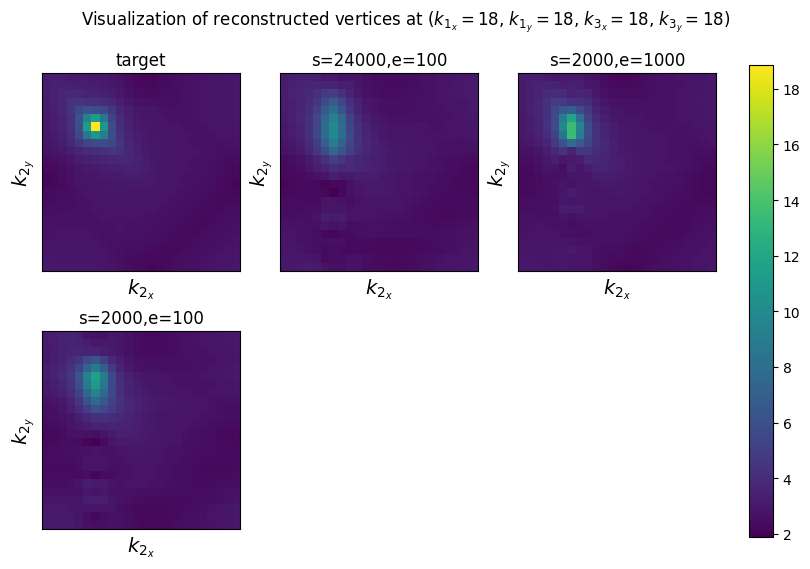

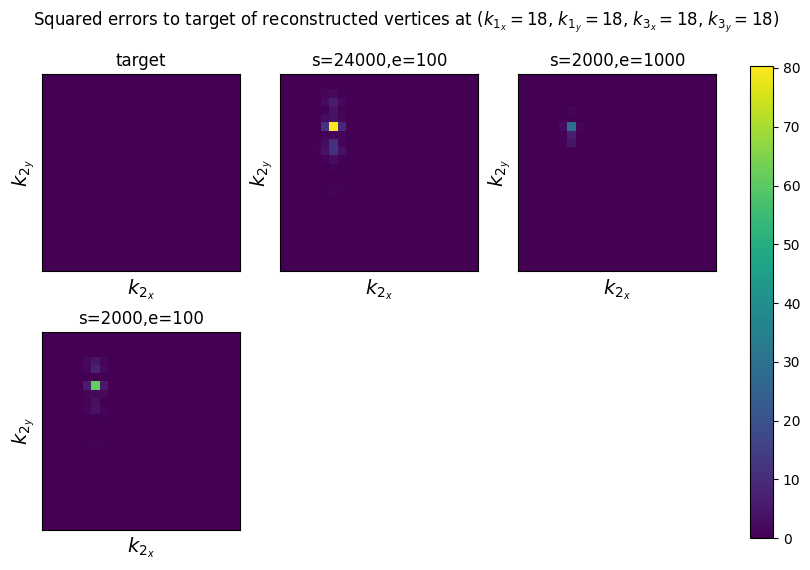

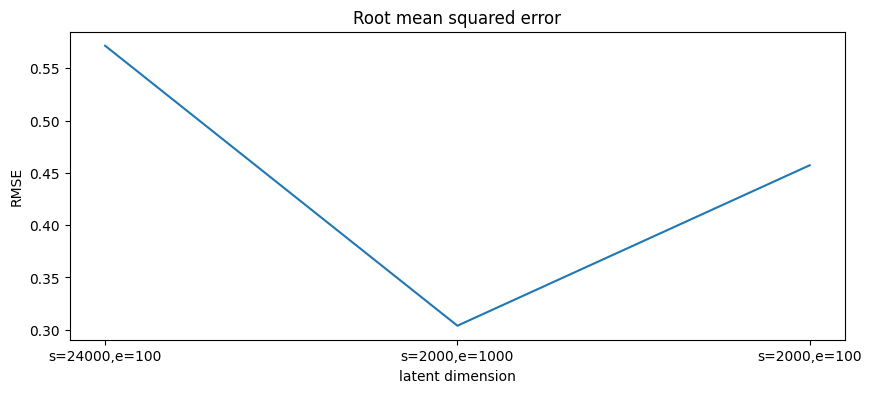

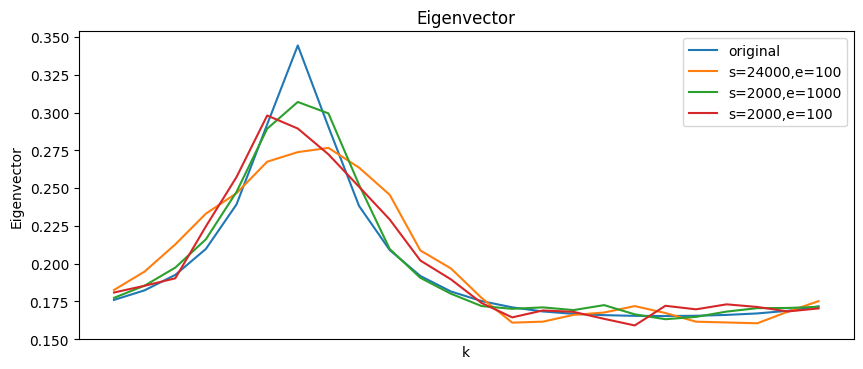

In [24]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_4/checkpoints\epoch=99-step=1900.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_4/checkpoints\epoch=99-step=1900.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_0/checkpoints\epoch=987-step=24700.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_0/checkpoints\epoch=987-step=24700.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_1/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_1/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=s=24000,e=100: RMSE=0.6087
   latent_dim=s=2000,e=1000: RMSE=0.3283
   latent_dim=s=2000,e=100: RMSE=0.4957


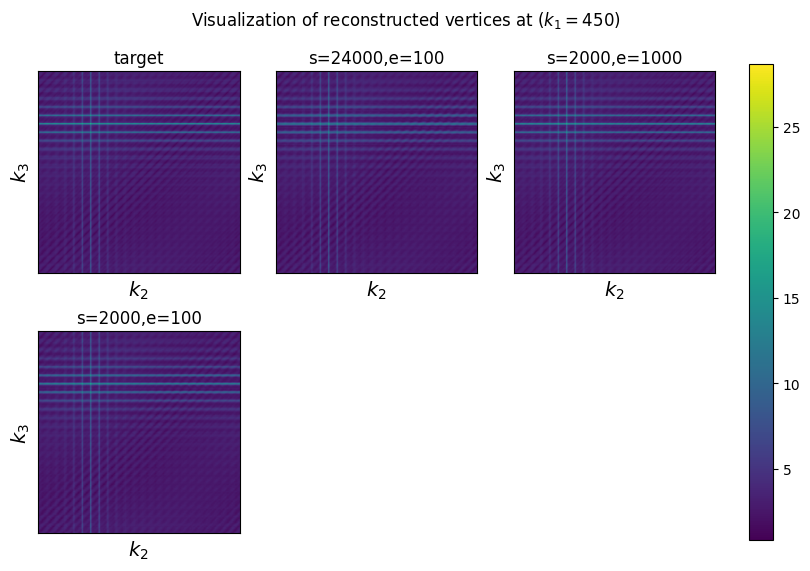

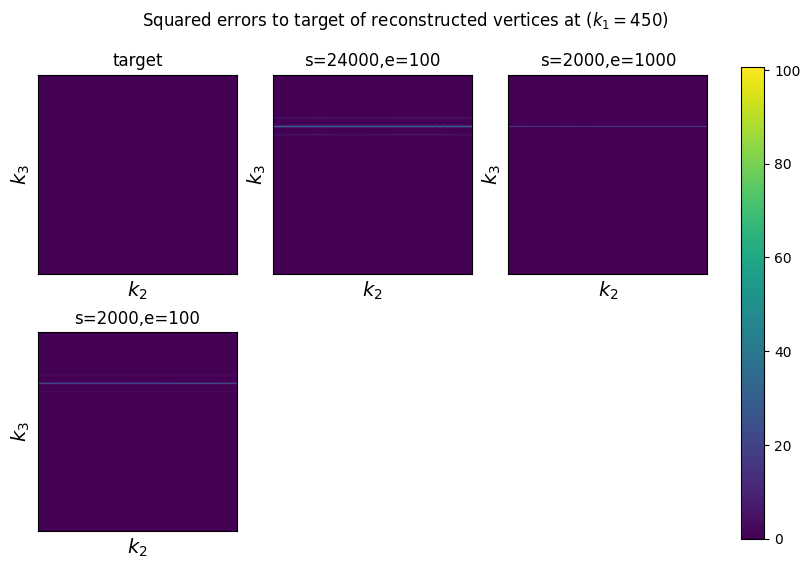

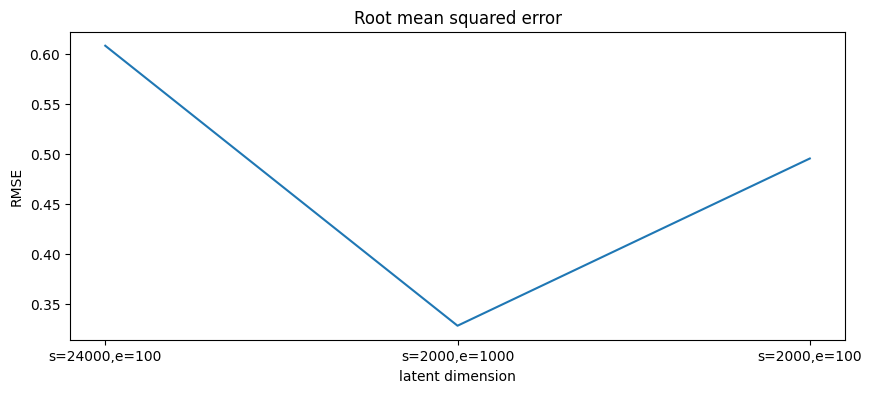

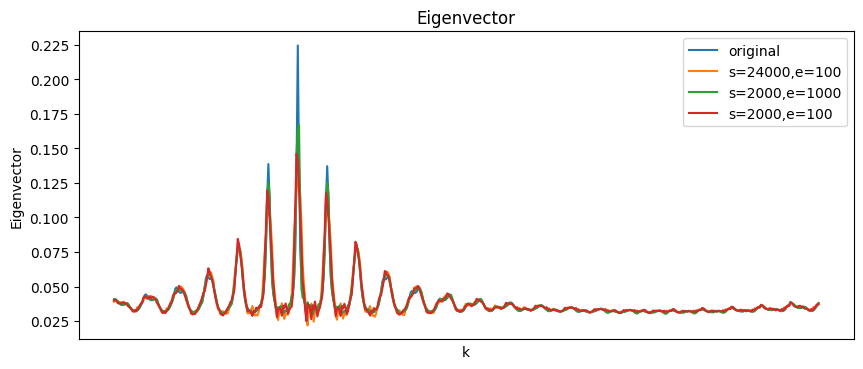

In [25]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\trainer\setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_4/checkpoints\epoch=99-step=1900.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS2048_2025-03-07/version_4/checkpoints\epoch=99-step=1900.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\loops\prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_0/checkpoints\epoch=987-step=24700.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_0/checkpoints\epoch=987-step=24700.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_1/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_1/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=s=24000,e=100: RMSE=0.5889
   latent_dim=s=2000,e=1000: RMSE=0.1865
   latent_dim=s=2000,e=100: RMSE=0.5649


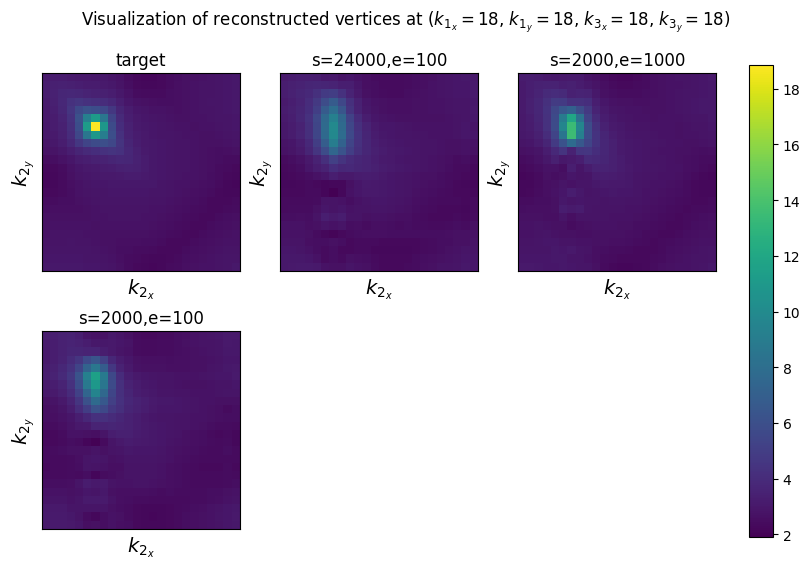

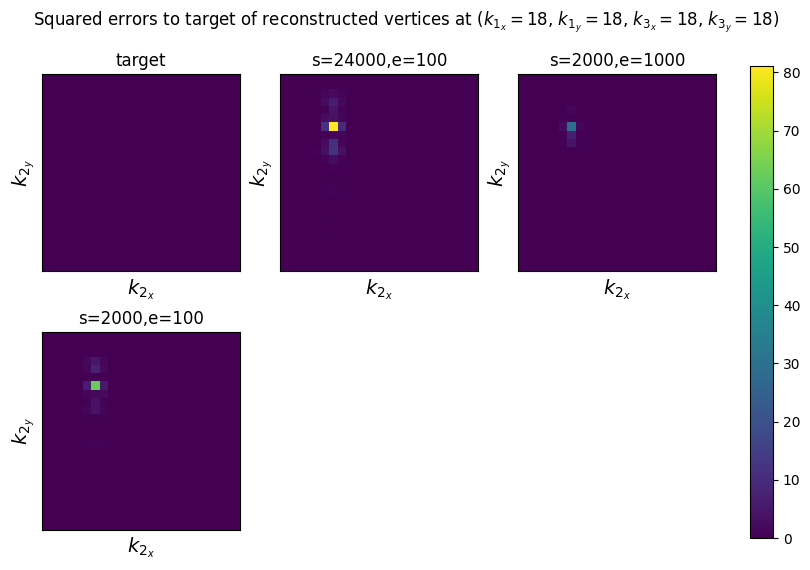

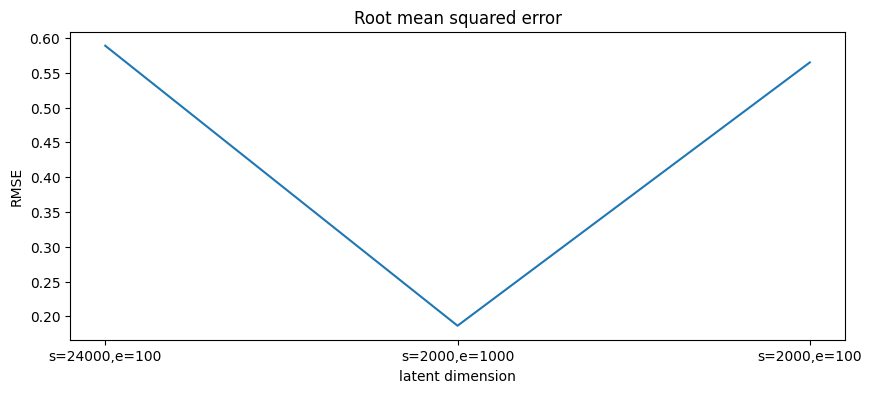

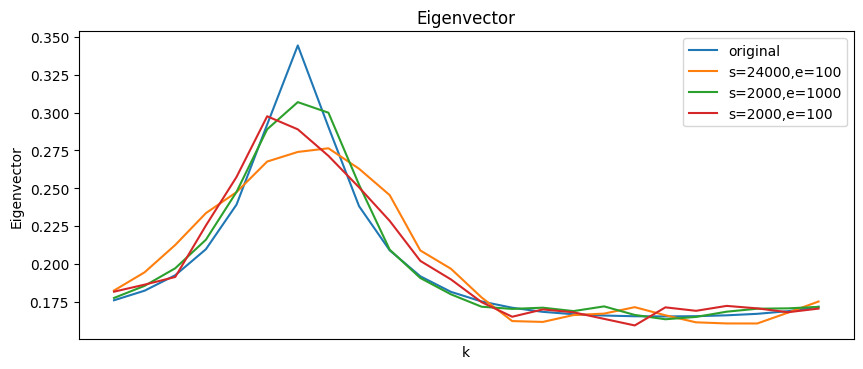

In [28]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

RESULTS:
   latent_dim=s=24000,e=100: RMSE=0.5889
   latent_dim=s=2000,e=1000: RMSE=0.1865
   latent_dim=s=2000,e=100: RMSE=0.5649


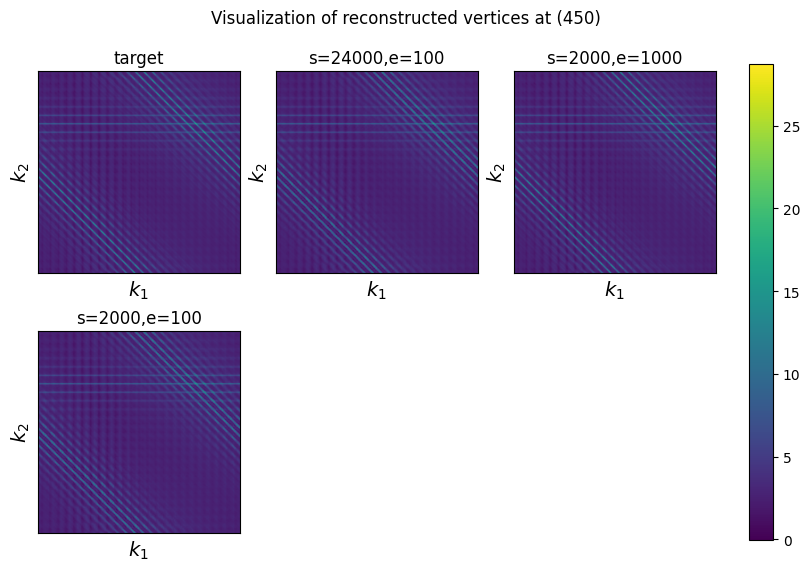

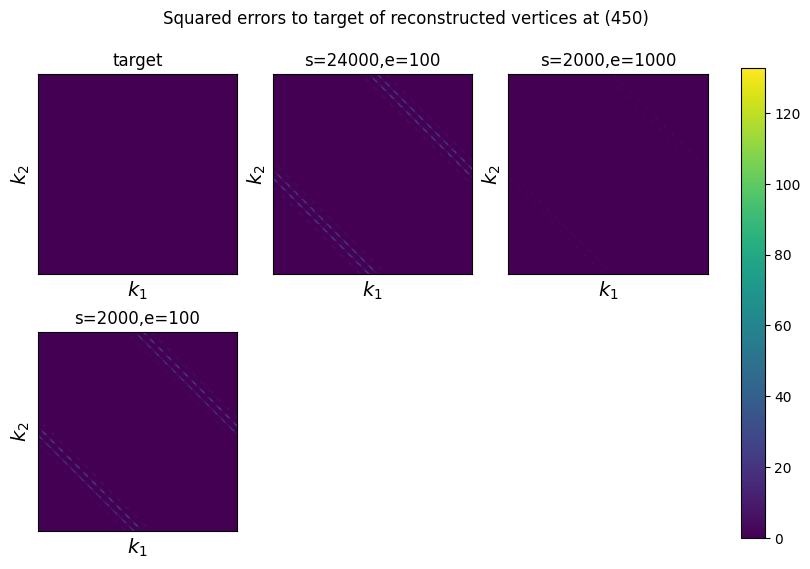

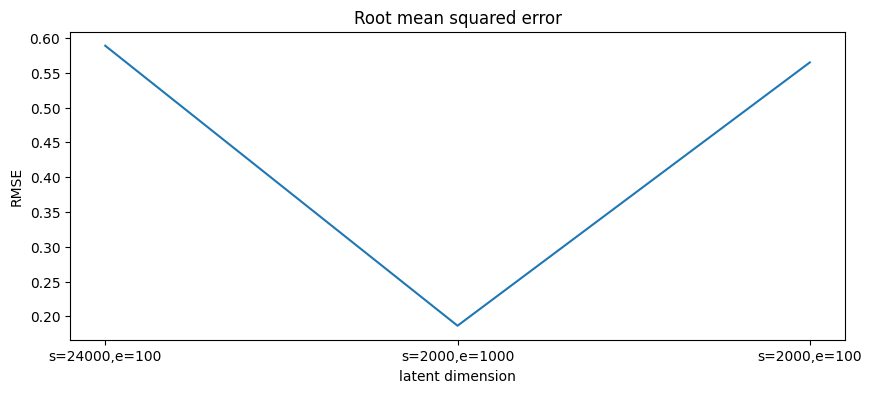

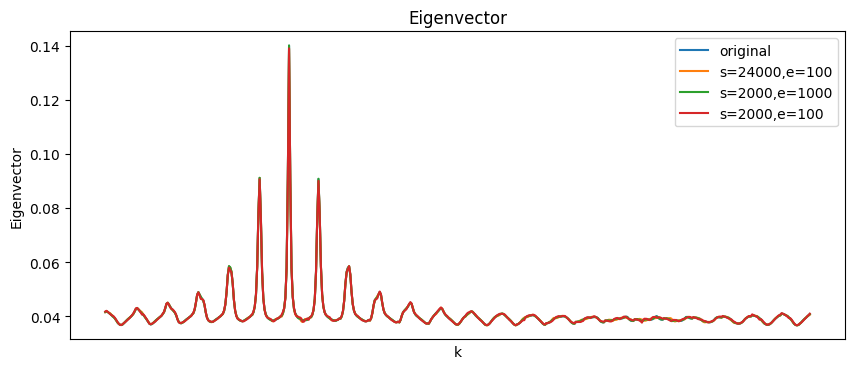

In [29]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

## correlation analysis

In [ ]:
cor_mat = verteval.vertex_correlation('../../../frgs_6d', pre_load_vertices=True)
vertvis.plot_correlation(cor_mat, "Vertex Correlation")

# 03 Latent dimension evaluation

* use most efficient sample- and epoch-count
* compare different layer sizes

In [3]:
info_fn = 'eval_info_test.pkl'
info = verteval.load_info_dict(info_fn)
config_kwargs = {'path_train': '../../../frgs_6d', 
                 'hidden_dims': [128, 64, 32],
                 'epochs': 100,
                 'sample_count_per_vertex': 2000, 
                 'test_ratio': 0.2, 
                 'subset': -1, 
                 'subset_shuffle': False, 
                 'devices': 'auto', 
                 'num_dataloader_workers': 4, 
                 'strategy': 'auto', 
                 'batch_size': 128}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [5]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:298: The number of training batches (25) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 25: 'val_loss' reached 13.52393 (best 13.52393), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=0-step=25.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 50: 'val_loss' reached 11.48112 (best 11.48112), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=1-step=50.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 75: 'val_loss' reached 7.29155 (best 7.29155), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=2-step=75.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 100: 'val_loss' reached 4.10468 (best 4.10468), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=3-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 125: 'val_loss' reached 2.80246 (best 2.80246), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=4-step=125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 150: 'val_loss' reached 2.32538 (best 2.32538), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=5-step=150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 175: 'val_loss' reached 2.18479 (best 2.18479), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=6-step=175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 200: 'val_loss' reached 2.12005 (best 2.12005), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=7-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 225: 'val_loss' reached 2.06007 (best 2.06007), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=8-step=225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 250: 'val_loss' reached 2.00315 (best 2.00315), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=9-step=250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 275: 'val_loss' reached 1.93936 (best 1.93936), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=10-step=275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 300: 'val_loss' reached 1.88100 (best 1.88100), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=11-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 325: 'val_loss' reached 1.82815 (best 1.82815), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=12-step=325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 350: 'val_loss' reached 1.77356 (best 1.77356), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=13-step=350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 375: 'val_loss' reached 1.73288 (best 1.73288), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=14-step=375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 400: 'val_loss' reached 1.69975 (best 1.69975), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=15-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 425: 'val_loss' reached 1.67563 (best 1.67563), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=16-step=425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 450: 'val_loss' reached 1.65128 (best 1.65128), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=17-step=450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 475: 'val_loss' reached 1.62618 (best 1.62618), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=18-step=475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 500: 'val_loss' reached 1.59980 (best 1.59980), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=19-step=500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 525: 'val_loss' reached 1.57001 (best 1.57001), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=20-step=525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 550: 'val_loss' reached 1.53507 (best 1.53507), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=21-step=550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 575: 'val_loss' reached 1.49023 (best 1.49023), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=22-step=575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 600: 'val_loss' reached 1.42945 (best 1.42945), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=23-step=600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 625: 'val_loss' reached 1.36092 (best 1.36092), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=24-step=625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 650: 'val_loss' reached 1.28925 (best 1.28925), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=25-step=650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 675: 'val_loss' reached 1.21268 (best 1.21268), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=26-step=675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 700: 'val_loss' reached 1.13958 (best 1.13958), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=27-step=700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 725: 'val_loss' reached 1.07464 (best 1.07464), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=28-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 750: 'val_loss' reached 1.02015 (best 1.02015), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=29-step=750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 775: 'val_loss' reached 0.96475 (best 0.96475), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=30-step=775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 800: 'val_loss' reached 0.91135 (best 0.91135), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=31-step=800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 825: 'val_loss' reached 0.85027 (best 0.85027), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=32-step=825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 850: 'val_loss' reached 0.79710 (best 0.79710), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=33-step=850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 875: 'val_loss' reached 0.74965 (best 0.74965), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=34-step=875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 900: 'val_loss' reached 0.71371 (best 0.71371), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=35-step=900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 925: 'val_loss' reached 0.68736 (best 0.68736), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=36-step=925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 950: 'val_loss' reached 0.66741 (best 0.66741), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=37-step=950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 975: 'val_loss' reached 0.65181 (best 0.65181), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=38-step=975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1000: 'val_loss' reached 0.64030 (best 0.64030), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=39-step=1000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1025: 'val_loss' reached 0.62837 (best 0.62837), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=40-step=1025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1050: 'val_loss' reached 0.62207 (best 0.62207), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=41-step=1050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1075: 'val_loss' reached 0.61253 (best 0.61253), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=42-step=1075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1100: 'val_loss' reached 0.60472 (best 0.60472), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=43-step=1100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1125: 'val_loss' reached 0.59638 (best 0.59638), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=44-step=1125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1150: 'val_loss' reached 0.59044 (best 0.59044), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=45-step=1150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1175: 'val_loss' reached 0.58627 (best 0.58627), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=46-step=1175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1200: 'val_loss' reached 0.57500 (best 0.57500), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=47-step=1200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1225: 'val_loss' reached 0.57009 (best 0.57009), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=48-step=1225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1250: 'val_loss' reached 0.56041 (best 0.56041), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=49-step=1250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1275: 'val_loss' reached 0.55451 (best 0.55451), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=50-step=1275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1300: 'val_loss' reached 0.54580 (best 0.54580), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=51-step=1300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1325: 'val_loss' reached 0.53824 (best 0.53824), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=52-step=1325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1350: 'val_loss' reached 0.52869 (best 0.52869), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=53-step=1350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1375: 'val_loss' reached 0.52150 (best 0.52150), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=54-step=1375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1400: 'val_loss' reached 0.51197 (best 0.51197), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=55-step=1400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1425: 'val_loss' reached 0.50367 (best 0.50367), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=56-step=1425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1450: 'val_loss' reached 0.49244 (best 0.49244), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=57-step=1450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1475: 'val_loss' reached 0.48580 (best 0.48580), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=58-step=1475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1500: 'val_loss' reached 0.47424 (best 0.47424), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=59-step=1500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1525: 'val_loss' reached 0.46327 (best 0.46327), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=60-step=1525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1550: 'val_loss' reached 0.45410 (best 0.45410), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=61-step=1550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1575: 'val_loss' reached 0.44351 (best 0.44351), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=62-step=1575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1600: 'val_loss' reached 0.43473 (best 0.43473), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=63-step=1600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1625: 'val_loss' reached 0.42620 (best 0.42620), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=64-step=1625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1650: 'val_loss' reached 0.41647 (best 0.41647), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=65-step=1650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1675: 'val_loss' reached 0.40790 (best 0.40790), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=66-step=1675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1700: 'val_loss' reached 0.39933 (best 0.39933), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=67-step=1700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 1725: 'val_loss' reached 0.39240 (best 0.39240), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=68-step=1725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 1750: 'val_loss' reached 0.38728 (best 0.38728), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=69-step=1750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 1775: 'val_loss' reached 0.37836 (best 0.37836), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=70-step=1775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 1800: 'val_loss' reached 0.37106 (best 0.37106), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=71-step=1800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 1825: 'val_loss' reached 0.36582 (best 0.36582), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=72-step=1825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 1850: 'val_loss' reached 0.35947 (best 0.35947), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=73-step=1850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 1875: 'val_loss' reached 0.35494 (best 0.35494), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=74-step=1875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 1900: 'val_loss' reached 0.35053 (best 0.35053), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=75-step=1900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 1925: 'val_loss' reached 0.34573 (best 0.34573), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=76-step=1925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 1950: 'val_loss' reached 0.34212 (best 0.34212), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=77-step=1950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 1975: 'val_loss' reached 0.33682 (best 0.33682), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=78-step=1975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2000: 'val_loss' reached 0.33243 (best 0.33243), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=79-step=2000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2025: 'val_loss' reached 0.33232 (best 0.33232), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=80-step=2025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2050: 'val_loss' reached 0.32820 (best 0.32820), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=81-step=2050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2075: 'val_loss' reached 0.32443 (best 0.32443), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=82-step=2075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2100: 'val_loss' reached 0.32071 (best 0.32071), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=83-step=2100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2125: 'val_loss' reached 0.31895 (best 0.31895), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=84-step=2125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2150: 'val_loss' reached 0.31695 (best 0.31695), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=85-step=2150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2175: 'val_loss' reached 0.31455 (best 0.31455), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=86-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2200: 'val_loss' reached 0.31359 (best 0.31359), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=87-step=2200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2225: 'val_loss' reached 0.31134 (best 0.31134), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=88-step=2225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2250: 'val_loss' reached 0.30780 (best 0.30780), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=89-step=2250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2275: 'val_loss' reached 0.30743 (best 0.30743), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=90-step=2275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2300: 'val_loss' reached 0.30609 (best 0.30609), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=91-step=2300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2325: 'val_loss' reached 0.30414 (best 0.30414), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=92-step=2325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2350: 'val_loss' reached 0.30143 (best 0.30143), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=93-step=2350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2375: 'val_loss' reached 0.30119 (best 0.30119), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=94-step=2375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2400: 'val_loss' reached 0.29804 (best 0.29804), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=95-step=2400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2425: 'val_loss' reached 0.29737 (best 0.29737), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=96-step=2425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2450: 'val_loss' reached 0.29468 (best 0.29468), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=97-step=2450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2475: 'val_loss' reached 0.29366 (best 0.29366), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=98-step=2475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2500: 'val_loss' reached 0.29143 (best 0.29143), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08\\version_0\\checkpoints\\epoch=99-step=2500.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 32
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-08/version_0'


In [5]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 16])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.6 K    Trainable params
0         Non-trainable params
33.6 K    Total params
0.135     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 25: 'val_loss' reached 14.38510 (best 14.38510), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=0-step=25.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 50: 'val_loss' reached 14.13678 (best 14.13678), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=1-step=50.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 75: 'val_loss' reached 13.21017 (best 13.21017), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=2-step=75.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 100: 'val_loss' reached 9.90413 (best 9.90413), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=3-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 125: 'val_loss' reached 4.41876 (best 4.41876), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=4-step=125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 150: 'val_loss' reached 3.05012 (best 3.05012), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=5-step=150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 175: 'val_loss' reached 2.54351 (best 2.54351), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=6-step=175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 200: 'val_loss' reached 2.32974 (best 2.32974), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=7-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 225: 'val_loss' reached 2.24758 (best 2.24758), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=8-step=225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 250: 'val_loss' reached 2.20462 (best 2.20462), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=9-step=250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 275: 'val_loss' reached 2.17557 (best 2.17557), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=10-step=275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 300: 'val_loss' reached 2.14232 (best 2.14232), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=11-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 325: 'val_loss' reached 2.11371 (best 2.11371), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=12-step=325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 350: 'val_loss' reached 2.07079 (best 2.07079), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=13-step=350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 375: 'val_loss' reached 2.03255 (best 2.03255), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=14-step=375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 400: 'val_loss' reached 1.98981 (best 1.98981), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=15-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 425: 'val_loss' reached 1.94815 (best 1.94815), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=16-step=425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 450: 'val_loss' reached 1.90788 (best 1.90788), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=17-step=450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 475: 'val_loss' reached 1.86796 (best 1.86796), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=18-step=475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 500: 'val_loss' reached 1.83298 (best 1.83298), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=19-step=500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 525: 'val_loss' reached 1.80296 (best 1.80296), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=20-step=525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 550: 'val_loss' reached 1.77660 (best 1.77660), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=21-step=550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 575: 'val_loss' reached 1.75754 (best 1.75754), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=22-step=575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 600: 'val_loss' reached 1.74309 (best 1.74309), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=23-step=600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 625: 'val_loss' reached 1.73250 (best 1.73250), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=24-step=625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 650: 'val_loss' reached 1.72504 (best 1.72504), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=25-step=650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 675: 'val_loss' reached 1.71899 (best 1.71899), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=26-step=675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 700: 'val_loss' reached 1.71716 (best 1.71716), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=27-step=700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 725: 'val_loss' reached 1.71243 (best 1.71243), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=28-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 750: 'val_loss' reached 1.71095 (best 1.71095), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=29-step=750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 775: 'val_loss' reached 1.71008 (best 1.71008), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=30-step=775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 800: 'val_loss' reached 1.70838 (best 1.70838), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=31-step=800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 825: 'val_loss' reached 1.70627 (best 1.70627), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=32-step=825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 850: 'val_loss' reached 1.70520 (best 1.70520), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=33-step=850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 875: 'val_loss' reached 1.70429 (best 1.70429), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=34-step=875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 900: 'val_loss' reached 1.70197 (best 1.70197), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=35-step=900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 925: 'val_loss' reached 1.70040 (best 1.70040), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=36-step=925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 950: 'val_loss' reached 1.69685 (best 1.69685), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=37-step=950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 975: 'val_loss' reached 1.69375 (best 1.69375), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=38-step=975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1000: 'val_loss' reached 1.68849 (best 1.68849), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=39-step=1000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1025: 'val_loss' reached 1.68370 (best 1.68370), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=40-step=1025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1050: 'val_loss' reached 1.67459 (best 1.67459), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=41-step=1050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1075: 'val_loss' reached 1.66136 (best 1.66136), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=42-step=1075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1100: 'val_loss' reached 1.64148 (best 1.64148), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=43-step=1100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1125: 'val_loss' reached 1.61502 (best 1.61502), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=44-step=1125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1150: 'val_loss' reached 1.57598 (best 1.57598), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=45-step=1150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1175: 'val_loss' reached 1.52308 (best 1.52308), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=46-step=1175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1200: 'val_loss' reached 1.45611 (best 1.45611), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=47-step=1200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1225: 'val_loss' reached 1.37797 (best 1.37797), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=48-step=1225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1250: 'val_loss' reached 1.31514 (best 1.31514), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=49-step=1250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1275: 'val_loss' reached 1.27217 (best 1.27217), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=50-step=1275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1300: 'val_loss' reached 1.25008 (best 1.25008), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=51-step=1300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1325: 'val_loss' reached 1.23730 (best 1.23730), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=52-step=1325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1350: 'val_loss' reached 1.22908 (best 1.22908), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=53-step=1350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1375: 'val_loss' reached 1.22379 (best 1.22379), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=54-step=1375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1400: 'val_loss' reached 1.21645 (best 1.21645), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=55-step=1400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1425: 'val_loss' reached 1.21100 (best 1.21100), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=56-step=1425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1450: 'val_loss' reached 1.20522 (best 1.20522), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=57-step=1450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1475: 'val_loss' reached 1.20198 (best 1.20198), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=58-step=1475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1500: 'val_loss' reached 1.19901 (best 1.19901), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=59-step=1500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1525: 'val_loss' reached 1.19422 (best 1.19422), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=60-step=1525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1550: 'val_loss' reached 1.19151 (best 1.19151), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=61-step=1550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1575: 'val_loss' reached 1.18856 (best 1.18856), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=62-step=1575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1600: 'val_loss' reached 1.18444 (best 1.18444), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=63-step=1600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1625: 'val_loss' reached 1.18179 (best 1.18179), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=64-step=1625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1650: 'val_loss' reached 1.17764 (best 1.17764), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=65-step=1650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1675: 'val_loss' reached 1.17425 (best 1.17425), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=66-step=1675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1700: 'val_loss' reached 1.16836 (best 1.16836), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=67-step=1700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 1725: 'val_loss' reached 1.16693 (best 1.16693), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=68-step=1725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 1750: 'val_loss' reached 1.16089 (best 1.16089), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=69-step=1750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 1775: 'val_loss' reached 1.15426 (best 1.15426), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=70-step=1775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 1800: 'val_loss' reached 1.14923 (best 1.14923), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=71-step=1800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 1825: 'val_loss' reached 1.13835 (best 1.13835), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=72-step=1825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 1850: 'val_loss' reached 1.12833 (best 1.12833), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=73-step=1850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 1875: 'val_loss' reached 1.11451 (best 1.11451), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=74-step=1875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 1900: 'val_loss' reached 1.09327 (best 1.09327), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=75-step=1900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 1925: 'val_loss' reached 1.06482 (best 1.06482), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=76-step=1925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 1950: 'val_loss' reached 1.02582 (best 1.02582), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=77-step=1950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 1975: 'val_loss' reached 0.96765 (best 0.96765), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=78-step=1975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2000: 'val_loss' reached 0.89952 (best 0.89952), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=79-step=2000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2025: 'val_loss' reached 0.82106 (best 0.82106), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=80-step=2025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2050: 'val_loss' reached 0.75126 (best 0.75126), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=81-step=2050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2075: 'val_loss' reached 0.70040 (best 0.70040), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=82-step=2075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2100: 'val_loss' reached 0.66448 (best 0.66448), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=83-step=2100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2125: 'val_loss' reached 0.64094 (best 0.64094), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=84-step=2125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2150: 'val_loss' reached 0.62260 (best 0.62260), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=85-step=2150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2175: 'val_loss' reached 0.60938 (best 0.60938), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=86-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2200: 'val_loss' reached 0.59960 (best 0.59960), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=87-step=2200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2225: 'val_loss' reached 0.58810 (best 0.58810), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=88-step=2225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2250: 'val_loss' reached 0.57992 (best 0.57992), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=89-step=2250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2275: 'val_loss' reached 0.57011 (best 0.57011), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=90-step=2275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2300: 'val_loss' reached 0.56285 (best 0.56285), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=91-step=2300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2325: 'val_loss' reached 0.55290 (best 0.55290), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=92-step=2325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2350: 'val_loss' reached 0.54704 (best 0.54704), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=93-step=2350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2375: 'val_loss' reached 0.54017 (best 0.54017), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=94-step=2375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2400: 'val_loss' reached 0.53241 (best 0.53241), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=95-step=2400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2425: 'val_loss' reached 0.52519 (best 0.52519), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=96-step=2425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2450: 'val_loss' reached 0.51811 (best 0.51811), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=97-step=2450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2475: 'val_loss' reached 0.50938 (best 0.50938), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=98-step=2475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2500: 'val_loss' reached 0.50429 (best 0.50429), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_3\\checkpoints\\epoch=99-step=2500.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 16
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_3'


In [6]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 8])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.1 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.1 K    Trainable params
0         Non-trainable params
33.1 K    Total params
0.132     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 25: 'val_loss' reached 13.99768 (best 13.99768), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=0-step=25.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 50: 'val_loss' reached 13.80072 (best 13.80072), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=1-step=50.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 75: 'val_loss' reached 13.10434 (best 13.10434), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=2-step=75.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 100: 'val_loss' reached 10.73254 (best 10.73254), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=3-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 125: 'val_loss' reached 6.13814 (best 6.13814), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=4-step=125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 150: 'val_loss' reached 3.75873 (best 3.75873), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=5-step=150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 175: 'val_loss' reached 2.91914 (best 2.91914), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=6-step=175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 200: 'val_loss' reached 2.51324 (best 2.51324), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=7-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 225: 'val_loss' reached 2.34059 (best 2.34059), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=8-step=225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 250: 'val_loss' reached 2.26322 (best 2.26322), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=9-step=250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 275: 'val_loss' reached 2.21807 (best 2.21807), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=10-step=275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 300: 'val_loss' reached 2.18855 (best 2.18855), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=11-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 325: 'val_loss' reached 2.15635 (best 2.15635), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=12-step=325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 350: 'val_loss' reached 2.12544 (best 2.12544), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=13-step=350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 375: 'val_loss' reached 2.09111 (best 2.09111), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=14-step=375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 400: 'val_loss' reached 2.05665 (best 2.05665), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=15-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 425: 'val_loss' reached 2.02099 (best 2.02099), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=16-step=425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 450: 'val_loss' reached 1.98611 (best 1.98611), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=17-step=450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 475: 'val_loss' reached 1.94487 (best 1.94487), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=18-step=475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 500: 'val_loss' reached 1.90586 (best 1.90586), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=19-step=500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 525: 'val_loss' reached 1.87061 (best 1.87061), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=20-step=525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 550: 'val_loss' reached 1.83999 (best 1.83999), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=21-step=550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 575: 'val_loss' reached 1.81255 (best 1.81255), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=22-step=575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 600: 'val_loss' reached 1.78830 (best 1.78830), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=23-step=600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 625: 'val_loss' reached 1.76864 (best 1.76864), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=24-step=625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 650: 'val_loss' reached 1.75212 (best 1.75212), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=25-step=650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 675: 'val_loss' reached 1.74065 (best 1.74065), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=26-step=675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 700: 'val_loss' reached 1.73182 (best 1.73182), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=27-step=700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 725: 'val_loss' reached 1.72667 (best 1.72667), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=28-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 750: 'val_loss' reached 1.72083 (best 1.72083), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=29-step=750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 775: 'val_loss' reached 1.71967 (best 1.71967), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=30-step=775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 800: 'val_loss' reached 1.71576 (best 1.71576), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=31-step=800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 825: 'val_loss' reached 1.71510 (best 1.71510), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=32-step=825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 850: 'val_loss' reached 1.71399 (best 1.71399), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=33-step=850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 875: 'val_loss' reached 1.71299 (best 1.71299), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=34-step=875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 900: 'val_loss' reached 1.71277 (best 1.71277), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=35-step=900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 925: 'val_loss' reached 1.71158 (best 1.71158), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=36-step=925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 950: 'val_loss' reached 1.71038 (best 1.71038), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=37-step=950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 975: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1000: 'val_loss' reached 1.71030 (best 1.71030), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=39-step=1000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1050: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1075: 'val_loss' reached 1.71023 (best 1.71023), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=42-step=1075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1100: 'val_loss' reached 1.70936 (best 1.70936), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=43-step=1100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1125: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1175: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1200: 'val_loss' reached 1.70875 (best 1.70875), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=47-step=1200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1250: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1300: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1325: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1375: 'val_loss' reached 1.70731 (best 1.70731), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=54-step=1375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1400: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1425: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1475: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1500: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1525: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1550: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1575: 'val_loss' reached 1.70679 (best 1.70679), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=62-step=1575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1600: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1625: 'val_loss' reached 1.70549 (best 1.70549), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=64-step=1625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1650: 'val_loss' reached 1.70412 (best 1.70412), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=65-step=1650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1675: 'val_loss' reached 1.70324 (best 1.70324), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=66-step=1675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1700: 'val_loss' reached 1.70280 (best 1.70280), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=67-step=1700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 1725: 'val_loss' reached 1.69855 (best 1.69855), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=68-step=1725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 1750: 'val_loss' reached 1.69683 (best 1.69683), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=69-step=1750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 1775: 'val_loss' reached 1.69331 (best 1.69331), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=70-step=1775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 1800: 'val_loss' reached 1.68734 (best 1.68734), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=71-step=1800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 1825: 'val_loss' reached 1.67961 (best 1.67961), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=72-step=1825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 1850: 'val_loss' reached 1.66799 (best 1.66799), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=73-step=1850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 1875: 'val_loss' reached 1.65521 (best 1.65521), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=74-step=1875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 1900: 'val_loss' reached 1.63428 (best 1.63428), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=75-step=1900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 1925: 'val_loss' reached 1.60727 (best 1.60727), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=76-step=1925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 1950: 'val_loss' reached 1.57141 (best 1.57141), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=77-step=1950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 1975: 'val_loss' reached 1.52581 (best 1.52581), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=78-step=1975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2000: 'val_loss' reached 1.47166 (best 1.47166), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=79-step=2000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2025: 'val_loss' reached 1.41382 (best 1.41382), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=80-step=2025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2050: 'val_loss' reached 1.35816 (best 1.35816), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=81-step=2050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2075: 'val_loss' reached 1.31443 (best 1.31443), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=82-step=2075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2100: 'val_loss' reached 1.28263 (best 1.28263), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=83-step=2100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2125: 'val_loss' reached 1.26067 (best 1.26067), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=84-step=2125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2150: 'val_loss' reached 1.24558 (best 1.24558), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=85-step=2150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2175: 'val_loss' reached 1.23280 (best 1.23280), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=86-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2200: 'val_loss' reached 1.22394 (best 1.22394), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=87-step=2200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2225: 'val_loss' reached 1.21521 (best 1.21521), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=88-step=2225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2250: 'val_loss' reached 1.21073 (best 1.21073), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=89-step=2250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2275: 'val_loss' reached 1.20469 (best 1.20469), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=90-step=2275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2300: 'val_loss' reached 1.20175 (best 1.20175), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=91-step=2300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2325: 'val_loss' reached 1.19638 (best 1.19638), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=92-step=2325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2350: 'val_loss' reached 1.19388 (best 1.19388), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=93-step=2350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2375: 'val_loss' reached 1.19018 (best 1.19018), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=94-step=2375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2400: 'val_loss' reached 1.18768 (best 1.18768), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=95-step=2400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2425: 'val_loss' reached 1.18561 (best 1.18561), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=96-step=2425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2450: 'val_loss' reached 1.18266 (best 1.18266), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=97-step=2450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2475: 'val_loss' reached 1.18167 (best 1.18167), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=98-step=2475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2500: 'val_loss' reached 1.17911 (best 1.17911), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_4\\checkpoints\\epoch=99-step=2500.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 8
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_4'


In [7]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, [128, 32, 16, 4])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 24.7 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 25: 'val_loss' reached 14.34392 (best 14.34392), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=0-step=25.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 50: 'val_loss' reached 14.27804 (best 14.27804), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=1-step=50.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 75: 'val_loss' reached 14.20838 (best 14.20838), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=2-step=75.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 100: 'val_loss' reached 14.03929 (best 14.03929), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=3-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 125: 'val_loss' reached 13.62328 (best 13.62328), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=4-step=125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 150: 'val_loss' reached 12.34058 (best 12.34058), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=5-step=150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 175: 'val_loss' reached 9.63058 (best 9.63058), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=6-step=175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 200: 'val_loss' reached 6.64139 (best 6.64139), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=7-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 225: 'val_loss' reached 5.12651 (best 5.12651), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=8-step=225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 250: 'val_loss' reached 4.17608 (best 4.17608), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=9-step=250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 275: 'val_loss' reached 3.52775 (best 3.52775), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=10-step=275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 300: 'val_loss' reached 3.07417 (best 3.07417), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=11-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 325: 'val_loss' reached 2.76184 (best 2.76184), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=12-step=325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 13, global step 350: 'val_loss' reached 2.54162 (best 2.54162), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=13-step=350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 14, global step 375: 'val_loss' reached 2.38649 (best 2.38649), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=14-step=375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 15, global step 400: 'val_loss' reached 2.27644 (best 2.27644), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=15-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 16, global step 425: 'val_loss' reached 2.19645 (best 2.19645), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=16-step=425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 17, global step 450: 'val_loss' reached 2.13157 (best 2.13157), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=17-step=450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 18, global step 475: 'val_loss' reached 2.07328 (best 2.07328), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=18-step=475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 19, global step 500: 'val_loss' reached 2.01679 (best 2.01679), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=19-step=500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 20, global step 525: 'val_loss' reached 1.96420 (best 1.96420), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=20-step=525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 21, global step 550: 'val_loss' reached 1.90976 (best 1.90976), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=21-step=550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 22, global step 575: 'val_loss' reached 1.86609 (best 1.86609), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=22-step=575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 23, global step 600: 'val_loss' reached 1.82419 (best 1.82419), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=23-step=600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 24, global step 625: 'val_loss' reached 1.78915 (best 1.78915), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=24-step=625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 25, global step 650: 'val_loss' reached 1.76248 (best 1.76248), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=25-step=650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 26, global step 675: 'val_loss' reached 1.74406 (best 1.74406), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=26-step=675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 27, global step 700: 'val_loss' reached 1.73270 (best 1.73270), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=27-step=700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 28, global step 725: 'val_loss' reached 1.72590 (best 1.72590), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=28-step=725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 29, global step 750: 'val_loss' reached 1.72229 (best 1.72229), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=29-step=750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 30, global step 775: 'val_loss' reached 1.71993 (best 1.71993), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=30-step=775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 31, global step 800: 'val_loss' reached 1.71780 (best 1.71780), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=31-step=800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 32, global step 825: 'val_loss' reached 1.71664 (best 1.71664), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=32-step=825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 33, global step 850: 'val_loss' reached 1.71657 (best 1.71657), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=33-step=850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 34, global step 875: 'val_loss' reached 1.71632 (best 1.71632), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=34-step=875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 35, global step 900: 'val_loss' reached 1.71521 (best 1.71521), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=35-step=900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 36, global step 925: 'val_loss' reached 1.71417 (best 1.71417), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=36-step=925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 37, global step 950: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 38, global step 975: 'val_loss' reached 1.71399 (best 1.71399), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=38-step=975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 39, global step 1000: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 40, global step 1025: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 41, global step 1050: 'val_loss' reached 1.71380 (best 1.71380), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=41-step=1050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 42, global step 1075: 'val_loss' reached 1.71303 (best 1.71303), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=42-step=1075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 43, global step 1100: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 44, global step 1125: 'val_loss' reached 1.71189 (best 1.71189), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=44-step=1125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 45, global step 1150: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 46, global step 1175: 'val_loss' reached 1.71132 (best 1.71132), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=46-step=1175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 47, global step 1200: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 48, global step 1225: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 49, global step 1250: 'val_loss' reached 1.71113 (best 1.71113), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=49-step=1250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 50, global step 1275: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 51, global step 1300: 'val_loss' reached 1.71047 (best 1.71047), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=51-step=1300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 52, global step 1325: 'val_loss' reached 1.70991 (best 1.70991), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=52-step=1325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 53, global step 1350: 'val_loss' reached 1.70828 (best 1.70828), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=53-step=1350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 54, global step 1375: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 55, global step 1400: 'val_loss' reached 1.70776 (best 1.70776), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=55-step=1400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 56, global step 1425: 'val_loss' reached 1.70676 (best 1.70676), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=56-step=1425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 57, global step 1450: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 58, global step 1475: 'val_loss' reached 1.70550 (best 1.70550), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=58-step=1475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 59, global step 1500: 'val_loss' reached 1.70396 (best 1.70396), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=59-step=1500.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 60, global step 1525: 'val_loss' reached 1.70281 (best 1.70281), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=60-step=1525.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 61, global step 1550: 'val_loss' reached 1.70090 (best 1.70090), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=61-step=1550.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 62, global step 1575: 'val_loss' reached 1.69791 (best 1.69791), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=62-step=1575.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 63, global step 1600: 'val_loss' reached 1.69689 (best 1.69689), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=63-step=1600.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 64, global step 1625: 'val_loss' reached 1.69400 (best 1.69400), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=64-step=1625.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 65, global step 1650: 'val_loss' reached 1.68967 (best 1.68967), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=65-step=1650.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 66, global step 1675: 'val_loss' reached 1.68621 (best 1.68621), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=66-step=1675.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 67, global step 1700: 'val_loss' reached 1.68237 (best 1.68237), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=67-step=1700.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 68, global step 1725: 'val_loss' reached 1.67489 (best 1.67489), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=68-step=1725.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 69, global step 1750: 'val_loss' reached 1.66688 (best 1.66688), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=69-step=1750.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 70, global step 1775: 'val_loss' reached 1.65769 (best 1.65769), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=70-step=1775.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 71, global step 1800: 'val_loss' reached 1.64260 (best 1.64260), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=71-step=1800.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 72, global step 1825: 'val_loss' reached 1.61476 (best 1.61476), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=72-step=1825.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 73, global step 1850: 'val_loss' reached 1.56735 (best 1.56735), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=73-step=1850.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 74, global step 1875: 'val_loss' reached 1.51327 (best 1.51327), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=74-step=1875.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 75, global step 1900: 'val_loss' reached 1.46388 (best 1.46388), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=75-step=1900.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 76, global step 1925: 'val_loss' reached 1.42397 (best 1.42397), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=76-step=1925.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 77, global step 1950: 'val_loss' reached 1.38565 (best 1.38565), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=77-step=1950.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 78, global step 1975: 'val_loss' reached 1.35580 (best 1.35580), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=78-step=1975.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 79, global step 2000: 'val_loss' reached 1.33367 (best 1.33367), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=79-step=2000.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 80, global step 2025: 'val_loss' reached 1.31414 (best 1.31414), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=80-step=2025.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 81, global step 2050: 'val_loss' reached 1.29886 (best 1.29886), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=81-step=2050.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 82, global step 2075: 'val_loss' reached 1.28874 (best 1.28874), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=82-step=2075.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 83, global step 2100: 'val_loss' reached 1.27884 (best 1.27884), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=83-step=2100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 84, global step 2125: 'val_loss' reached 1.27122 (best 1.27122), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=84-step=2125.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 85, global step 2150: 'val_loss' reached 1.26448 (best 1.26448), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=85-step=2150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 86, global step 2175: 'val_loss' reached 1.26136 (best 1.26136), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=86-step=2175.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 87, global step 2200: 'val_loss' reached 1.25632 (best 1.25632), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=87-step=2200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 88, global step 2225: 'val_loss' reached 1.25128 (best 1.25128), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=88-step=2225.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 89, global step 2250: 'val_loss' reached 1.24909 (best 1.24909), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=89-step=2250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 90, global step 2275: 'val_loss' reached 1.24795 (best 1.24795), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=90-step=2275.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 91, global step 2300: 'val_loss' reached 1.24214 (best 1.24214), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=91-step=2300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 92, global step 2325: 'val_loss' reached 1.23794 (best 1.23794), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=92-step=2325.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 93, global step 2350: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 94, global step 2375: 'val_loss' reached 1.23371 (best 1.23371), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=94-step=2375.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 95, global step 2400: 'val_loss' reached 1.23279 (best 1.23279), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=95-step=2400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 96, global step 2425: 'val_loss' reached 1.22531 (best 1.22531), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=96-step=2425.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 97, global step 2450: 'val_loss' reached 1.22450 (best 1.22450), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=97-step=2450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 98, global step 2475: 'val_loss' reached 1.22212 (best 1.22212), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=98-step=2475.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 99, global step 2500: 'val_loss' reached 1.21680 (best 1.21680), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\notebooks\\vertex\\..\\..\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07\\version_5\\checkpoints\\epoch=99-step=2500.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=100` reached.


>>> dim: 4
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_5'


## evaluate prediction

In [9]:
test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = [f'n={x['latent_dim']}' for x in info]
trainer = init_trainer(device_type='cpu', batch_size=1024, num_dataloader_workers=8)

i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

### predict 24x24 slice

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\trainer\setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_2/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_2/checkpoints\epoch=99-step=2500.ckpt
c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increa

Predicting: |          | 0/? [00:00<?, ?it/s]

c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\loops\prediction_loop.py:255: predict returned None if it was on purpose, ignore this warning...
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_3/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_3/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_4/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_4/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_5/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_5/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=n=32: RMSE=0.5654
   latent_dim=n=16: RMSE=0.6835
   latent_dim=n=8: RMSE=0.7197
   latent_dim=n=4: RMSE=0.7827


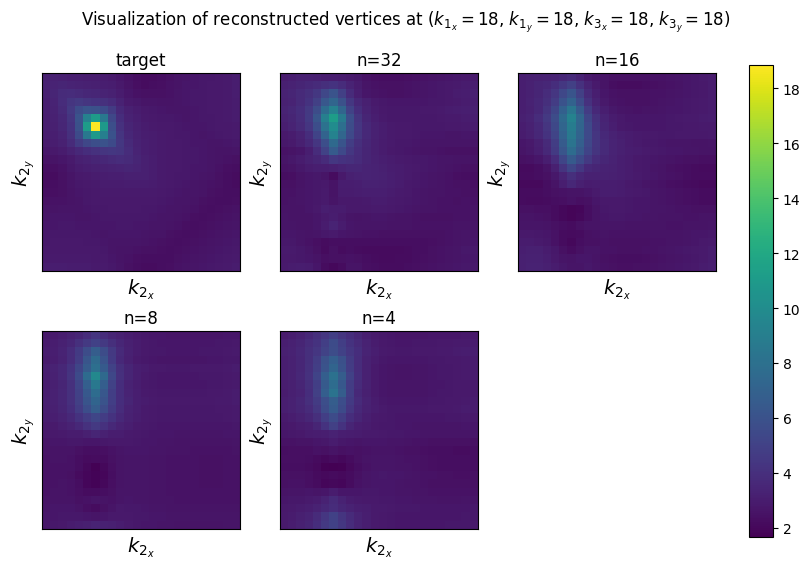

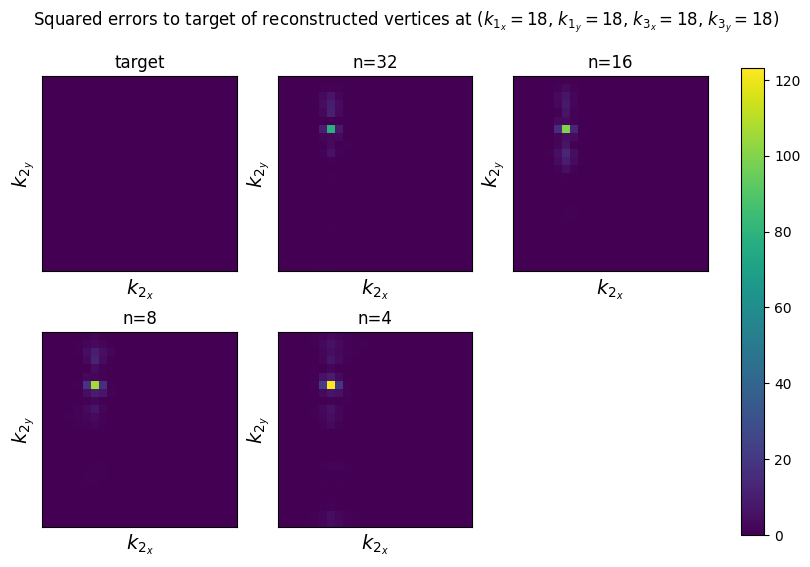

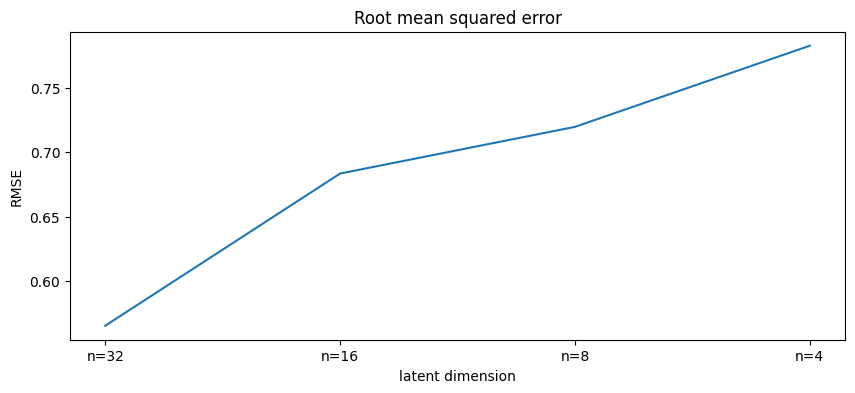

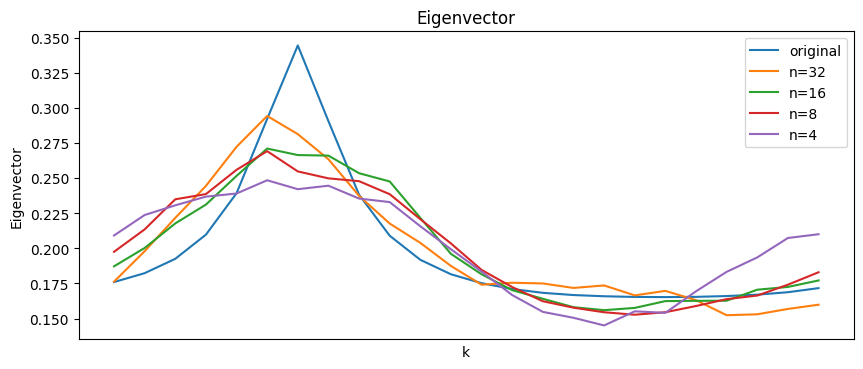

In [9]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_2/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_2/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_3/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_3/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_4/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_4/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_5/checkpoints\epoch=99-step=2500.ckpt
Loaded model weights from the checkpoint at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS128_2025-03-07/version_5/checkpoints\epoch=99-step=2500.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

RESULTS:
   latent_dim=n=32: RMSE=0.6323
   latent_dim=n=16: RMSE=0.7722
   latent_dim=n=8: RMSE=0.7872
   latent_dim=n=4: RMSE=0.8965


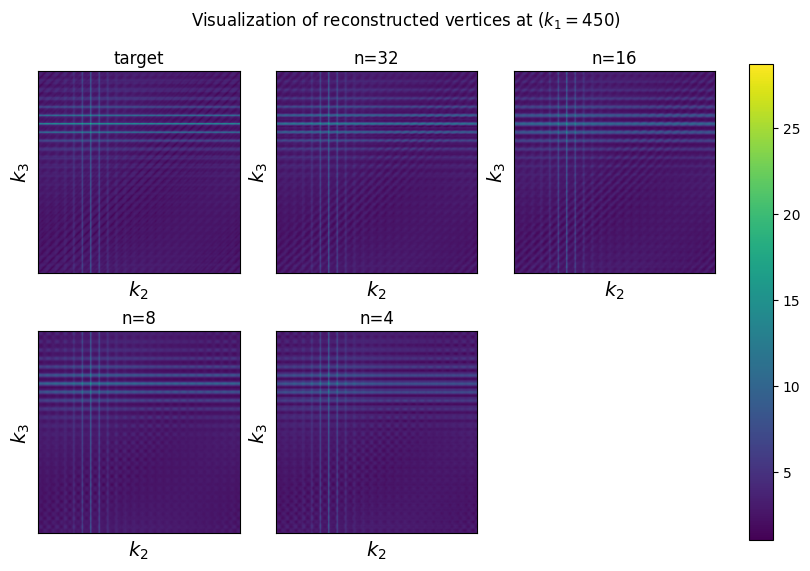

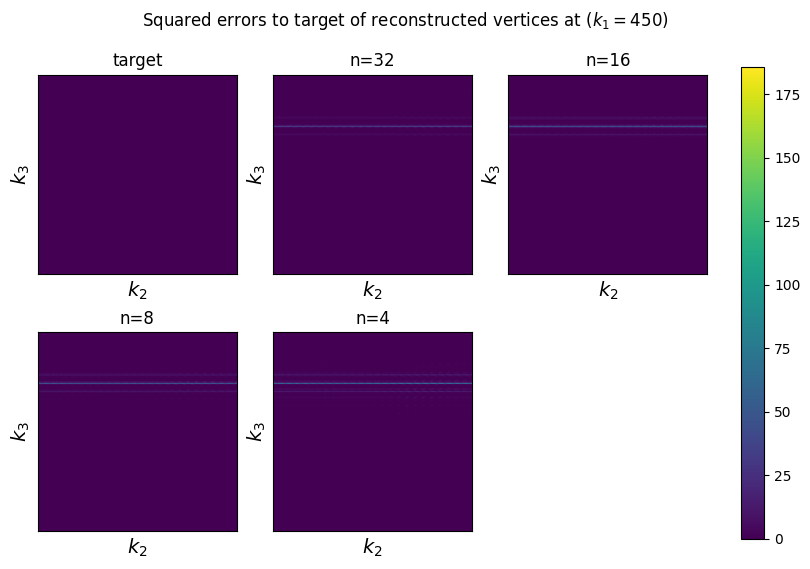

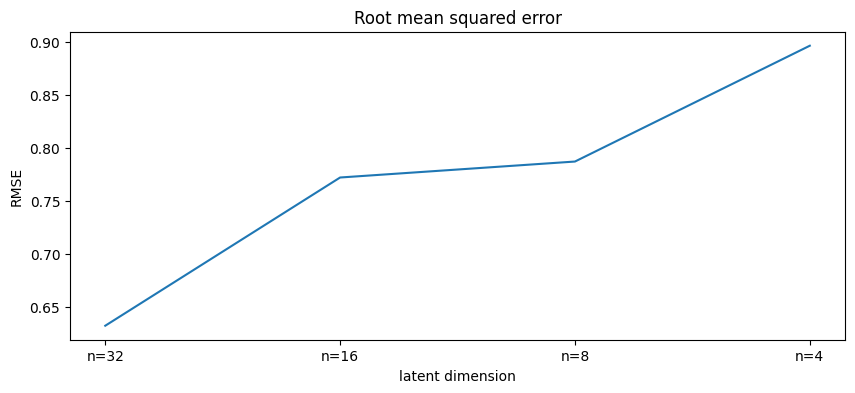

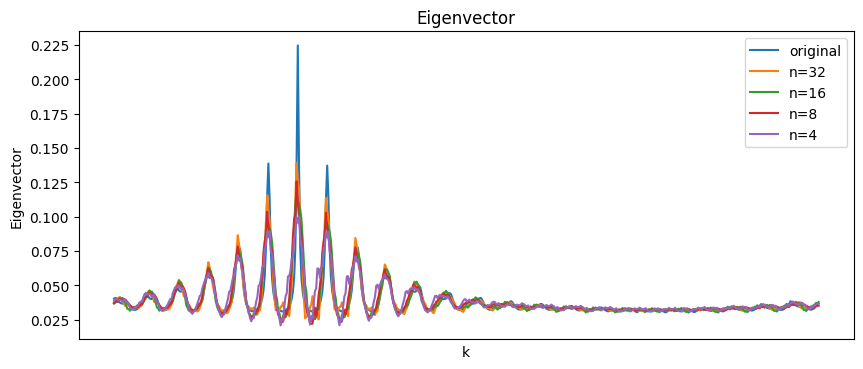

In [10]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

In [ ]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

RESULTS:
   latent_dim=n=32: RMSE=0.6070
   latent_dim=n=16: RMSE=0.7612
   latent_dim=n=8: RMSE=1.1485
   latent_dim=n=4: RMSE=1.1400


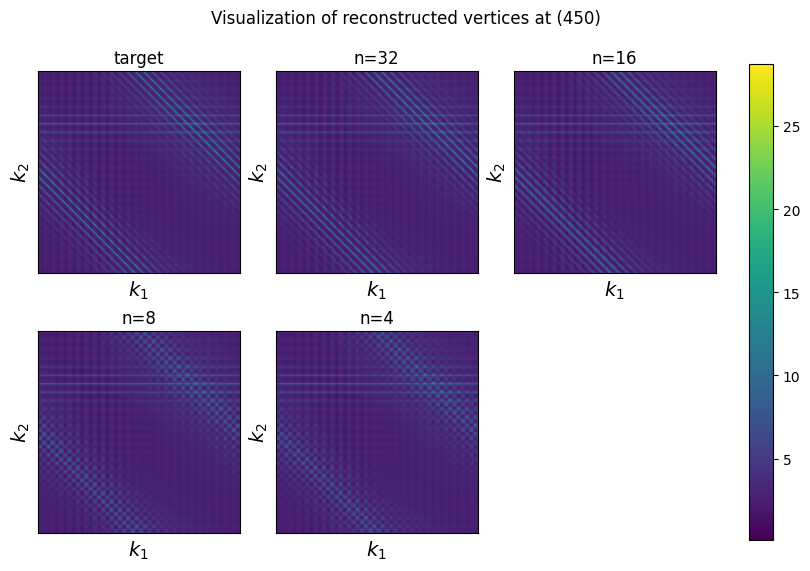

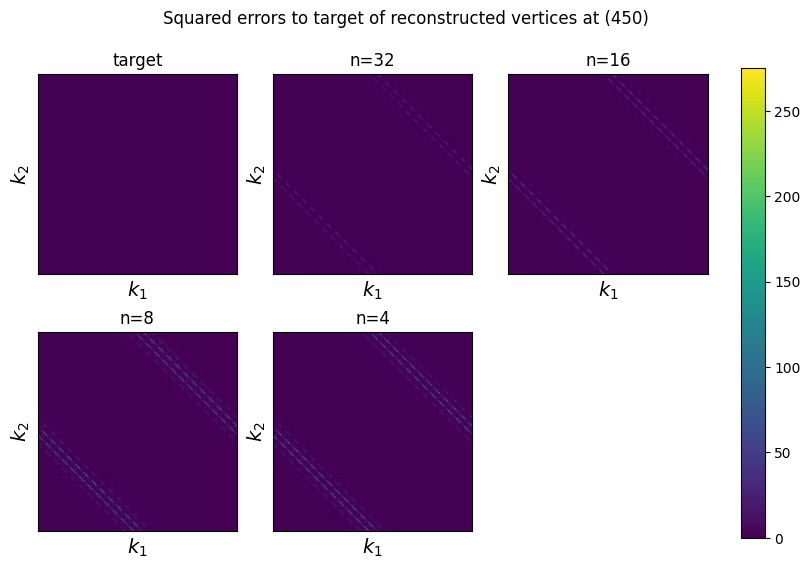

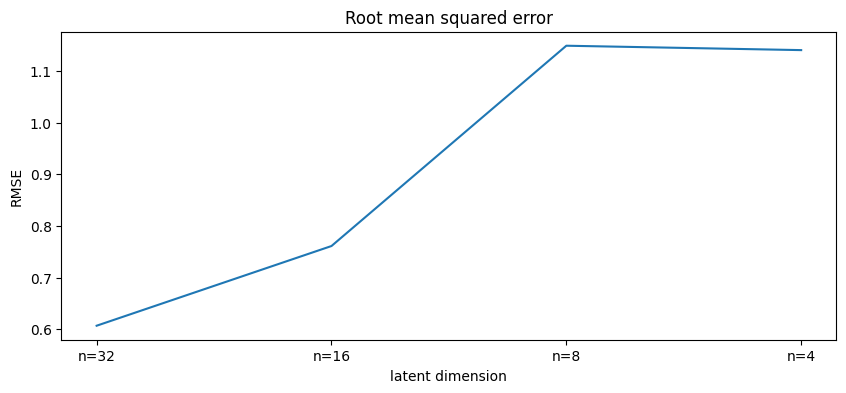

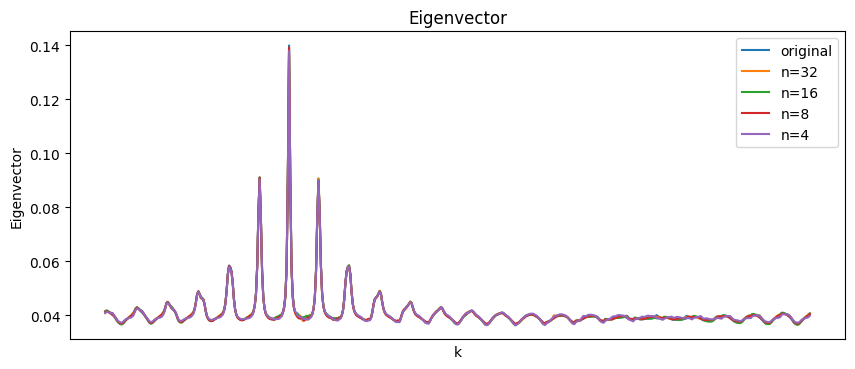

In [12]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

## correlation analysis

In [ ]:
cor_mat = verteval.vertex_correlation('../../../frgs_6d', pre_load_vertices=True)
vertvis.plot_correlation(cor_mat, "Vertex Correlation")

# 04 Phase classification

In [ ]:
save_path = ('/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/'
             'save_AUTO_ENCODER_VERTEX_24X6_BS8192_2025-03-08/version_2')
pc = PhaseClassification('../../../frgs_6d', save_path, samples_per_vertex=2000, test_size=0.1)

In [ ]:
pc.train()

In [ ]:
model_scores = pc.evaluate_classifiers(print_conf_mat=True)
model_scores

In [ ]:
with open(f'phase_classification_results.pkl','wb') as f:
    pickle.dump(model_scores, f)

# 05 U-Net

In [ ]:
info_fn = 'eval_info_test.pkl'
info = verteval.load_info_dict(info_fn)
hidden_dims = [128, 64, 32]
config_kwargs = {'path_train': '../../../frgs_6d', 
                 'model_name': 'UNetVertex',
                 'hidden_dims': hidden_dims,
                 'epochs': 1000,
                 'sample_count_per_vertex': 2000, 
                 'test_ratio': 0.2, 
                 'subset': -1, 
                 'subset_shuffle': False, 
                 'devices': 'auto', 
                 'num_dataloader_workers': 4, 
                 'strategy': 'auto', 
                 'batch_size': 2048}


def init_trainer(device_type: Literal['cpu', 'gpu'] = 'gpu', **kwargs) -> VertexTrainer24x6:
    config_kwargs['device_type'] = device_type
    for k, v in kwargs.items():
        config_kwargs[k] = v
    trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                                subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                                config_kwargs=config_kwargs)
    return trainer

## train

In [ ]:
trainer = init_trainer()
verteval.eval_train(trainer, info, info_fn, hidden_dims)

## evaluate prediction

In [ ]:
test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

keys = [f'n={x['latent_dim']}' for x in info]
trainer = init_trainer(device_type='cpu', batch_size=1024, num_dataloader_workers=8)

i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

### predict 24x24 slice

In [ ]:
# RESULTS FOR 2-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, keys, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

In [ ]:
# RESULTS FOR 4-DIMENSIONAL PREDICTION
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), keys, nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

In [ ]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, keys, nrows, ncols, 
                             predict_func=trainer.predict)

In [ ]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, keys, nrows, ncols, 
                             load_func=trainer.load_prediction)

# ---